# Necessary Libraries and Import Statements

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Command to tell Python to actually display the graphs
%matplotlib inline

In [2]:
#Loading Data
data = pd.read_csv("drowning.csv")
df = data.copy()

In [3]:
#Columns and Values Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Year                   742 non-null    int64 
 1   County                 742 non-null    object
 2   Infant?                742 non-null    object
 3   Months                 41 non-null     object
 4   Age                    742 non-null    int64 
 5   Gender                 742 non-null    object
 6   Location               742 non-null    object
 7   Hot Tub/Pool Location  391 non-null    object
dtypes: int64(2), object(6)
memory usage: 46.5+ KB


In [43]:
df = df.rename(columns={'Infant?': 'Infant'})

In [201]:
df = df.rename(columns={'Hot Tub/Pool Location': 'Secondary Location'})

# Relevant Functions

In [4]:
def total_drownings(dataframe):
    print("The total number of child drownings from 2016 to 2022 in Texas are:", dataframe.shape[0], ".")

In [5]:
def total_drownings_by_county(dataframe):
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by County: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'County', order = df['County'].value_counts().index);
    return fig;

In [6]:
def drownings_by_year(dataframe):
    plt.figure(figsize=(20,7))
    year_totals = df.value_counts(['Year']).reset_index().sort_values(['Year'], ascending=[True])
    plt.title('Total Child Drownings by Year')
    plt.ylabel('Count of Drownings')
    fig = sns.lineplot(data = year_totals , x = 'Year' , y = 0, ci = False);
    return fig;

In [7]:
def drownings_by_category(dataframe):
    plt.figure(figsize=(30,15))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Occurrence: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Location', order = df['Location'].value_counts().index);
    return fig;

In [8]:
def drownings_by_age(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Age');
    return fig;

In [9]:
def drownings_by_gender(dataframe):
    plt.figure(figsize=(8,3))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Gender: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Gender');
    return fig;

In [10]:
def drownings_by_age_gender(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Age', hue= 'Gender');
    return fig;

In [202]:
def drownings_by_secondary_location(dataframe):
    plt.figure(figsize=(15,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Secondary Location: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df , x = 'Secondary Location', hue= 'Gender');
    return fig;

In [11]:
def drownings_by_age_pool(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age at Pool: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Pool')] , x = 'Location', hue= 'Age');
    return fig;

In [128]:
def drownings_by_age_bathtub(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Bathtub: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Bathtub')] , x = 'Location', hue= 'Age');
    return fig;

In [130]:
def drownings_by_age_lake(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Lakes: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Lake')] , x = 'Location', hue= 'Age');
    return fig;

In [132]:
def drownings_by_age_pond(dataframe):
    plt.figure(figsize=(12,7))
    plt.xticks(rotation=90)
    plt.title('Total Child Drownings by Age in Ponds: 2016-2022')
    plt.ylabel('Count of Drownings')
    fig = sns.countplot(data = df[(df.Location == 'Pond')] , x = 'Location', hue= 'Age');
    return fig;

In [124]:
def drownings_desc_stats(dataframe):
    print('The following statistics represent the dataset from the years 2016 - 2022.')
    print('')
    #Total
    total = dataframe.shape[0]
    print('The total number of drownings:', total)
    
    print('')
    
    #Gender Analysis
    total = dataframe.shape[0]
    males = df[df.Gender == 'M'].shape[0]
    print('Count of Males:', males)
    percent_males = round((males / total * 100), 2)
    print('Percent of Males:', percent_males, "%")

    print('')
    
    females = df[df.Gender == 'F'].shape[0]
    print('Count of Females:', females)
    percent_females = round((females / total * 100), 2)
    print('Percent of Females:', percent_females, "%")
    
    print('')
    infants = df[df.Infant == 'Y'].shape[0]
    print('Count of Infants, Children Under 1 Year of Age:', infants)
    percent_infant = round((infants / total * 100), 2)
    print('Percent of Infants, Children Under 1 Year of Age:', percent_infant, "%")
    
    print('')
    
    #Age Analysis
    print('Drownings by Age as Percent of Total:', total)
    location_count = df['Age'].value_counts().sort_index()
    for index, value in location_count.iteritems():
        print("Age:", index, ".", round(value/total*100, 2), "%")
        
    print('')
    
    print('Drownings Count by Age:', total)
    location_count = df['Age'].value_counts().sort_index()
    for index, value in location_count.iteritems():
        print("Age:", index, ".", value)
    
    print('')
    
    #Location of Drowning Analysis
    print("Drownings by Location as Percent of Total:", total)
    location_count = df['Location'].value_counts().sort_index()
    for index, value in location_count.iteritems():
        print(index, round(value/total*100, 2), "%")
        
    print('')
    
    print("Drownings Count by Location:", total)
    location_count = df['Location'].value_counts()
    for index, value in location_count.iteritems():
        print(index, value)

In [173]:
def age_location_desc_stats(dataframe):
    age_location = dataframe.groupby(['Age'])['Location'].value_counts()
    for index, value in age_location.iteritems():
        print("Age:", index[0], ". Location:", index[1], ". Count:", value)

In [199]:
def most_dangerous_location_by_age(dataframe):
    ages = df['Age'].unique()
    ages = sorted(ages)
    for age in ages:
        plt.figure(figsize=(12,7))
        plt.xticks(rotation=90)
        plt.title(f'Child Drownings by Children Aged {age}: 2016-2022')
        plt.ylabel('Count of Drownings')
        fig = sns.countplot(data = df[(df.Age == age)], x = 'Location', hue = 'Gender');

In [263]:
def drownings_by_county(dataframe):
    counties = df['County'].unique()
    counties = sorted(counties)
    for county in counties:
        plt.figure(figsize=(12,5))
        plt.title(f'Total Child Drownings by Year in {county}')
        plt.ylabel('Count of Drownings')
        data_grouped = df.loc[df['County'] == county]
        fig = sns.countplot(data = data_grouped , x = 'Year');
        fig

In [266]:
def county_location(dataframe):
    counties = df['County'].unique()
    counties = sorted(counties)
    for county in counties:
        plt.figure(figsize=(12,5))
        plt.title(f'Total Child Drownings by Year in {county}')
        plt.ylabel('Count of Drownings')
        data_grouped = df.loc[df['County'] == county]
        fig = sns.countplot(data = data_grouped , x = 'Location');
        fig

# Descriptive Statistics

In [125]:
drownings_desc_stats(df)

The following statistics represent the dataset from the years 2016 - 2022.

The total number of drownings: 742

Count of Males: 513
Percent of Males: 69.14 %

Count of Females: 229
Percent of Females: 30.86 %

Count of Infants, Children Under 1 Year of Age: 41
Percent of Infants, Children Under 1 Year of Age: 5.53 %

Drownings by Age as Percent of Total: 742
Age: 0 . 5.53 %
Age: 1 . 17.65 %
Age: 2 . 17.52 %
Age: 3 . 14.29 %
Age: 4 . 8.49 %
Age: 5 . 6.2 %
Age: 6 . 3.5 %
Age: 7 . 3.77 %
Age: 8 . 1.62 %
Age: 9 . 1.62 %
Age: 10 . 2.43 %
Age: 11 . 1.62 %
Age: 12 . 1.21 %
Age: 13 . 2.02 %
Age: 14 . 2.02 %
Age: 15 . 2.43 %
Age: 16 . 3.91 %
Age: 17 . 4.18 %

Drownings Count by Age: 742
Age: 0 . 41
Age: 1 . 131
Age: 2 . 130
Age: 3 . 106
Age: 4 . 63
Age: 5 . 46
Age: 6 . 26
Age: 7 . 28
Age: 8 . 12
Age: 9 . 12
Age: 10 . 18
Age: 11 . 12
Age: 12 . 9
Age: 13 . 15
Age: 14 . 15
Age: 15 . 18
Age: 16 . 29
Age: 17 . 31

Drownings by Location as Percent of Total: 742
Bathtub 12.8 %
Bay 0.4 %
Bayou 0.27 %
B

In [175]:
age_location_desc_stats(df)

Age: 0 . Location: Bathtub . Count: 40
Age: 0 . Location: Bucket . Count: 1
Age: 1 . Location: Pool . Count: 66
Age: 1 . Location: Bathtub . Count: 29
Age: 1 . Location: Pond . Count: 14
Age: 1 . Location: Lake . Count: 5
Age: 1 . Location: Bucket . Count: 4
Age: 1 . Location: Hot Tub . Count: 4
Age: 1 . Location: Canal . Count: 2
Age: 1 . Location: Septic Tank . Count: 2
Age: 1 . Location: Ditch . Count: 1
Age: 1 . Location: Fish Tank . Count: 1
Age: 1 . Location: Fountain . Count: 1
Age: 1 . Location: Jacuzzi . Count: 1
Age: 1 . Location: River . Count: 1
Age: 2 . Location: Pool . Count: 95
Age: 2 . Location: Pond . Count: 18
Age: 2 . Location: Lake . Count: 6
Age: 2 . Location: Hot Tub . Count: 5
Age: 2 . Location: Bathtub . Count: 2
Age: 2 . Location: Beach . Count: 1
Age: 2 . Location: Creek . Count: 1
Age: 2 . Location: Jacuzzi . Count: 1
Age: 2 . Location: Septic Tank . Count: 1
Age: 3 . Location: Pool . Count: 78
Age: 3 . Location: Pond . Count: 11
Age: 3 . Location: Lake . Cou

# Univariate (One Variable) Analyses

In [12]:
total_drownings(df)

The total number of child drownings from 2016 to 2022 in Texas are: 742 .


<AxesSubplot:title={'center':'Total Child Drownings by Year'}, xlabel='Year', ylabel='Count of Drownings'>

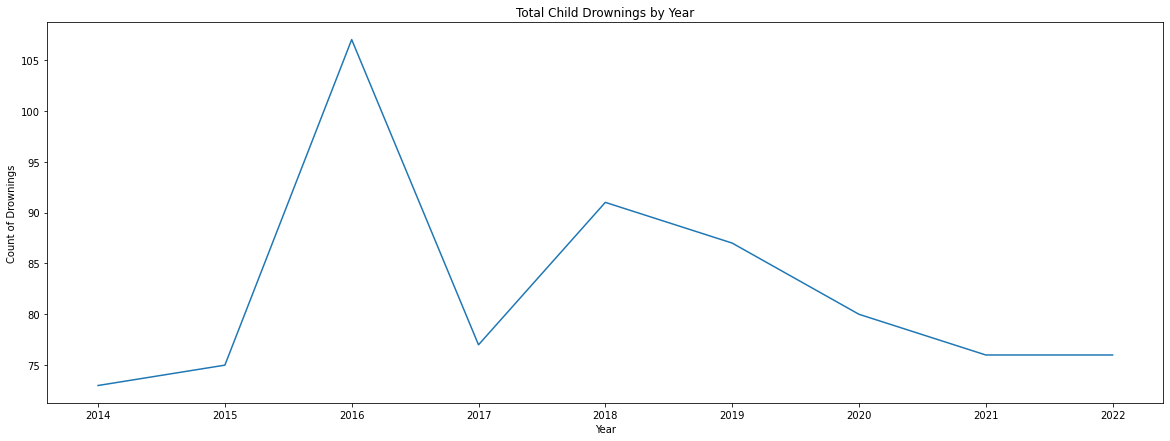

In [13]:
drownings_by_year(df)

<AxesSubplot:title={'center':'Total Child Drownings by County: 2016-2022'}, xlabel='County', ylabel='count'>

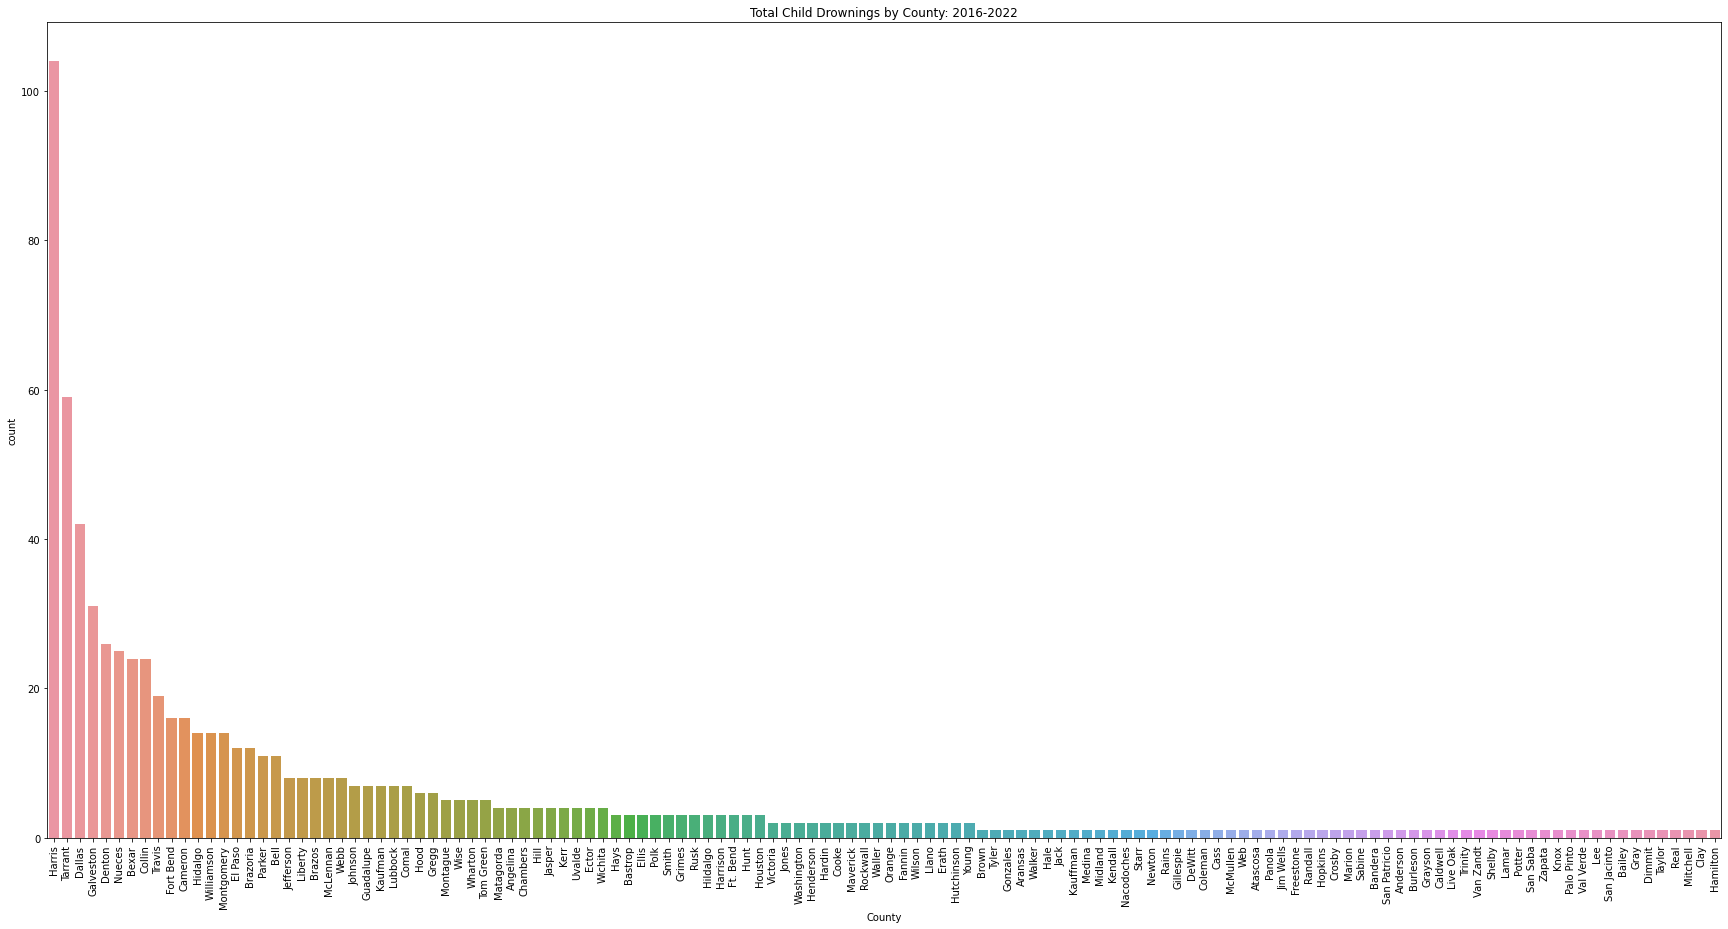

In [14]:
total_drownings_by_county(df)

<AxesSubplot:title={'center':'Total Child Drownings by Occurrence: 2016-2022'}, xlabel='Location', ylabel='count'>

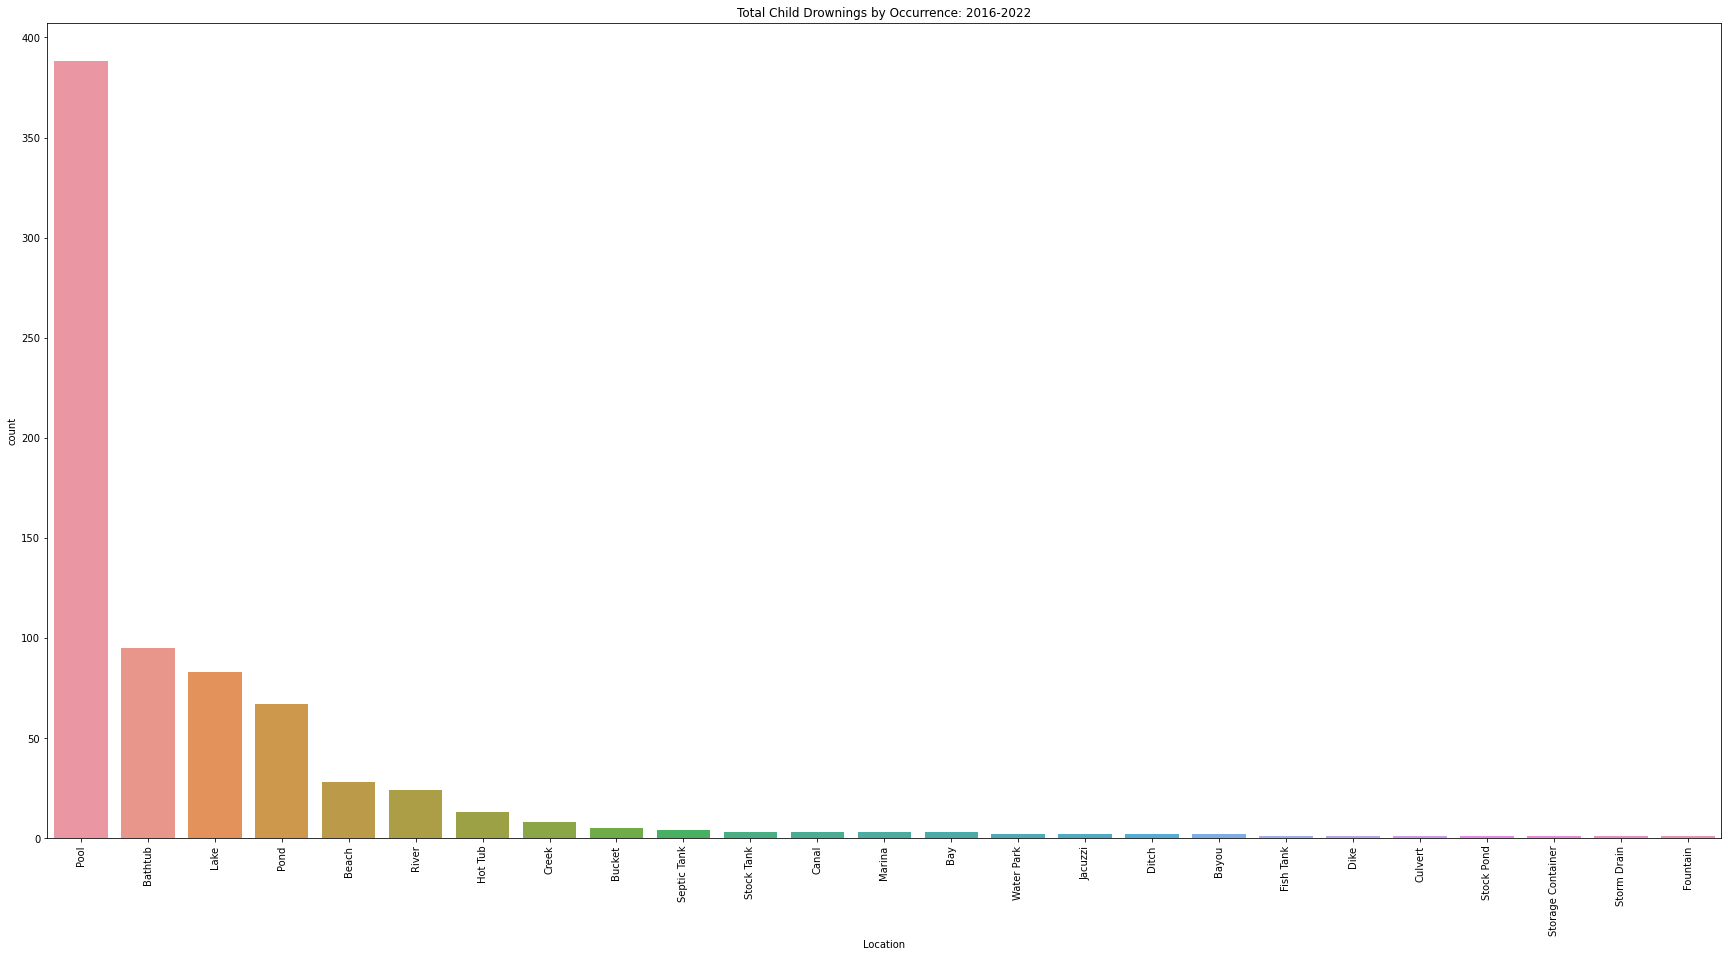

In [15]:
drownings_by_category(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age: 2016-2022'}, xlabel='Age', ylabel='count'>

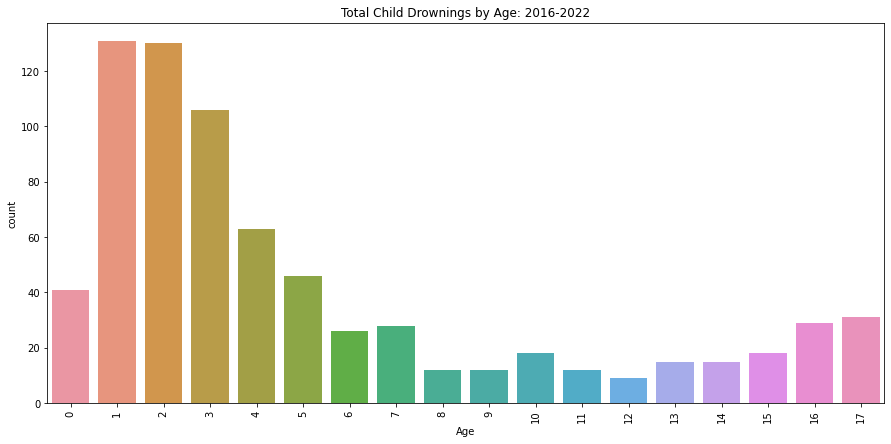

In [16]:
drownings_by_age(df)

<AxesSubplot:title={'center':'Total Child Drownings by Gender: 2016-2022'}, xlabel='Gender', ylabel='count'>

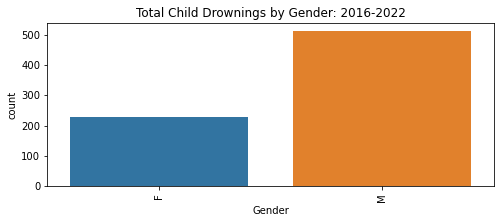

In [17]:
drownings_by_gender(df)

# Multi-Variate (More Than One Variable) Analysis

<AxesSubplot:title={'center':'Total Child Drownings by Age: 2016-2022'}, xlabel='Age', ylabel='count'>

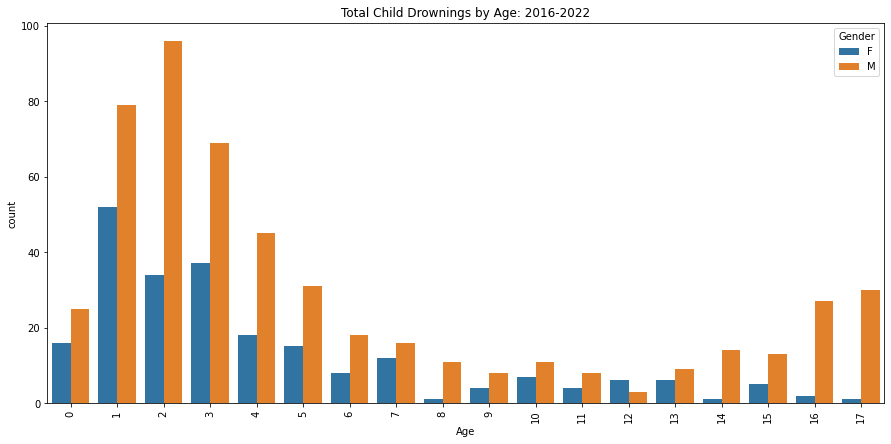

In [18]:
drownings_by_age_gender(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age at Pool: 2016-2022'}, xlabel='Location', ylabel='count'>

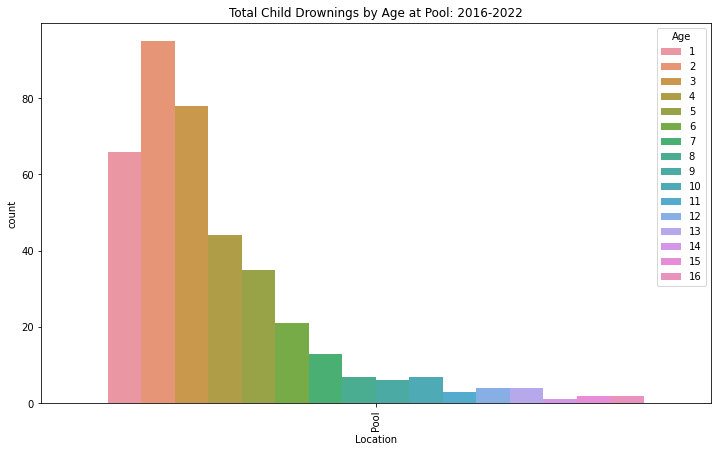

In [19]:
drownings_by_age_pool(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Bathtub: 2016-2022'}, xlabel='Location', ylabel='count'>

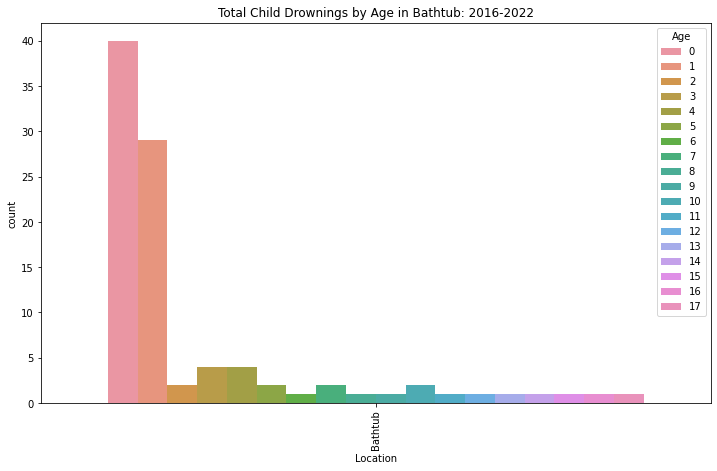

In [129]:
drownings_by_age_bathtub(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Lakes: 2016-2022'}, xlabel='Location', ylabel='count'>

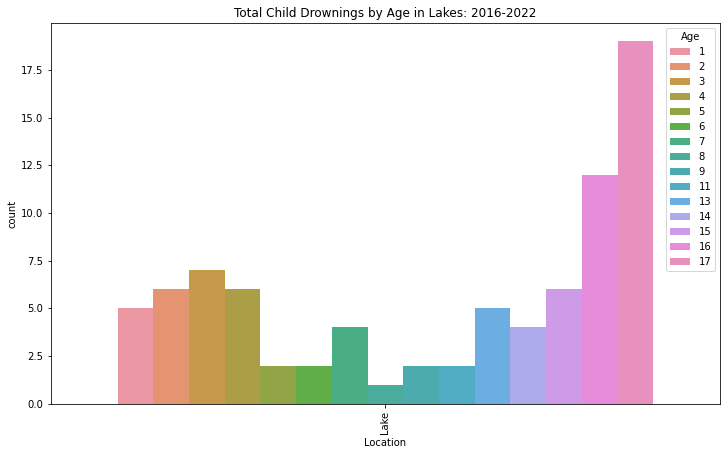

In [131]:
drownings_by_age_lake(df)

<AxesSubplot:title={'center':'Total Child Drownings by Age in Ponds: 2016-2022'}, xlabel='Location', ylabel='count'>

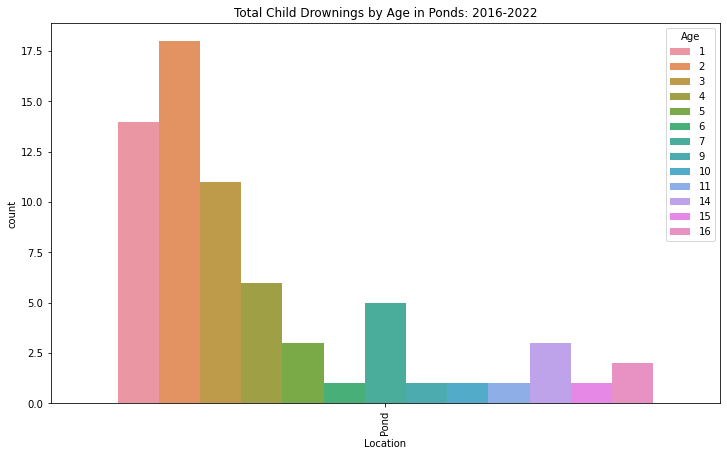

In [133]:
drownings_by_age_pond(df)

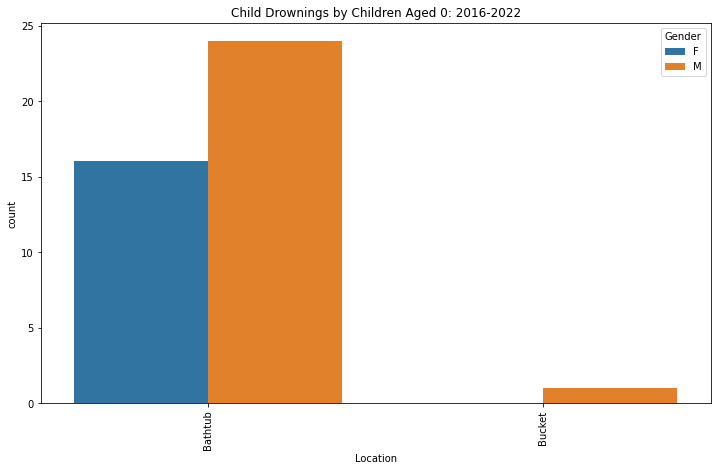

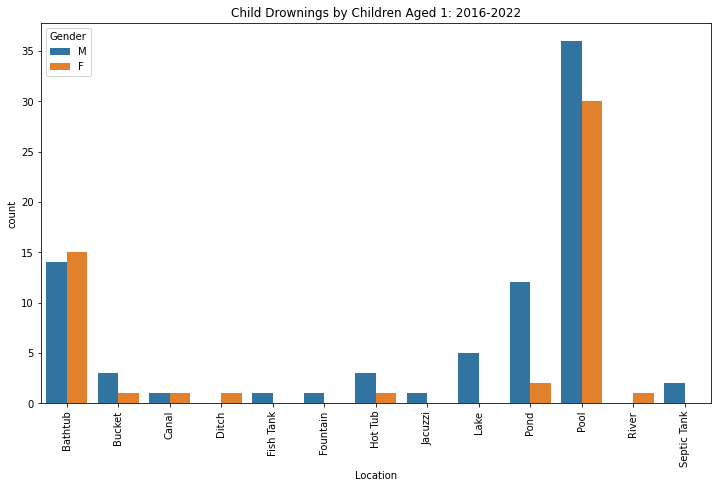

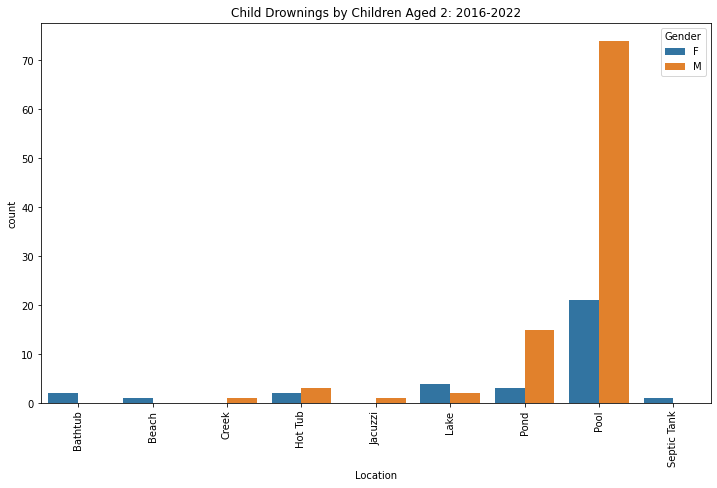

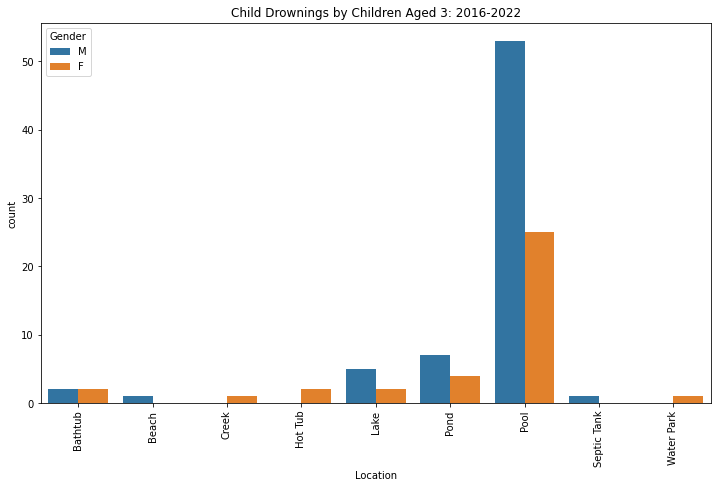

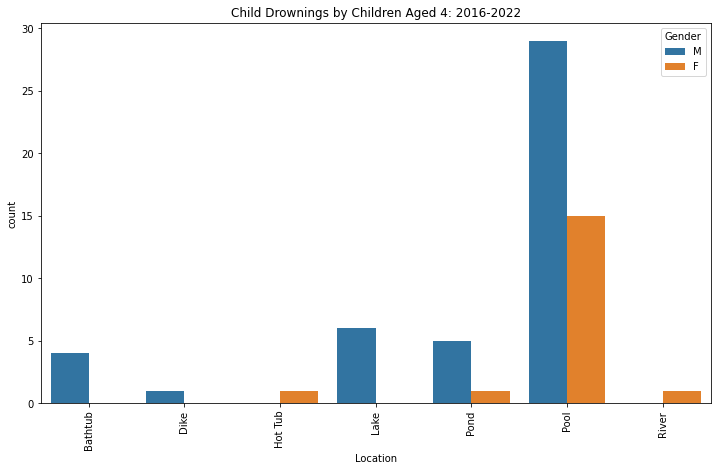

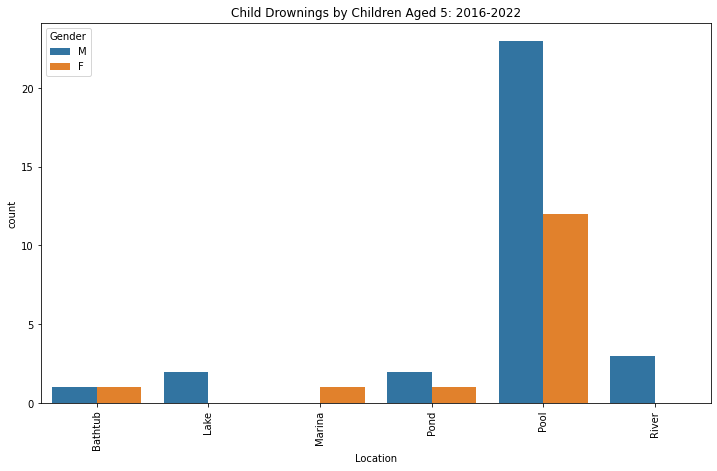

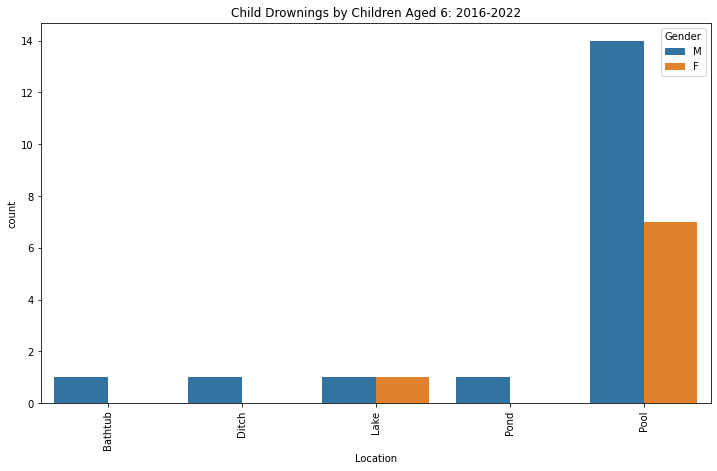

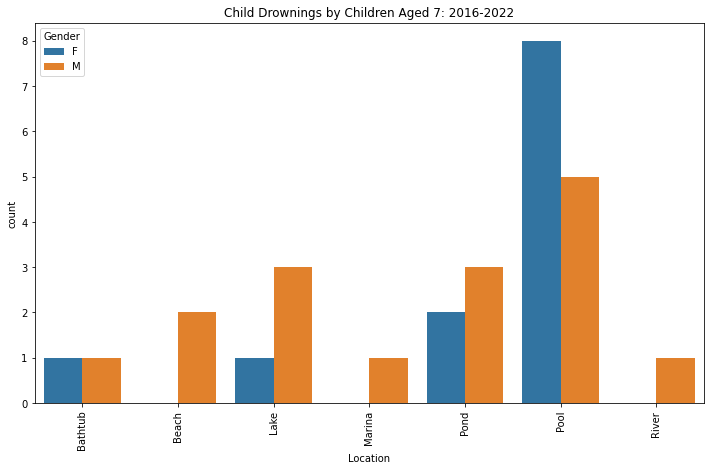

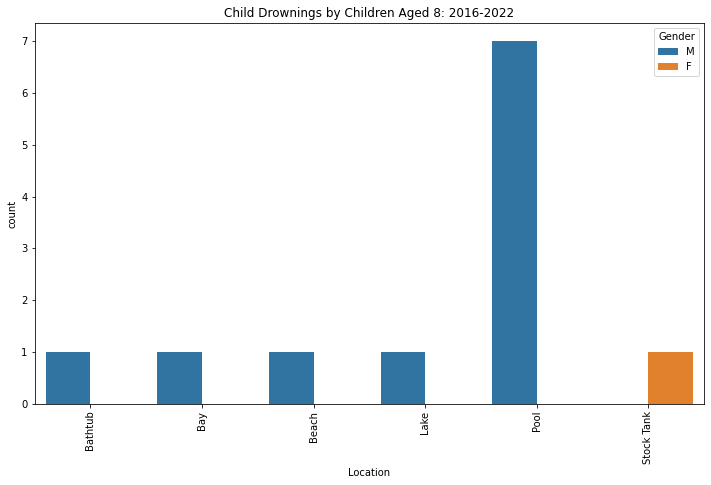

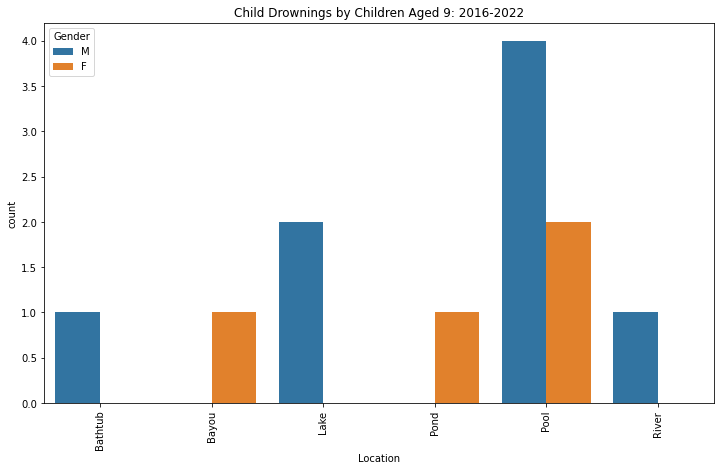

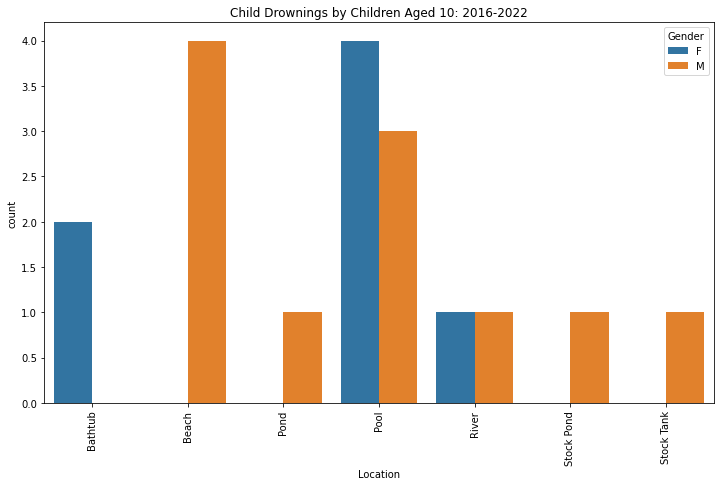

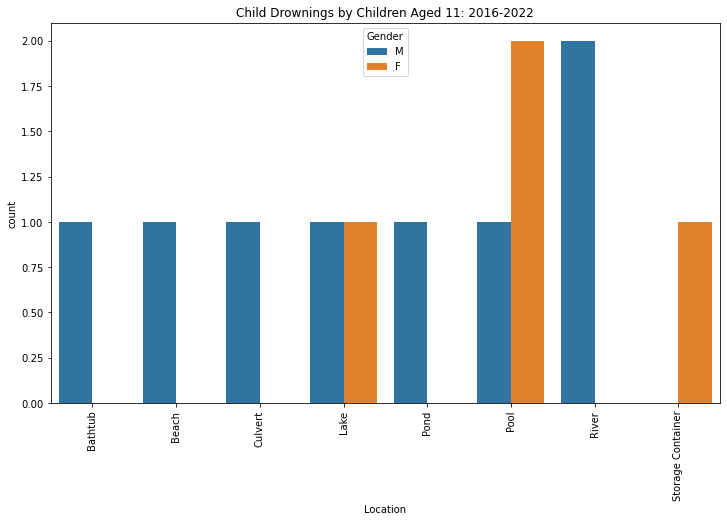

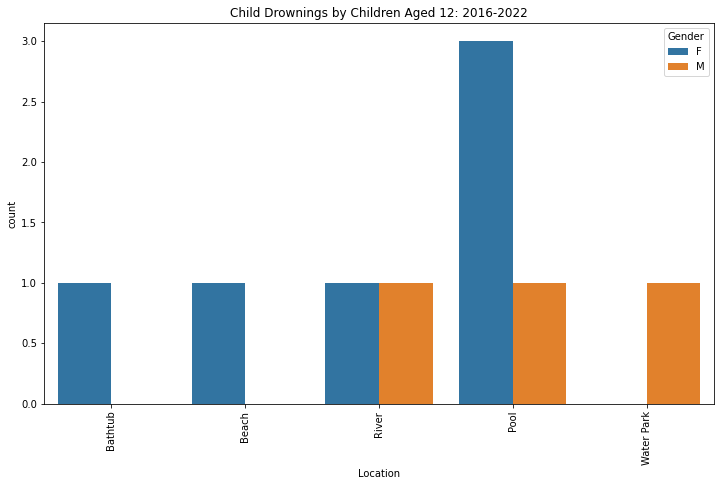

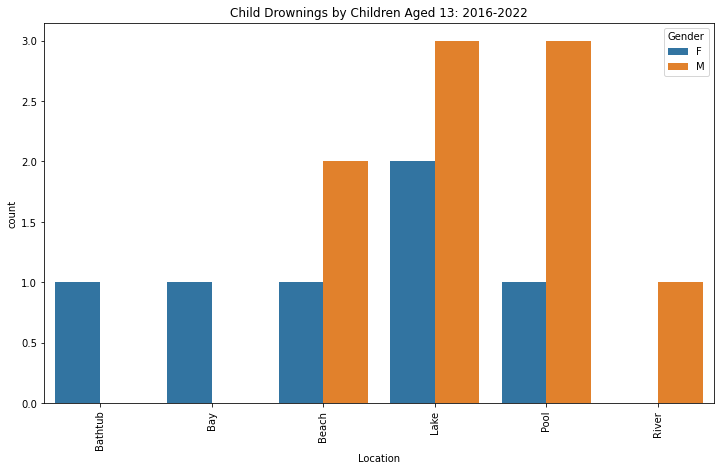

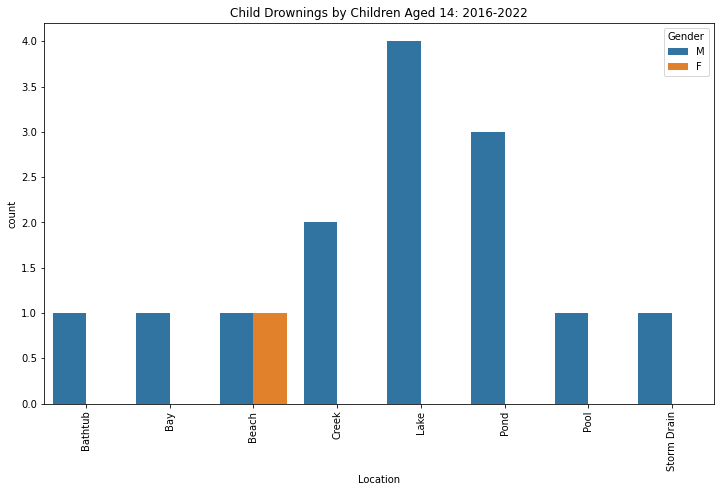

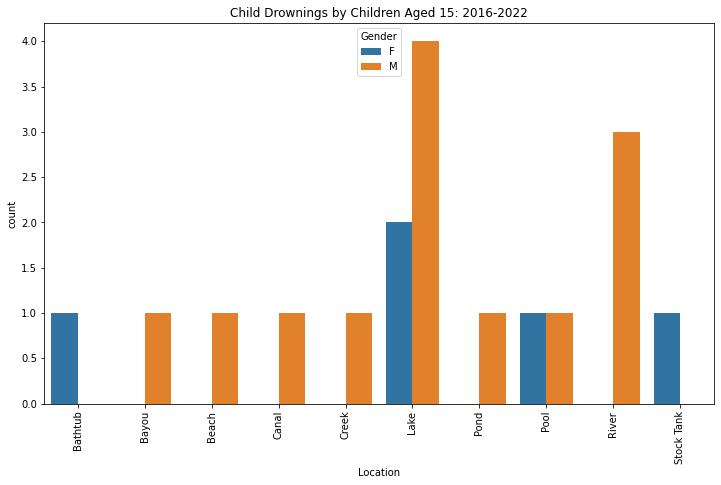

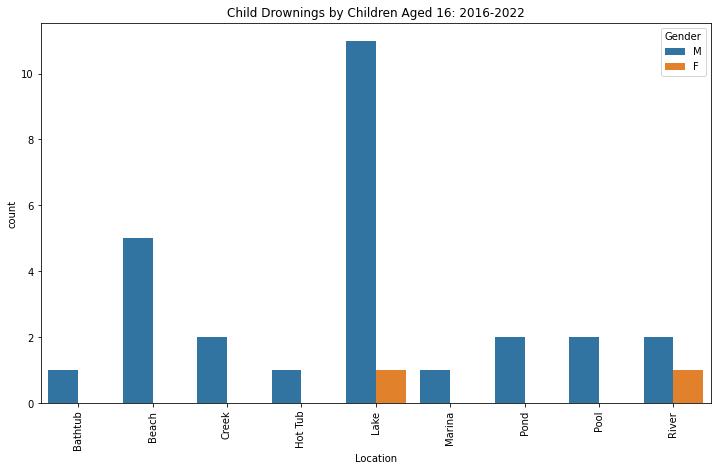

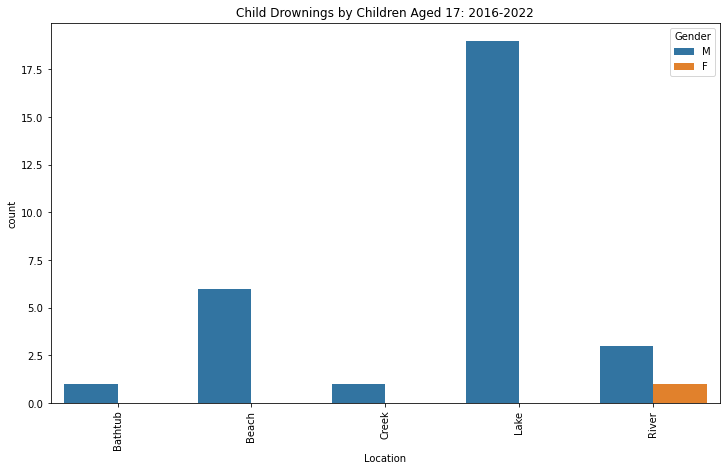

In [200]:
most_dangerous_location_by_age(df)

<AxesSubplot:title={'center':'Total Child Drownings by Secondary Location: 2016-2022'}, xlabel='Secondary Location', ylabel='count'>

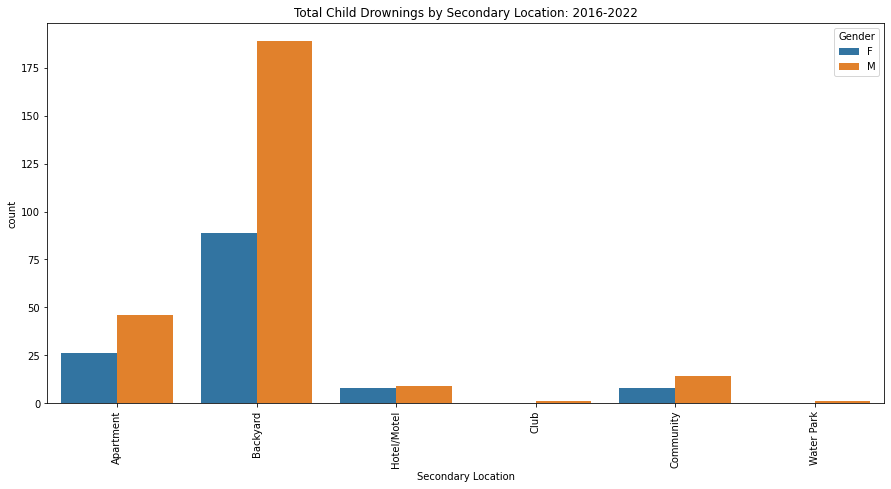

In [203]:
drownings_by_secondary_location(df)

C:\Users\aeroe\AppData\Local\Temp/ipykernel_30500/3533828445.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


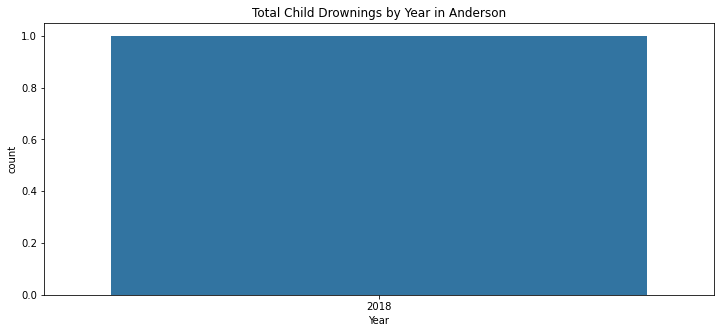

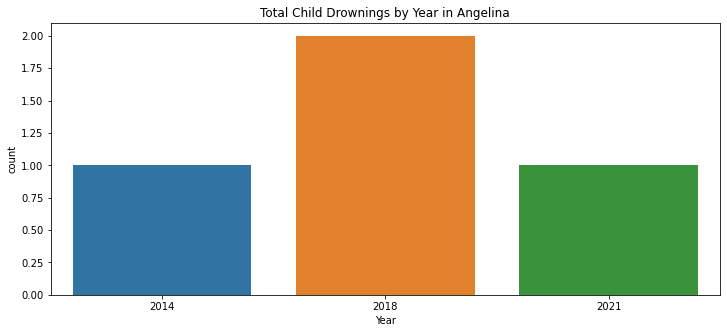

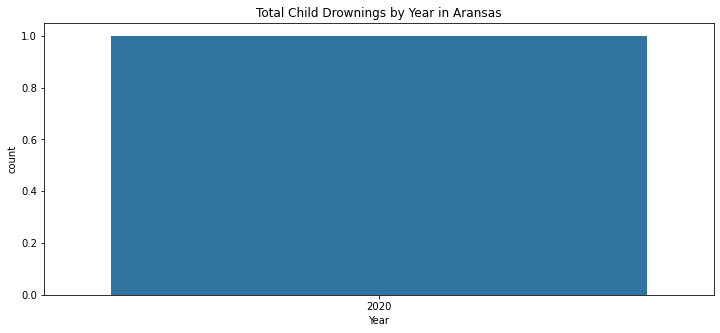

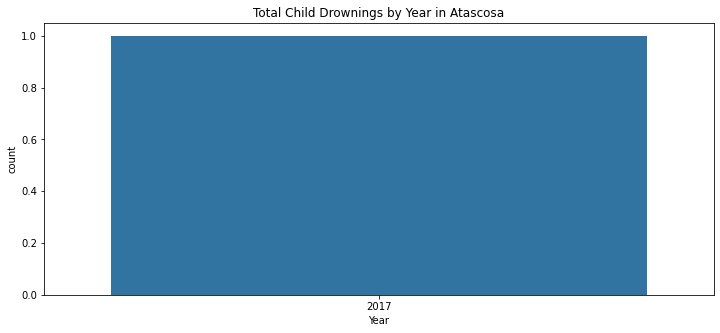

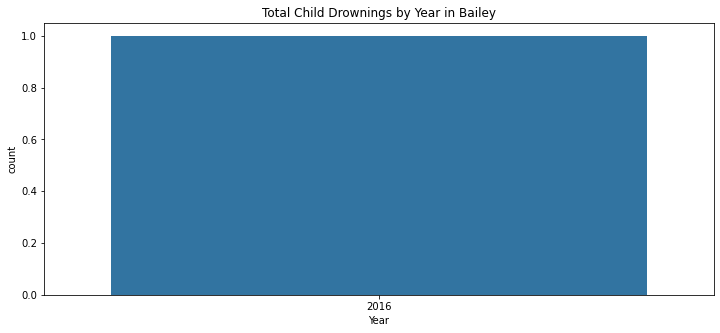

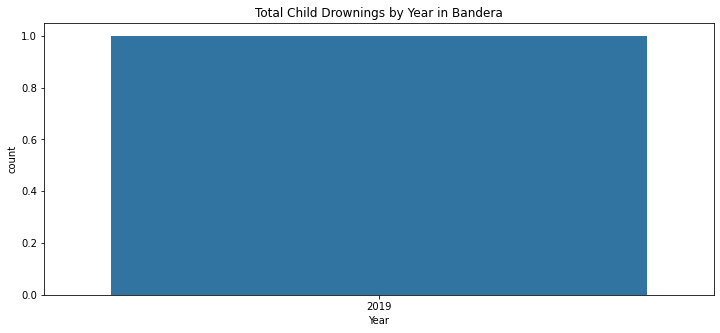

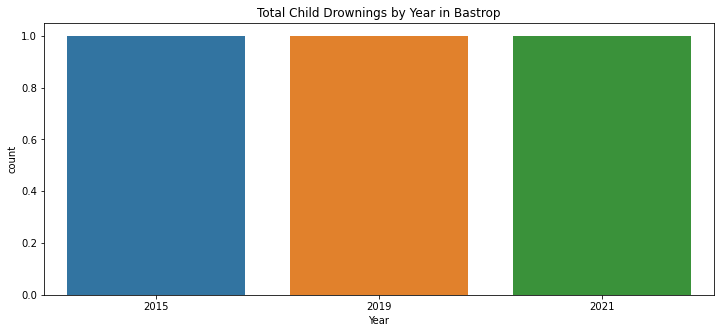

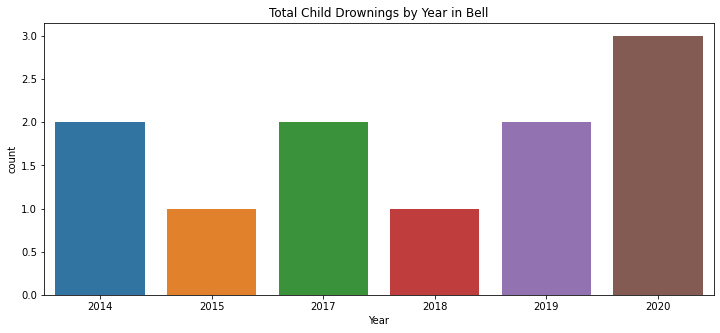

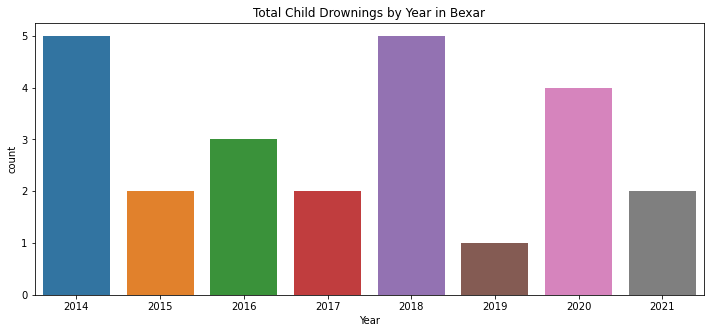

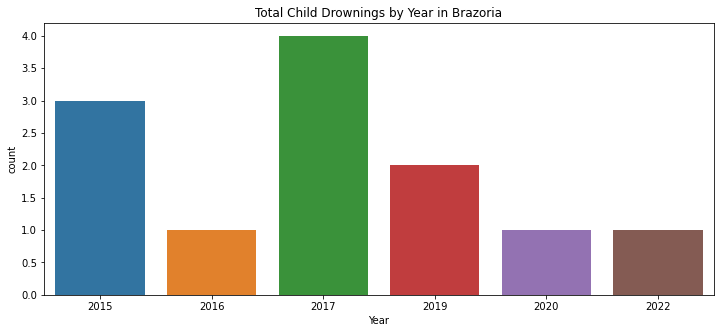

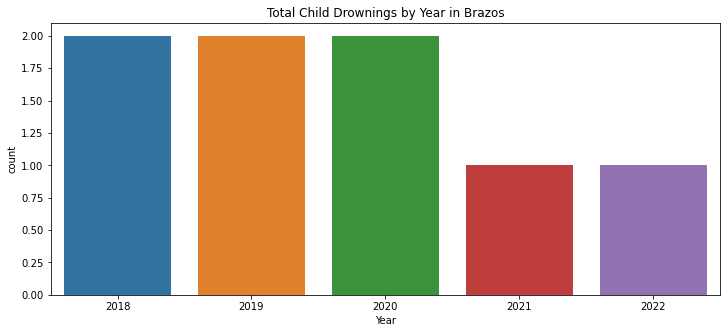

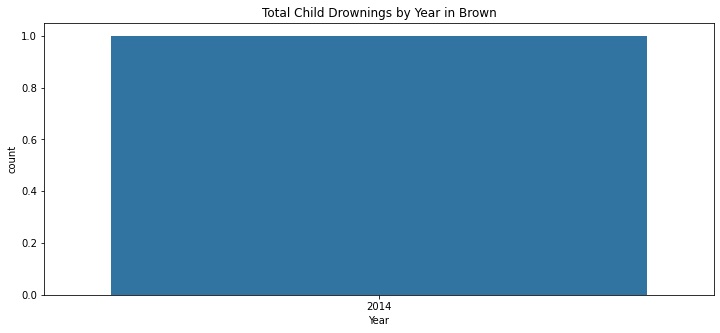

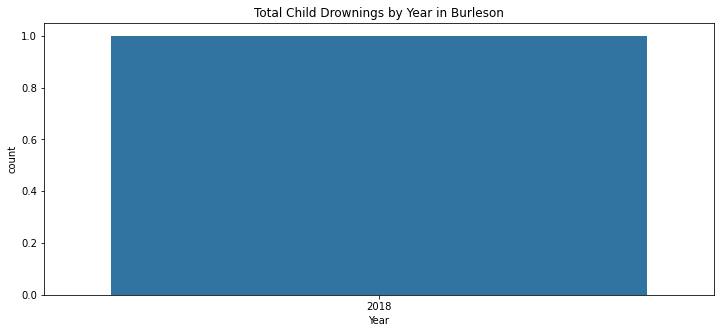

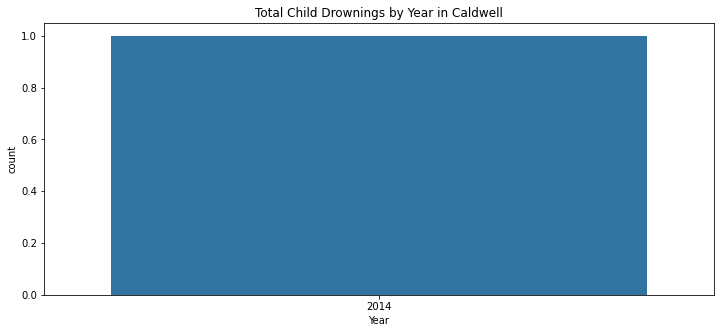

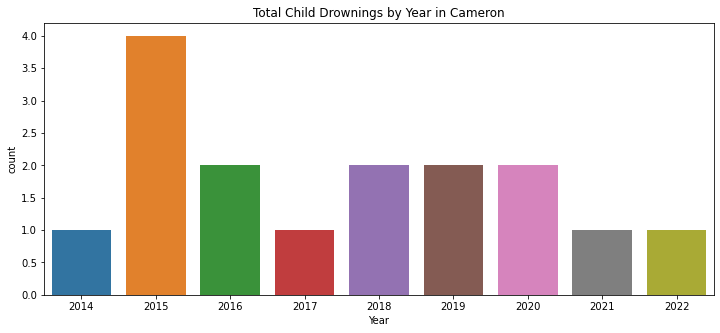

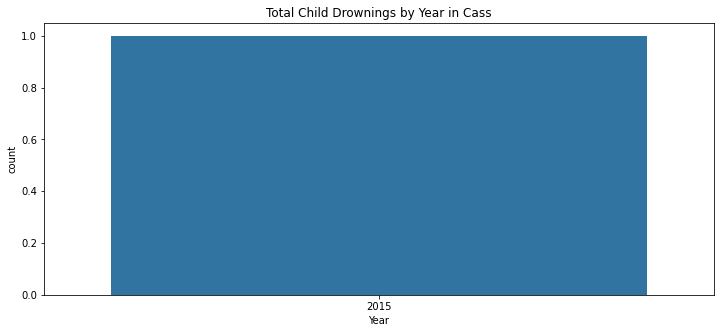

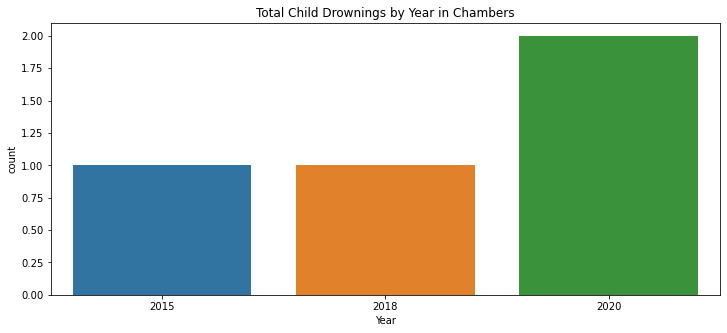

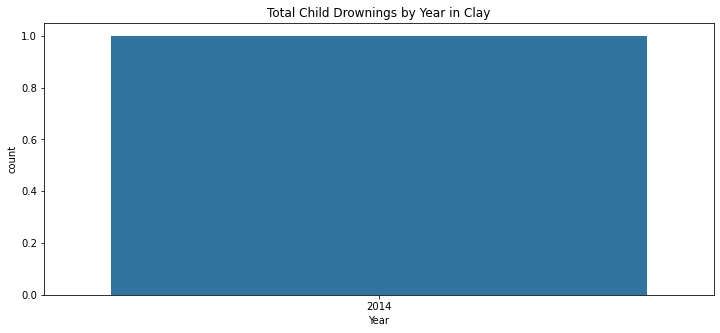

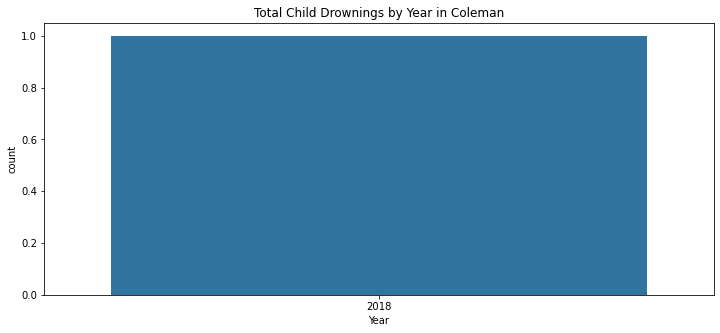

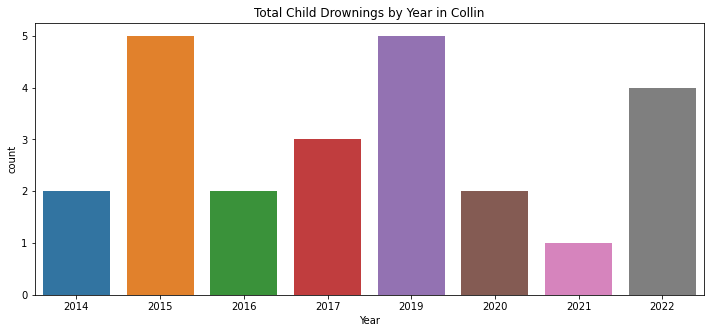

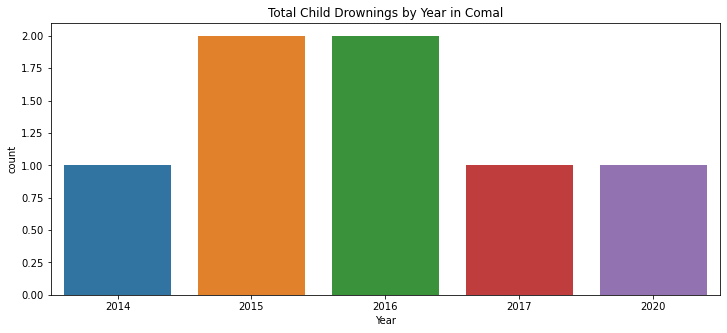

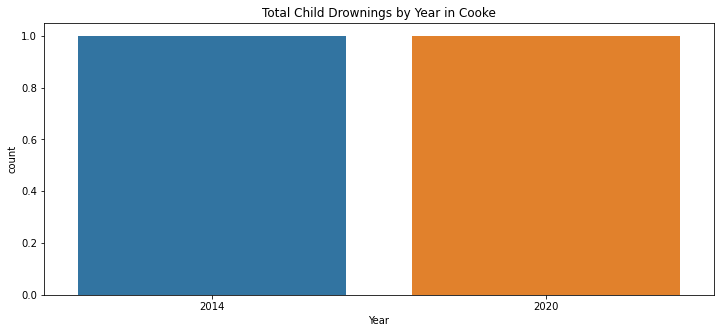

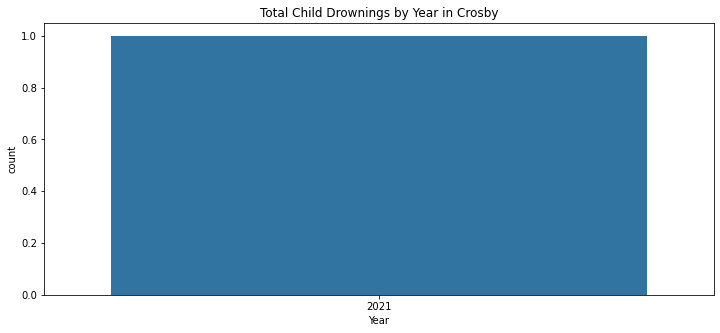

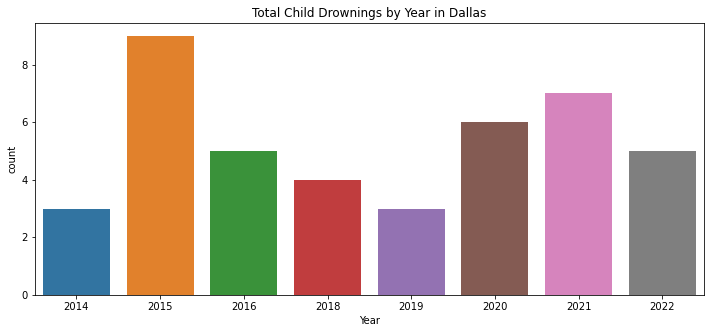

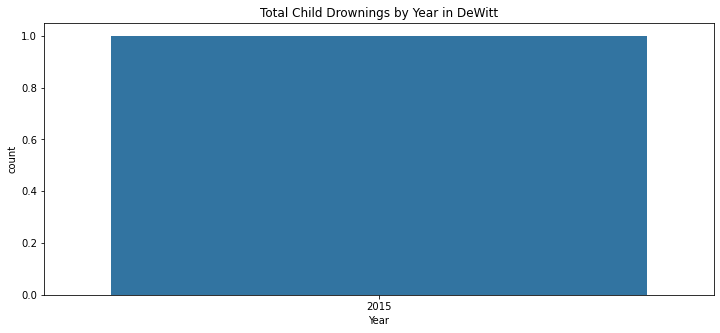

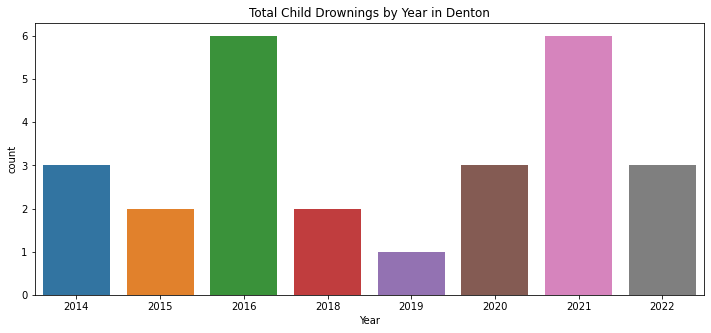

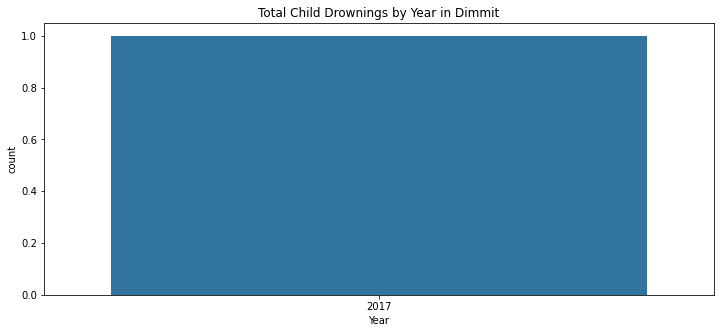

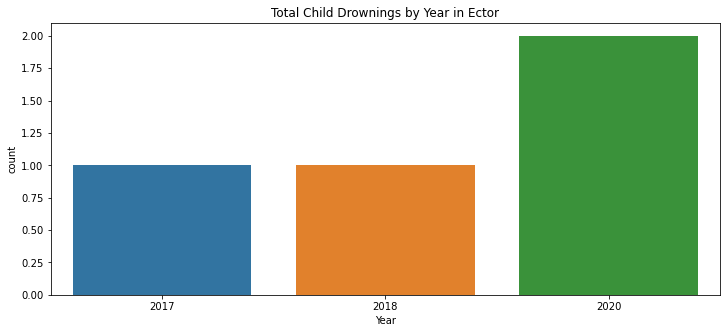

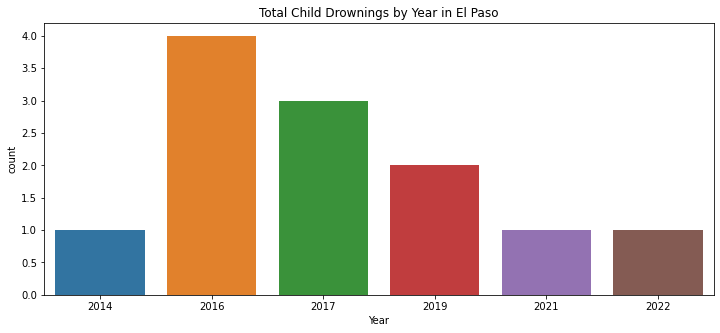

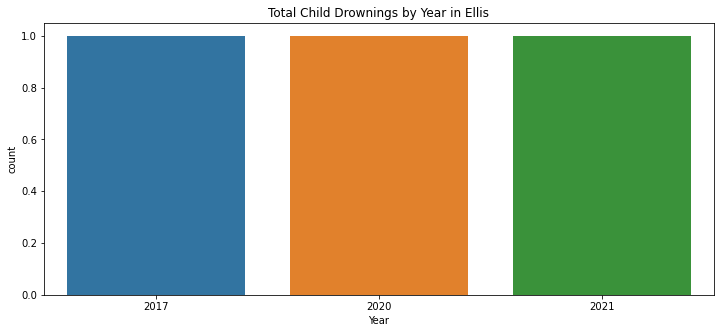

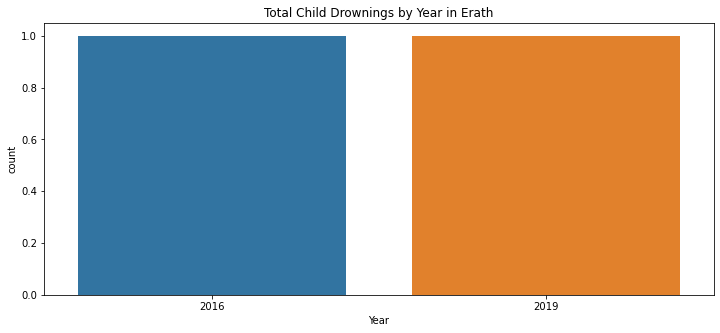

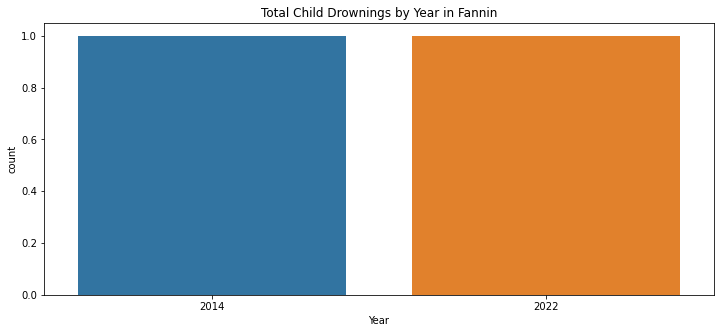

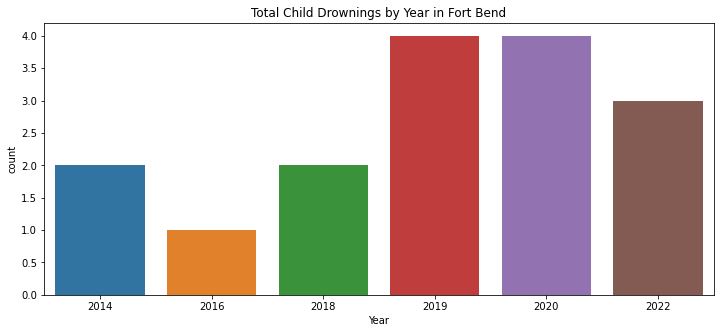

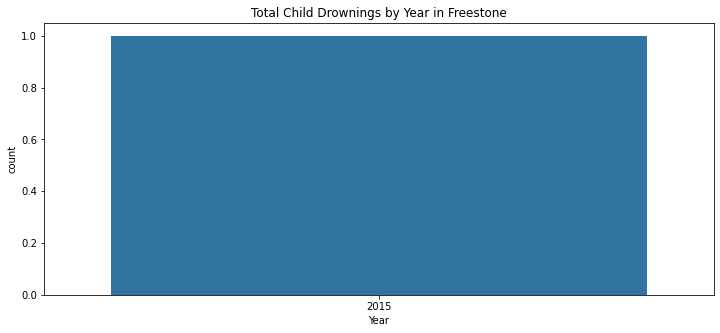

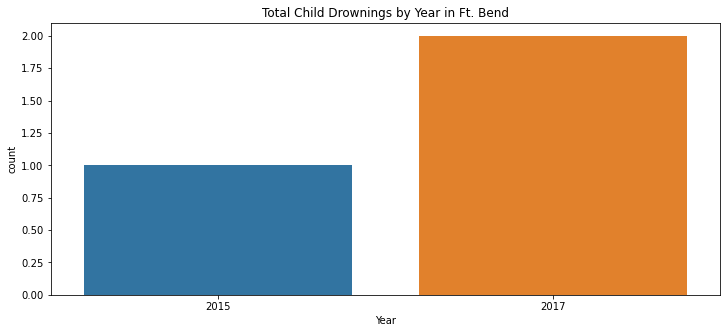

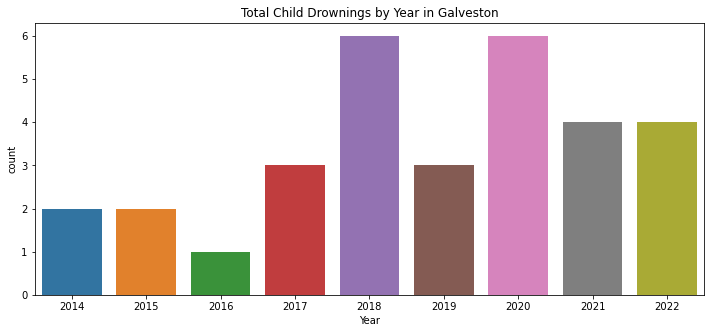

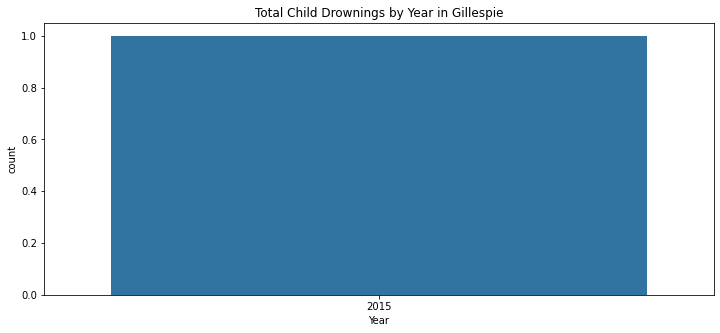

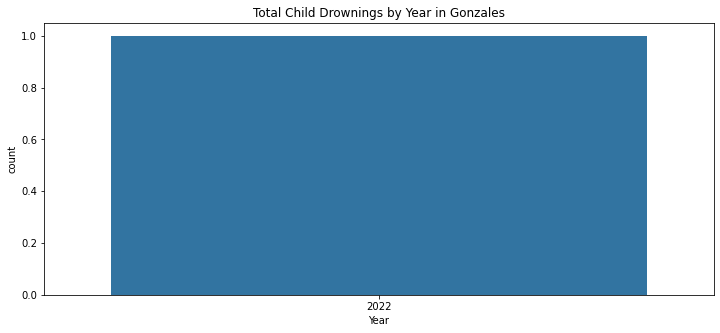

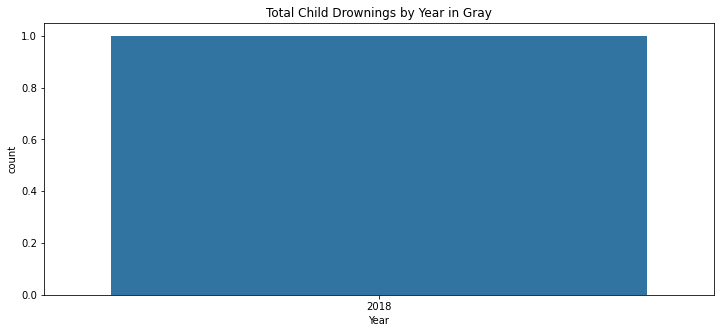

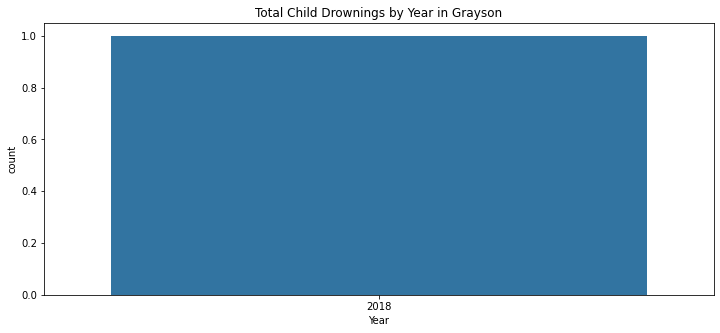

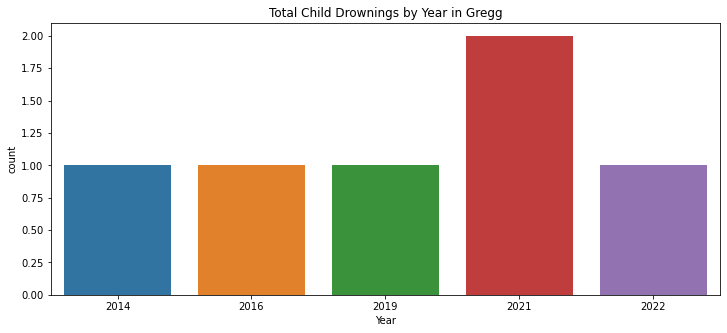

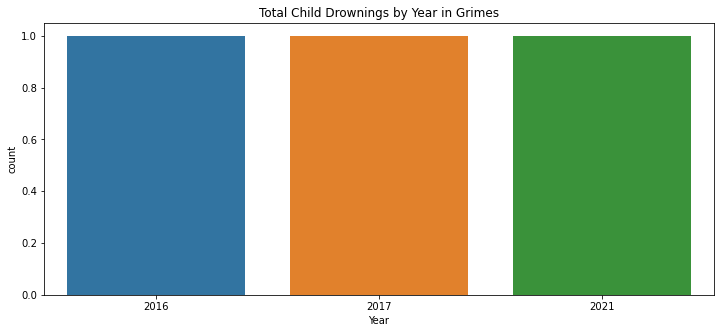

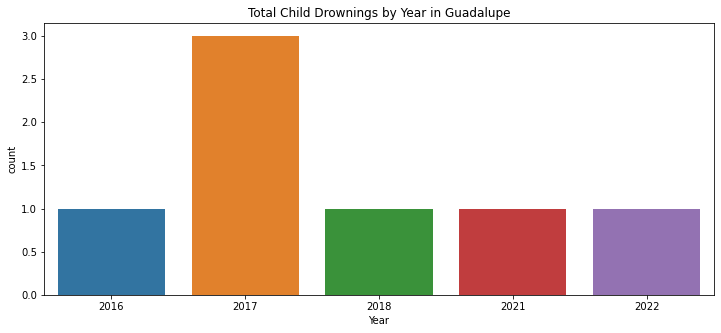

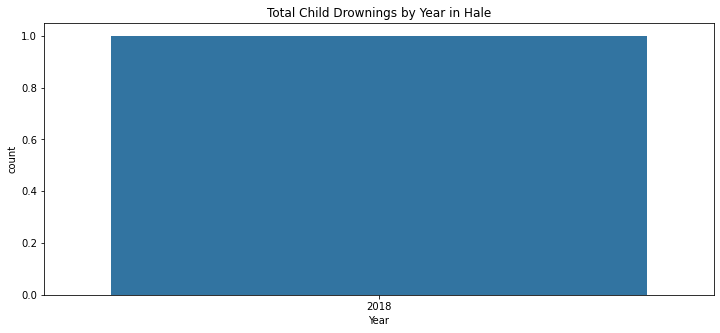

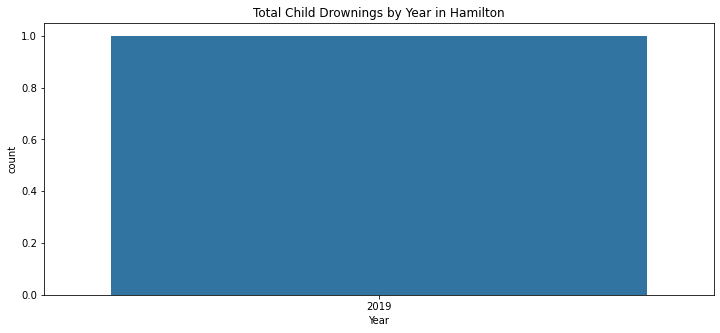

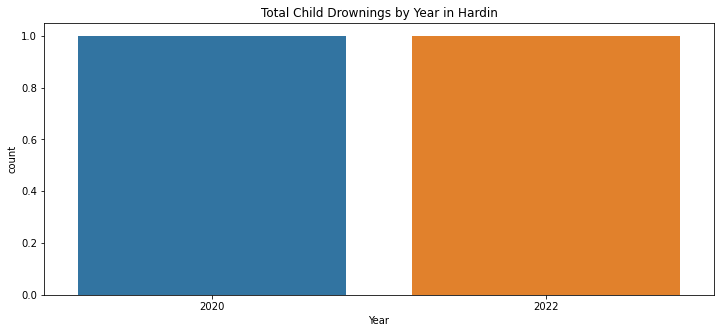

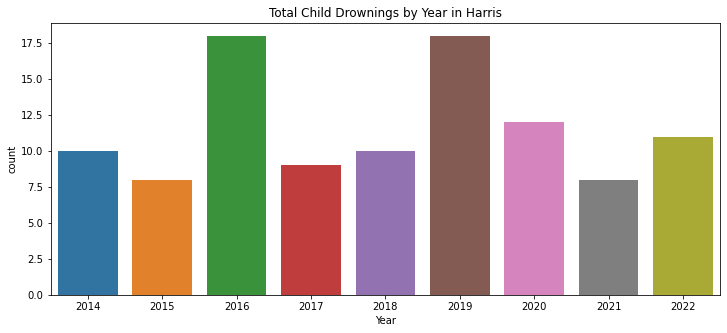

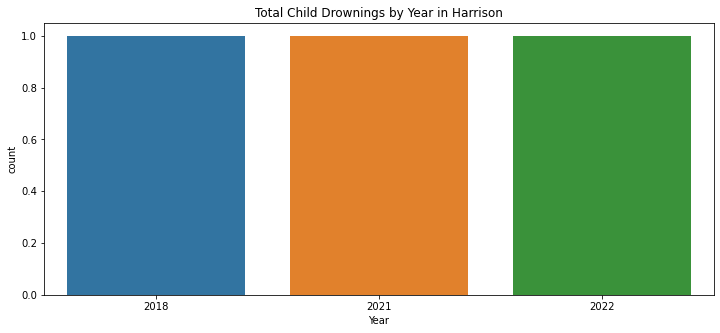

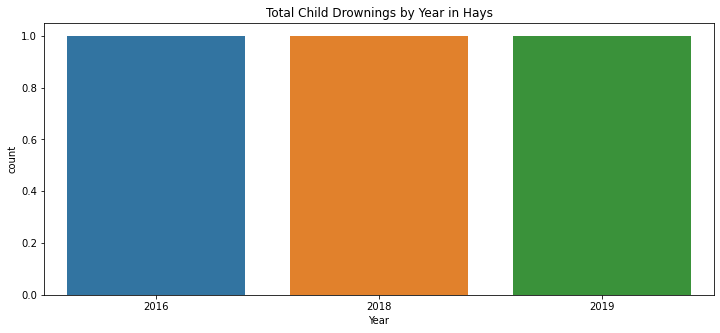

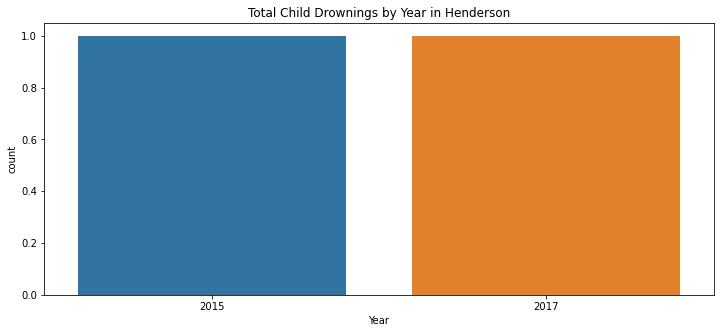

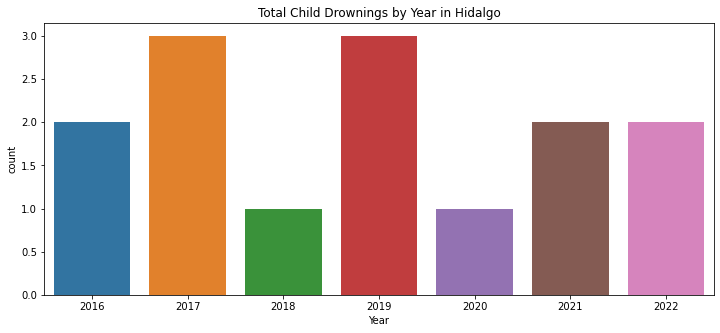

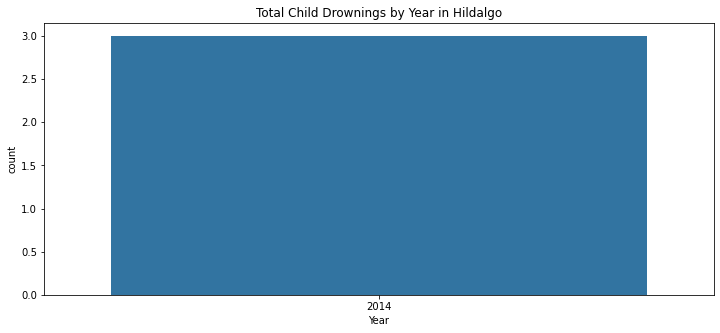

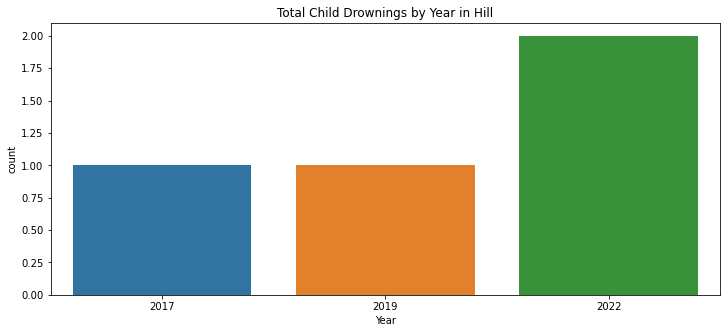

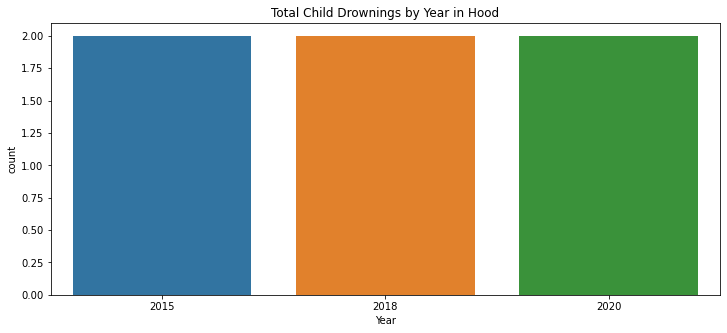

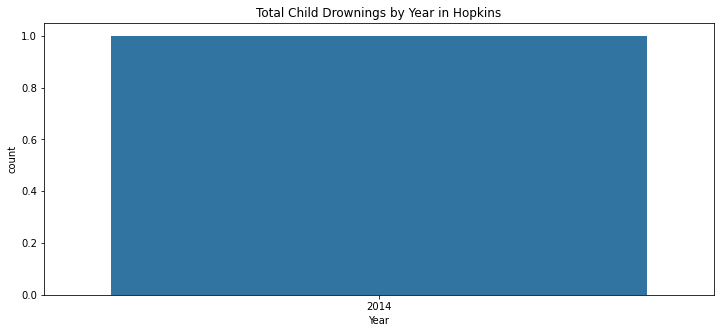

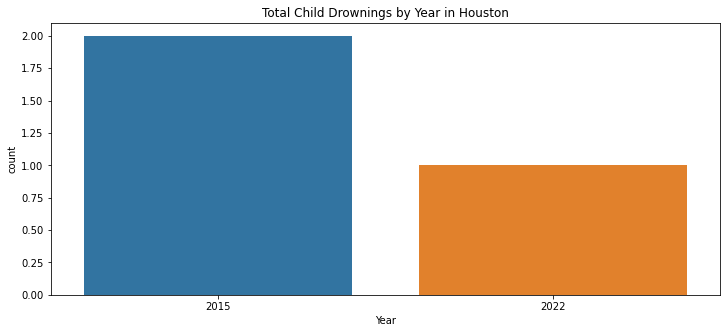

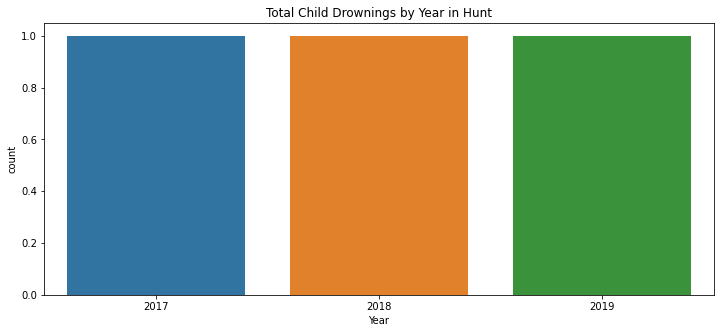

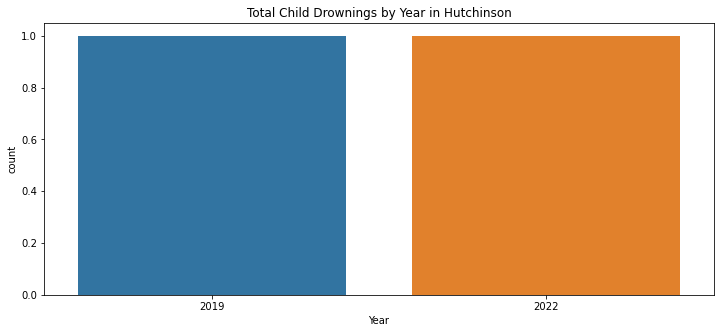

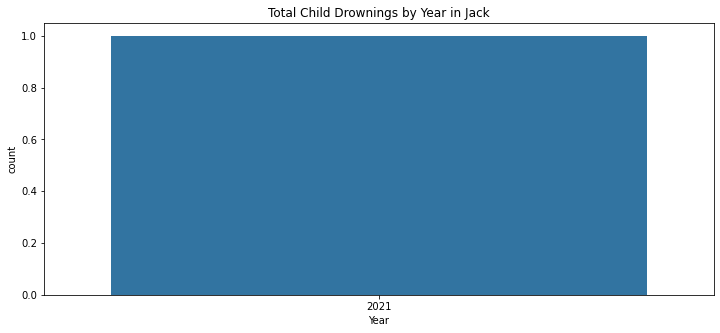

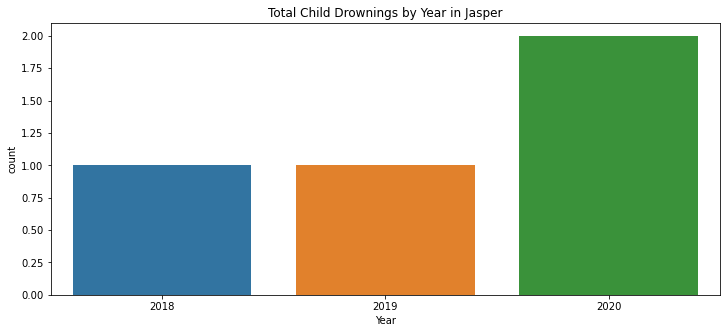

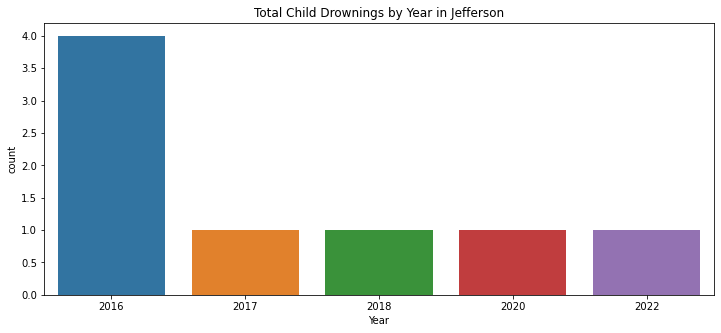

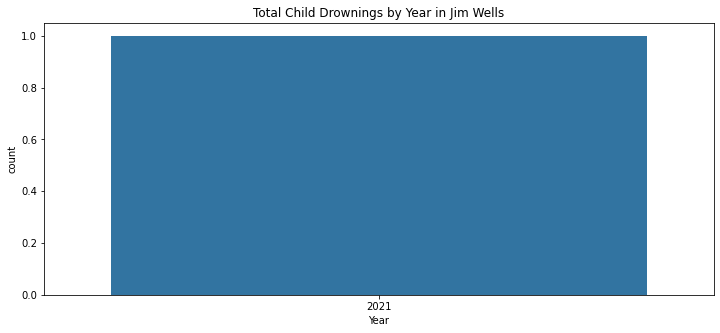

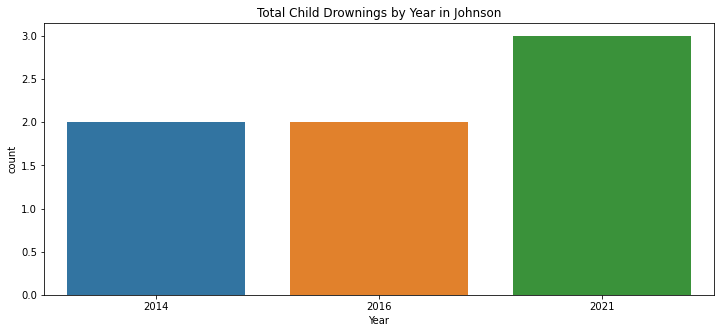

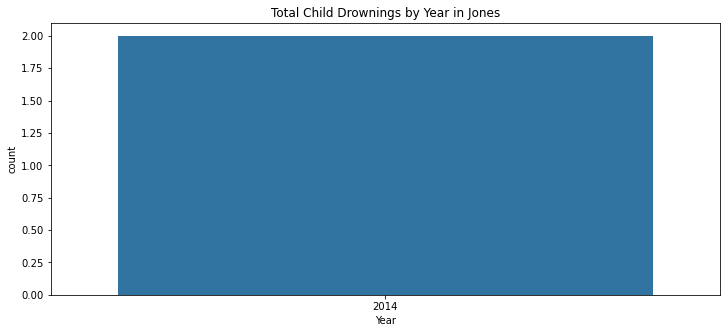

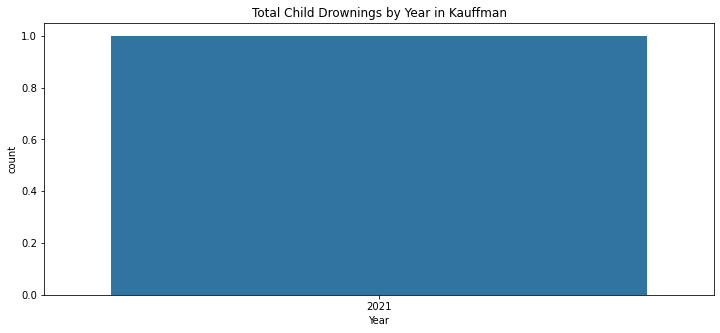

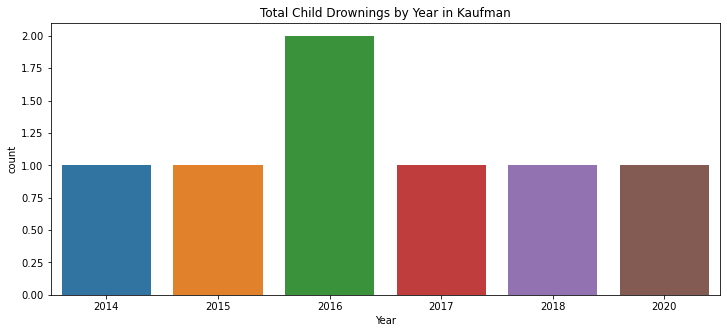

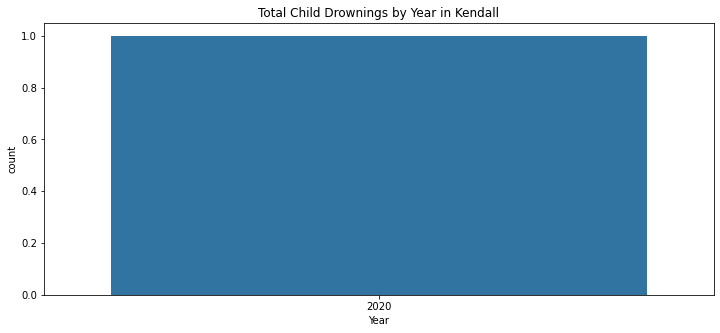

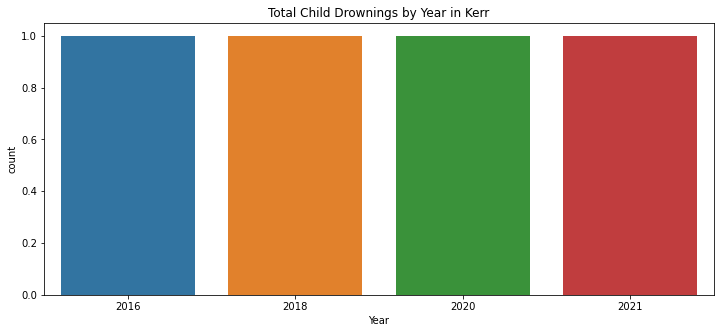

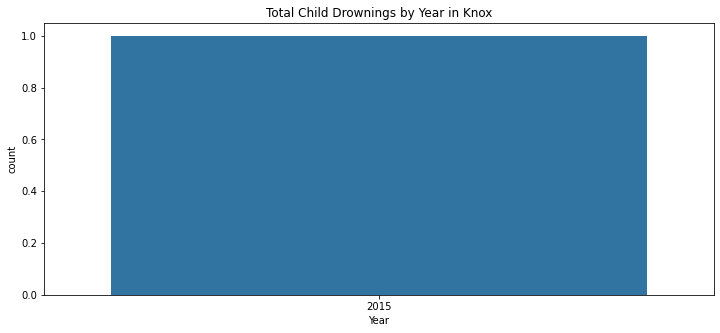

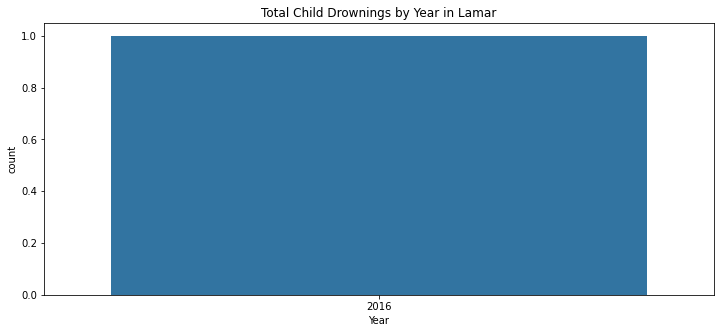

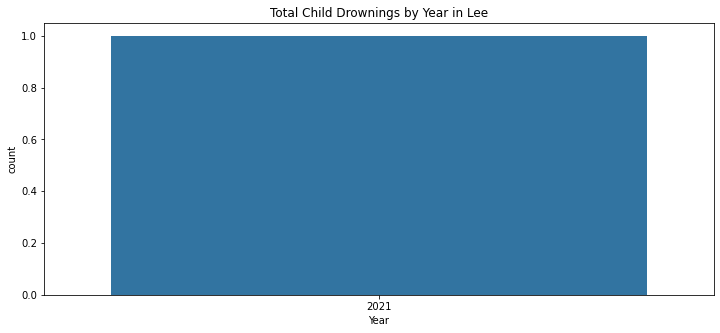

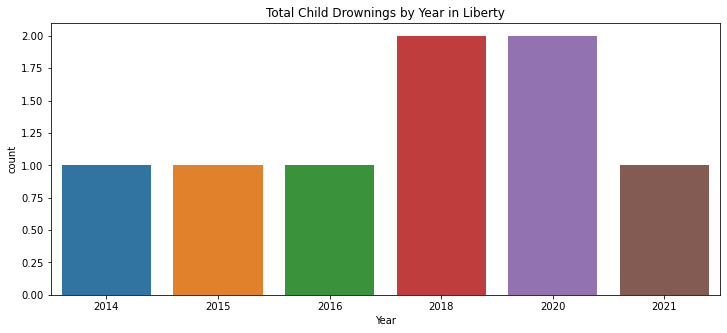

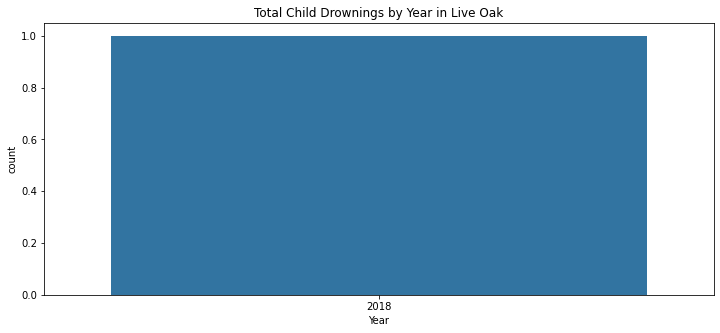

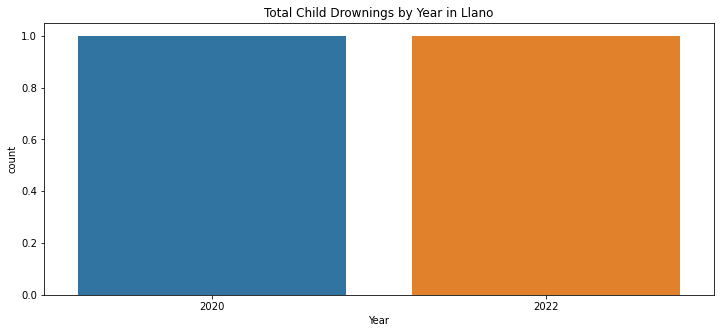

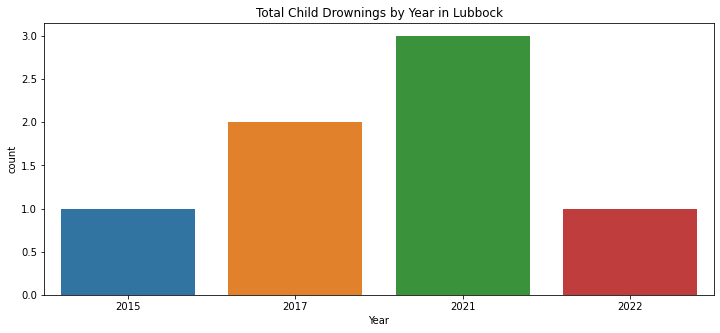

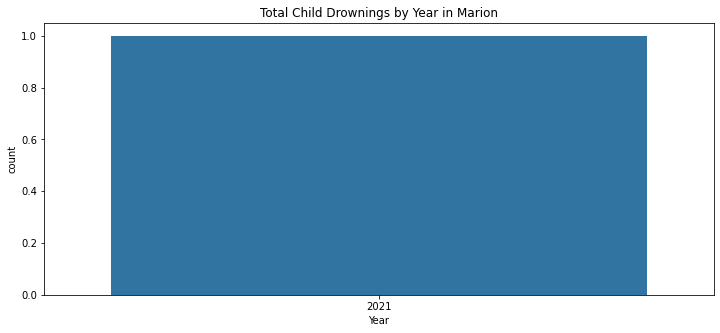

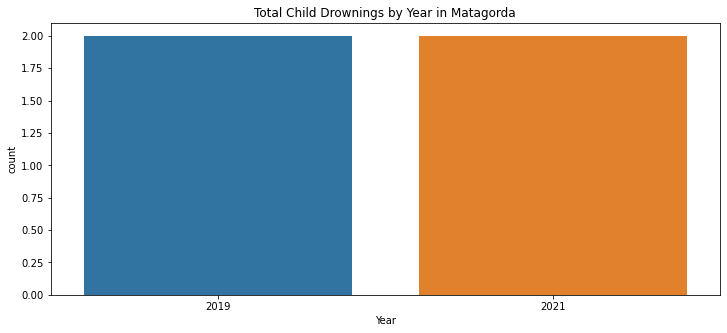

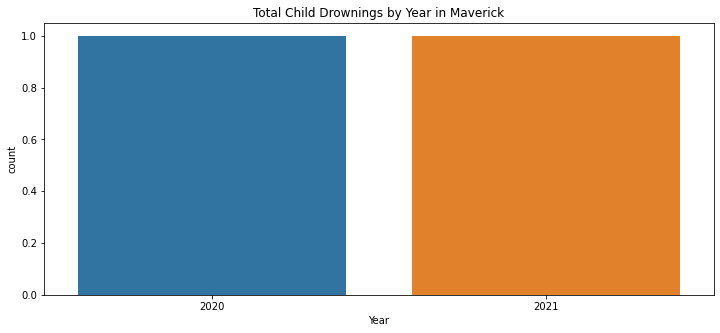

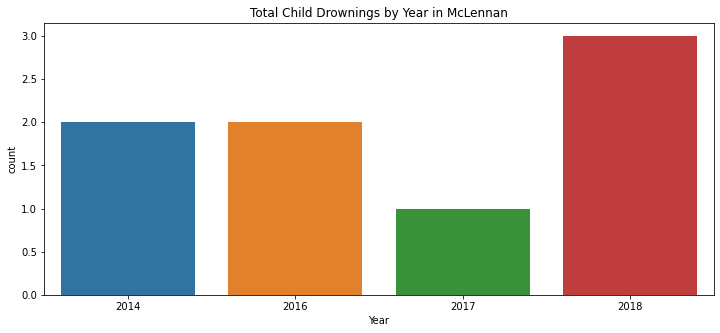

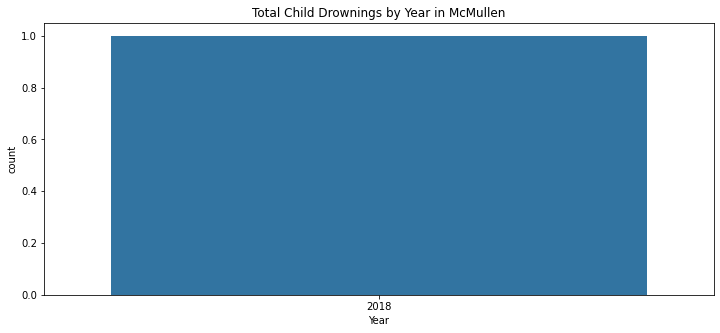

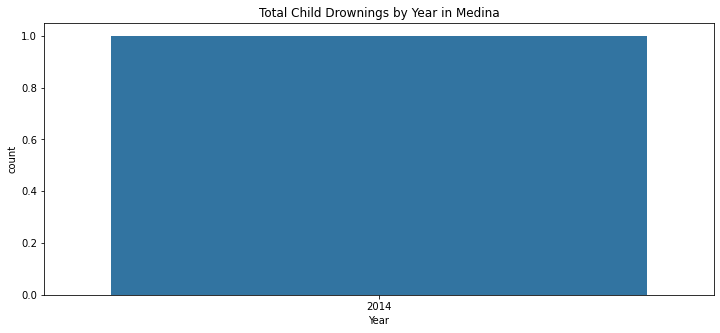

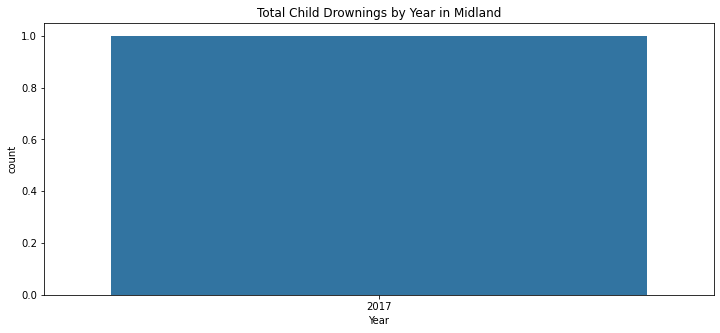

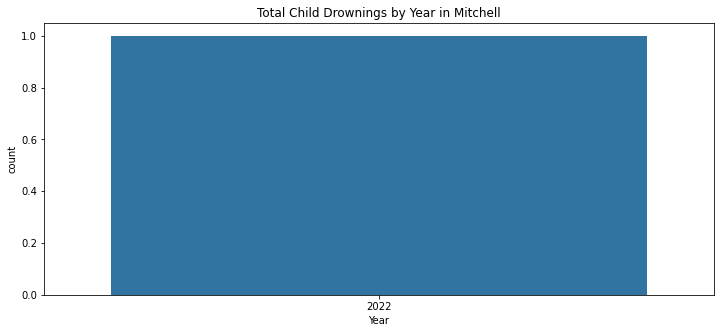

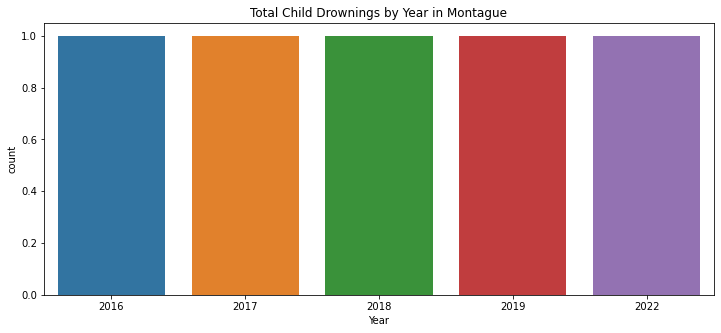

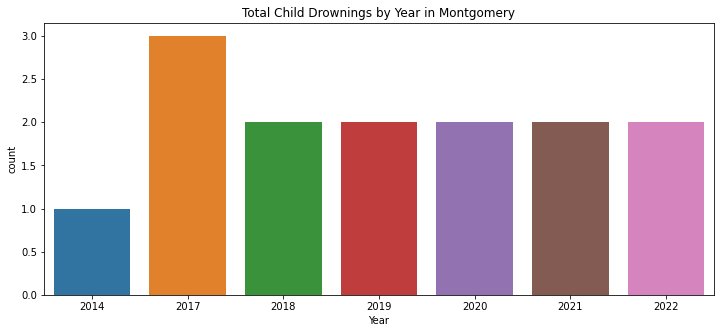

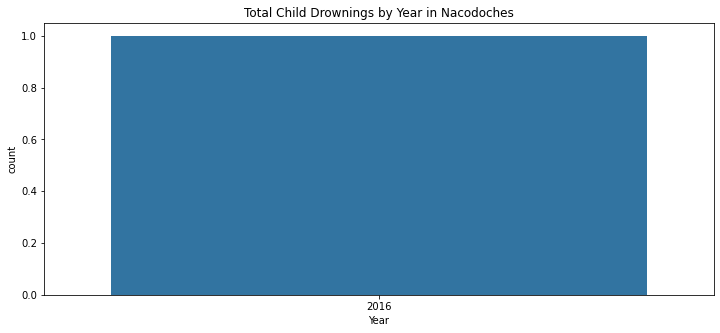

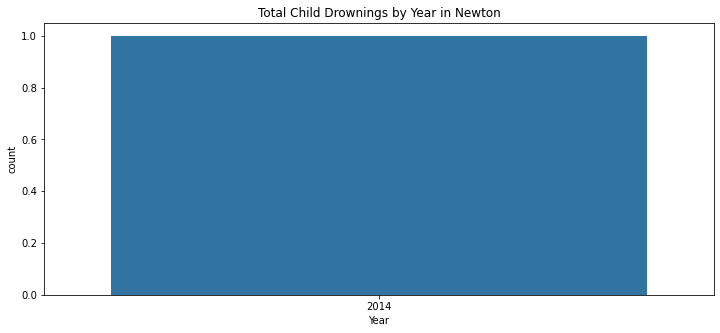

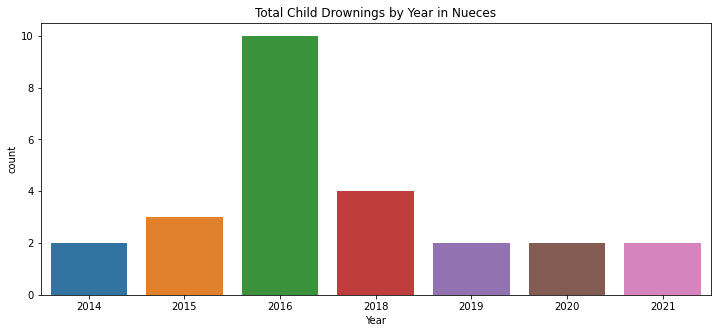

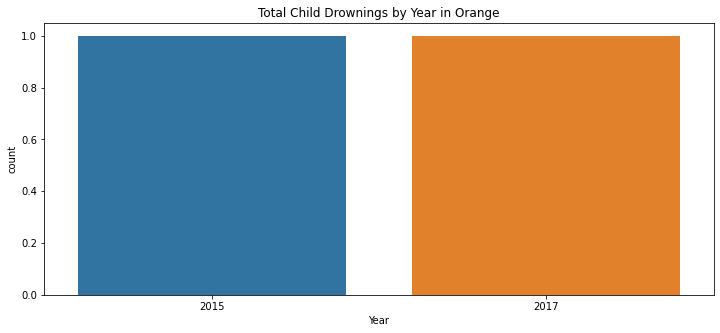

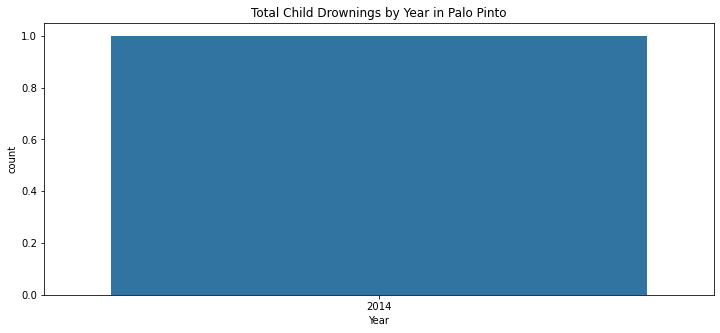

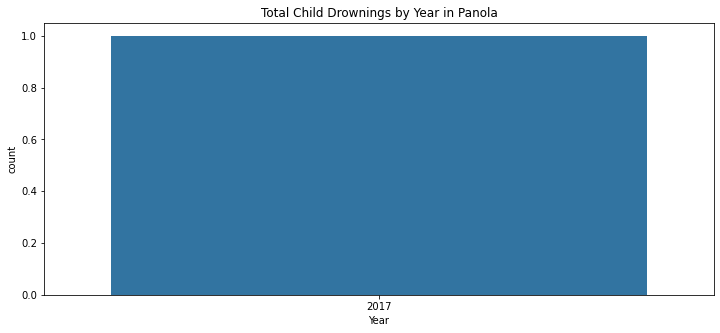

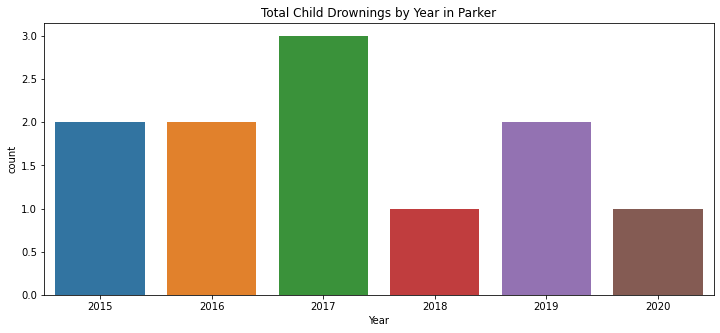

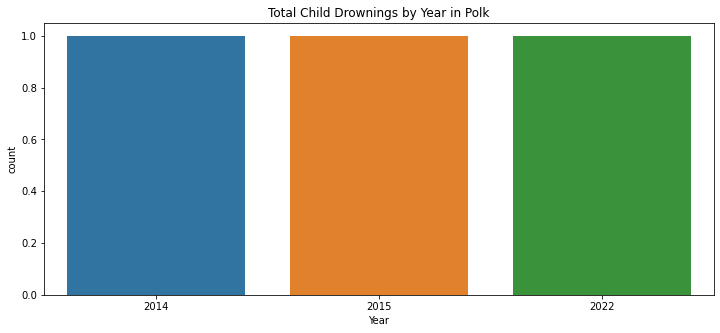

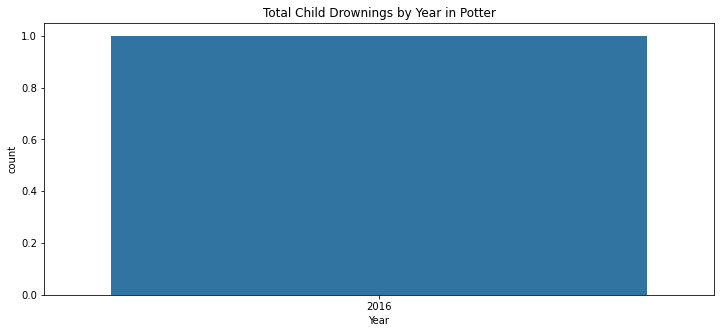

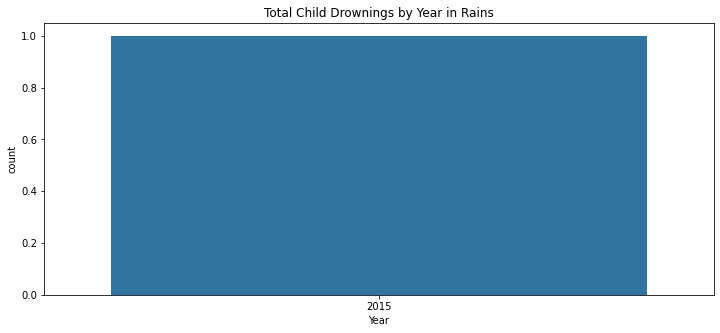

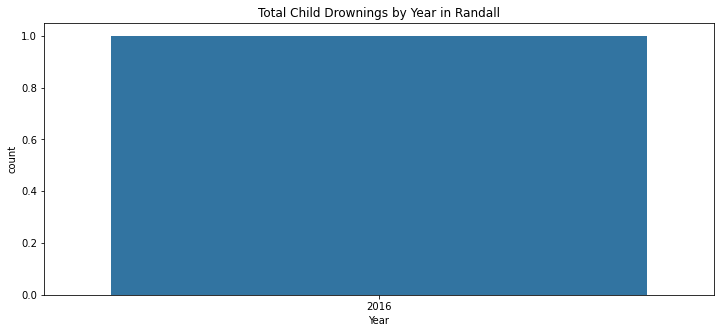

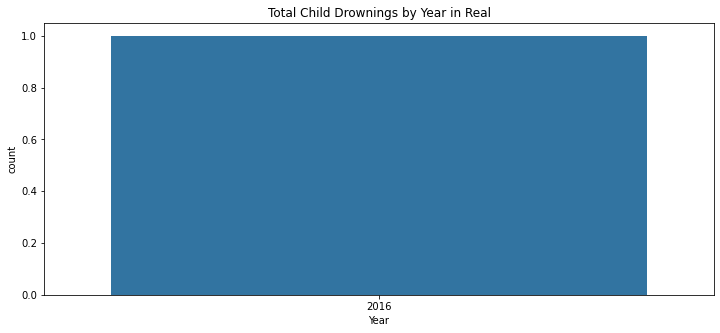

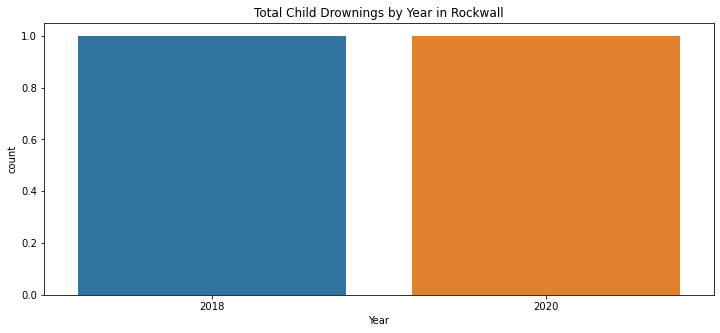

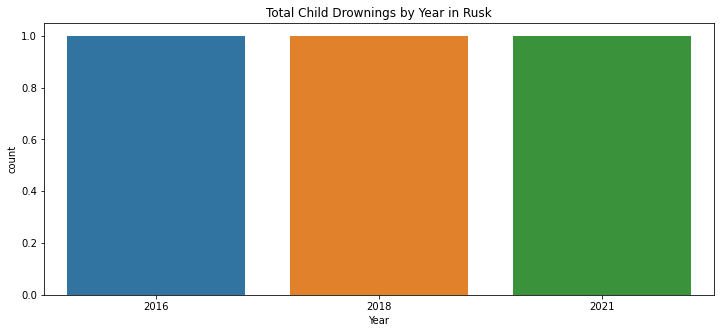

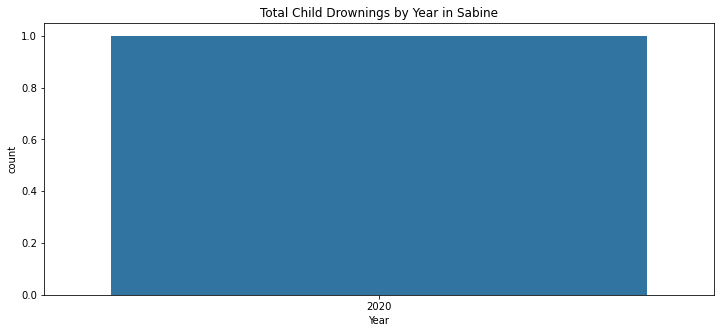

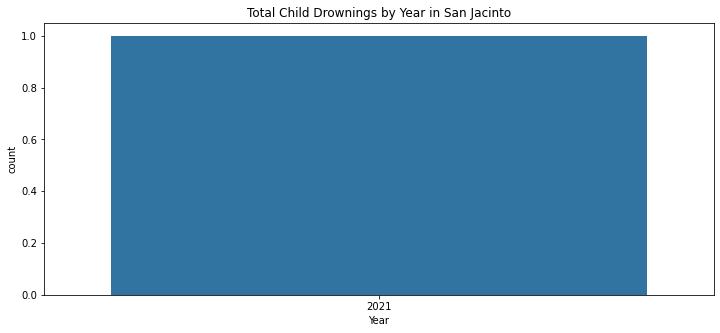

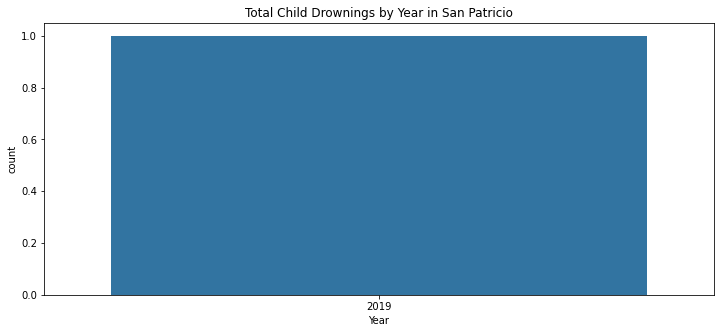

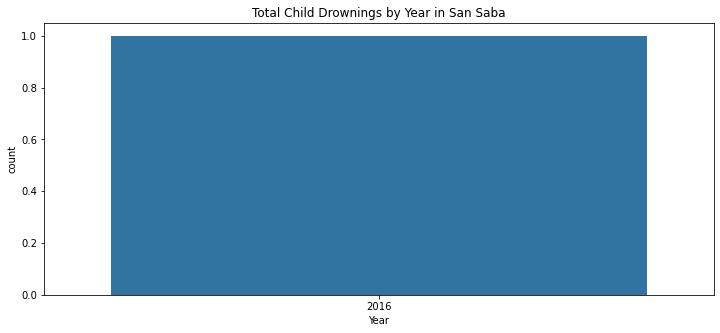

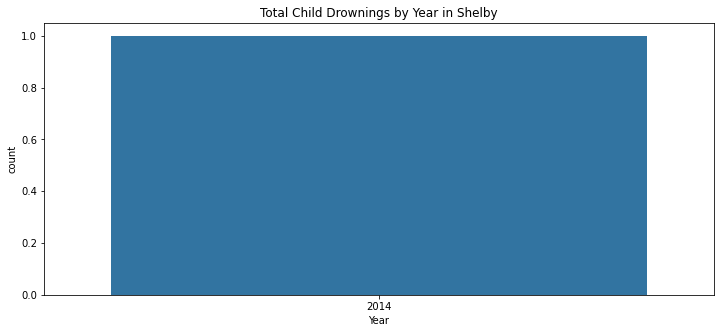

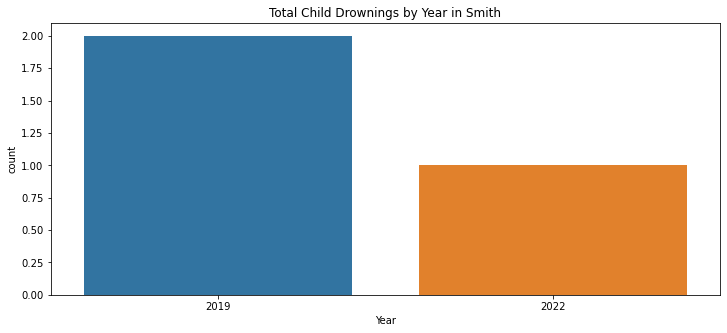

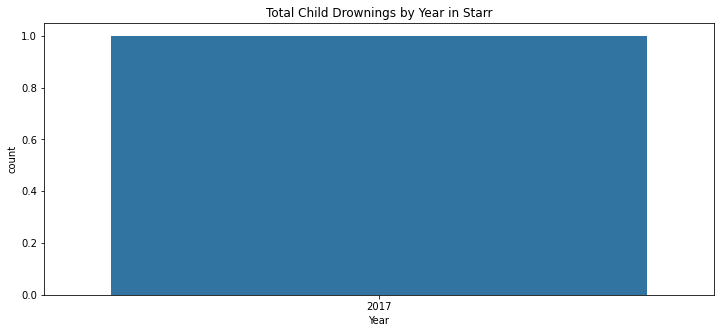

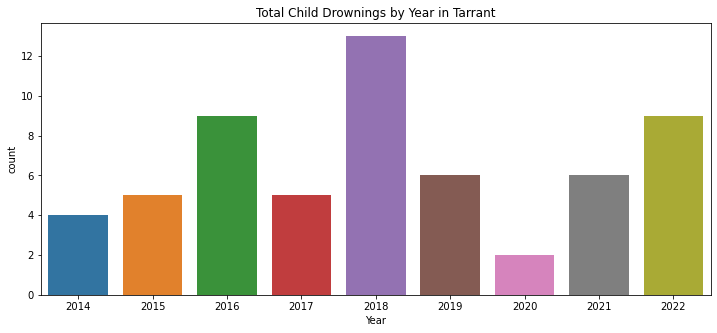

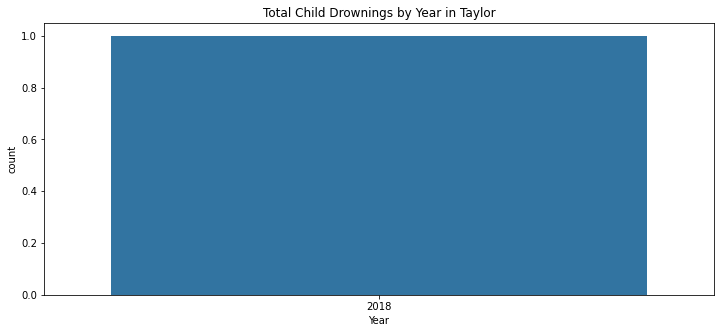

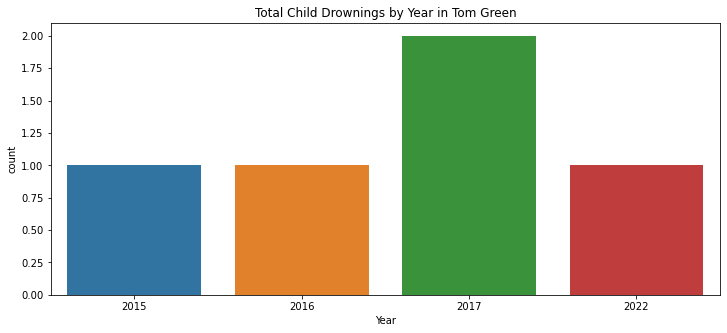

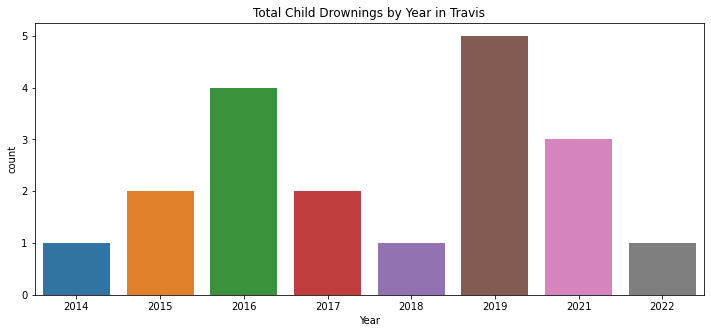

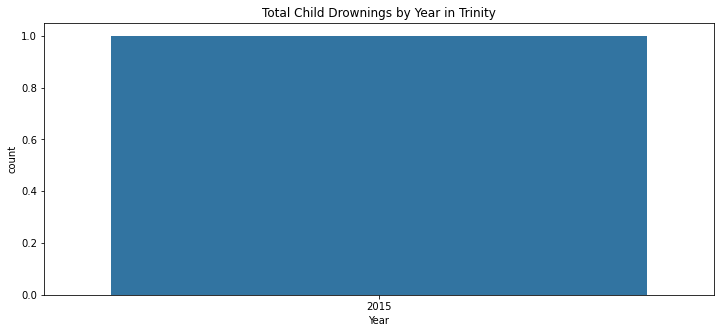

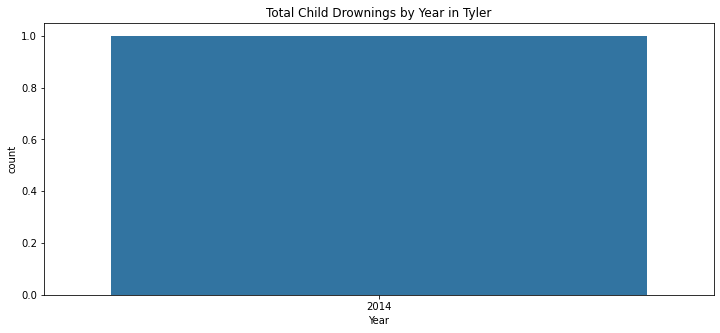

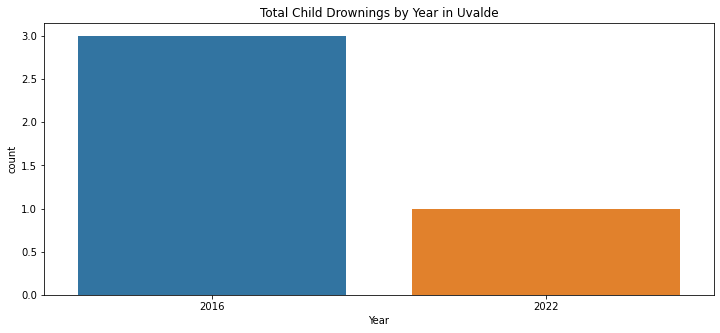

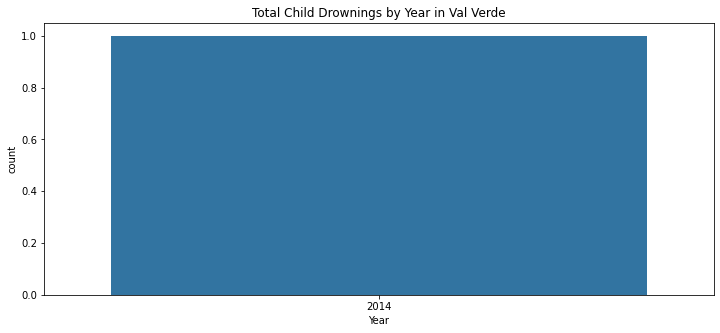

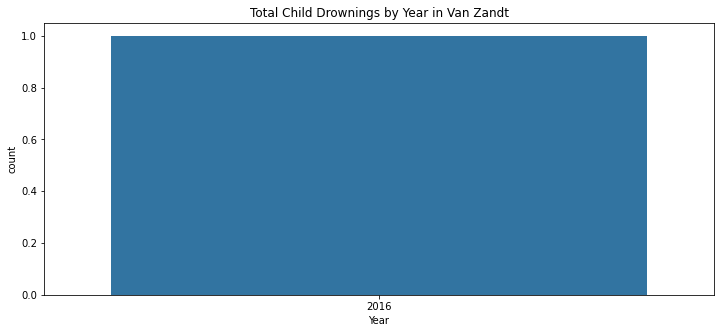

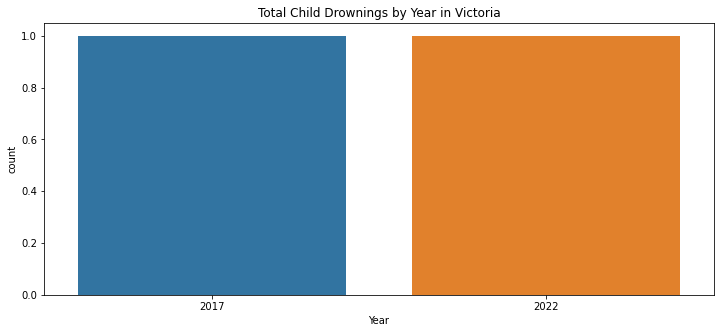

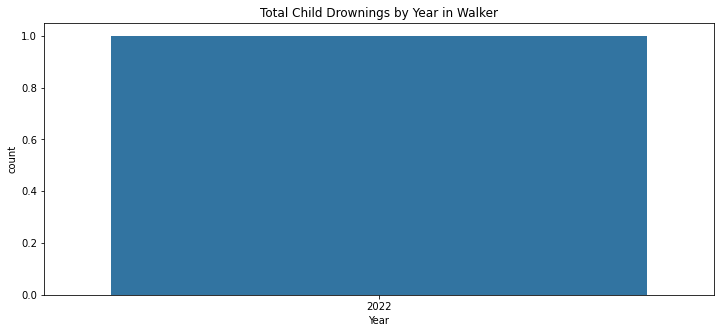

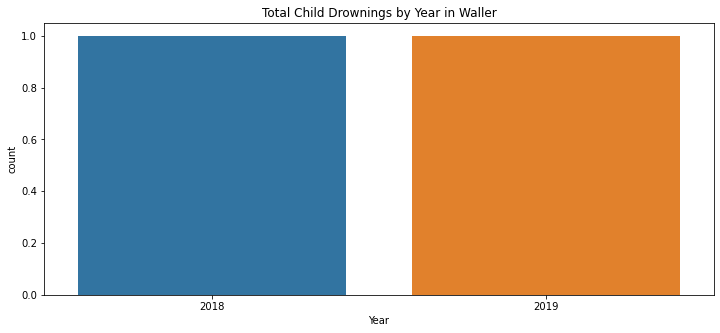

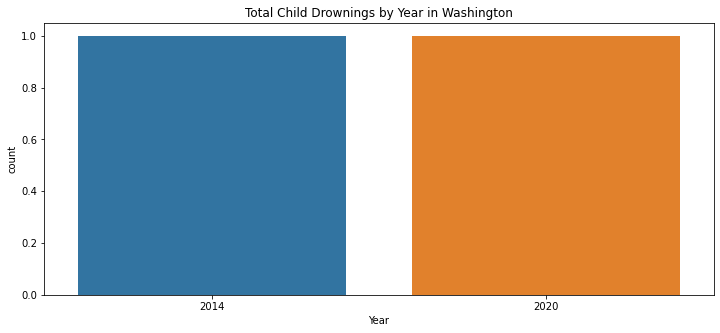

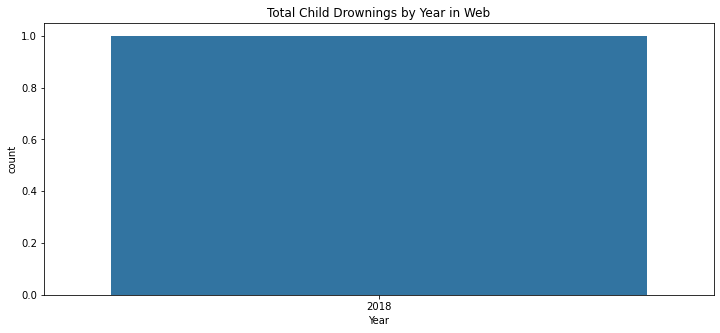

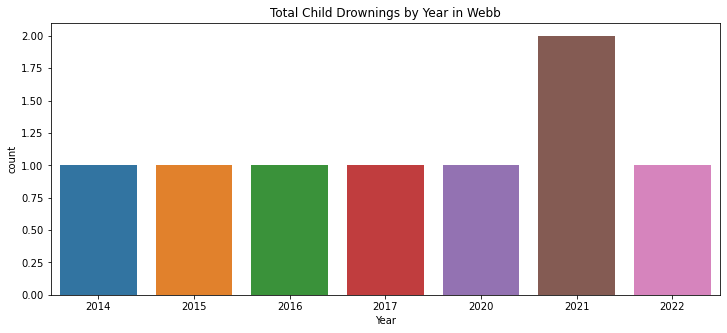

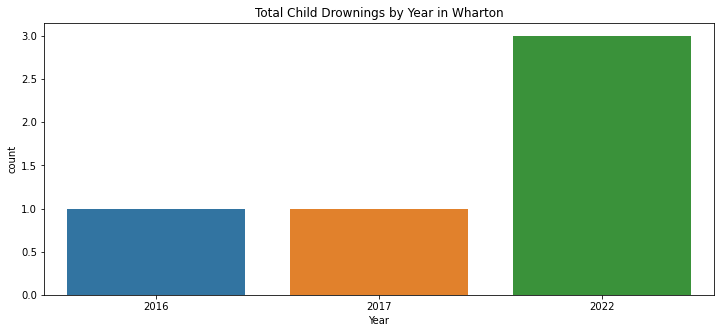

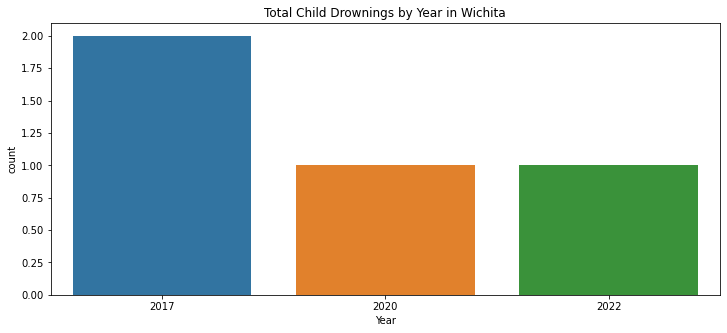

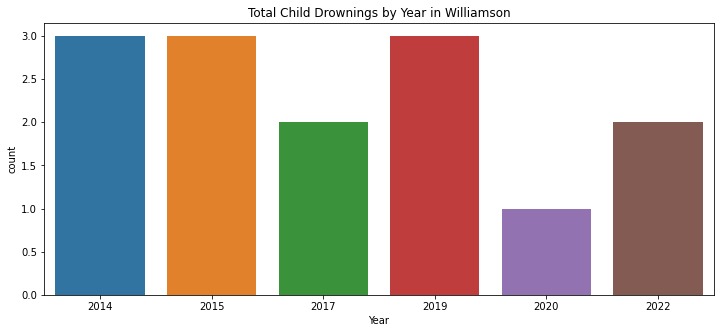

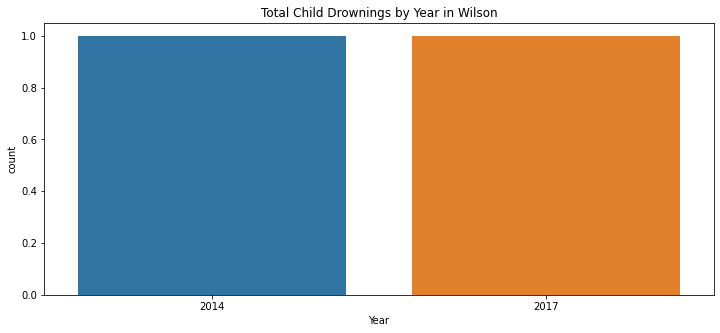

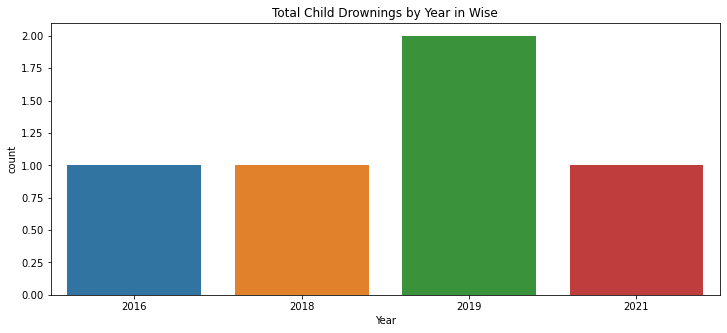

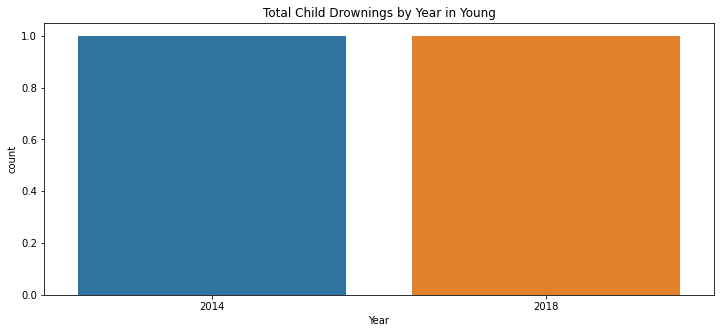

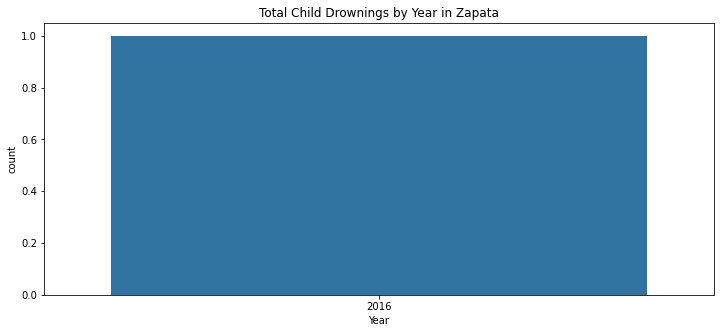

In [264]:
drownings_by_county(df)

C:\Users\aeroe\AppData\Local\Temp/ipykernel_30500/4124983259.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(12,5))


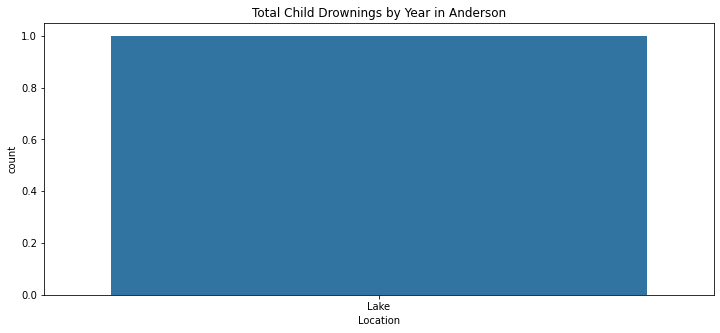

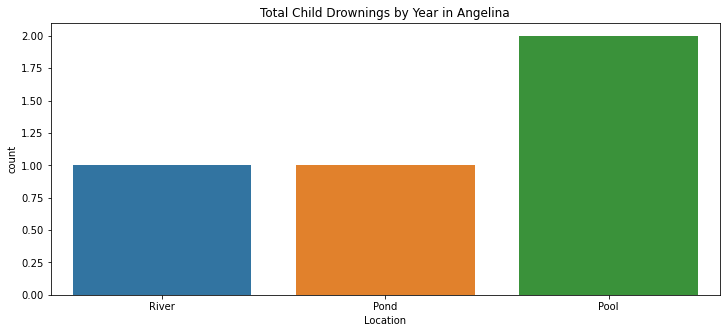

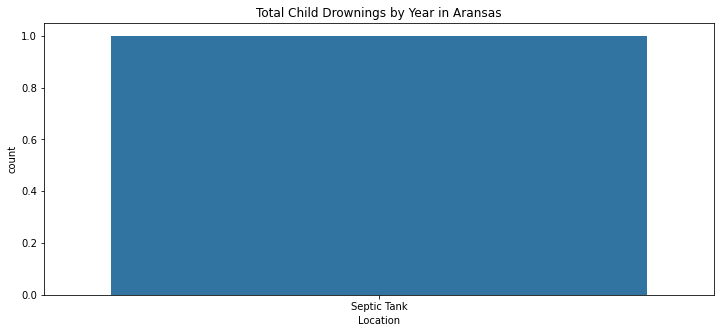

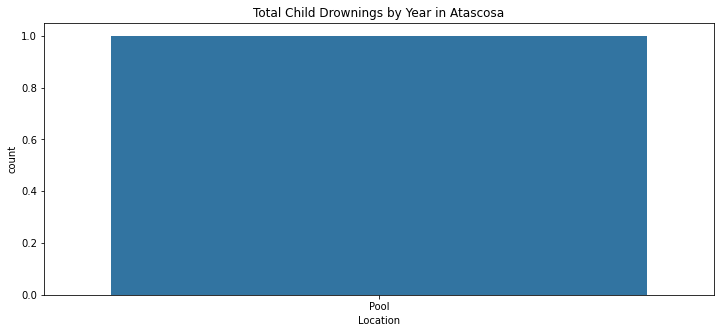

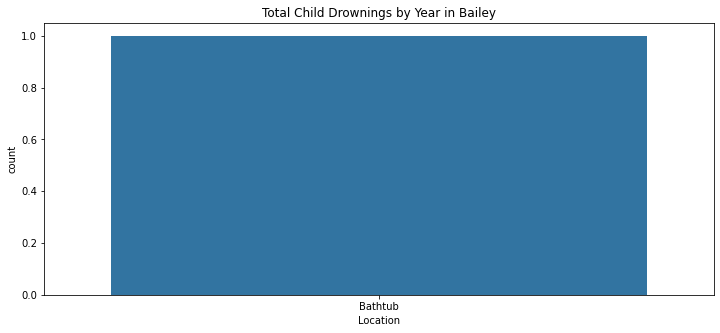

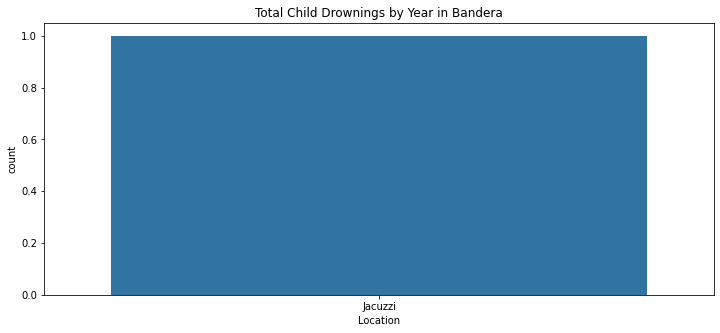

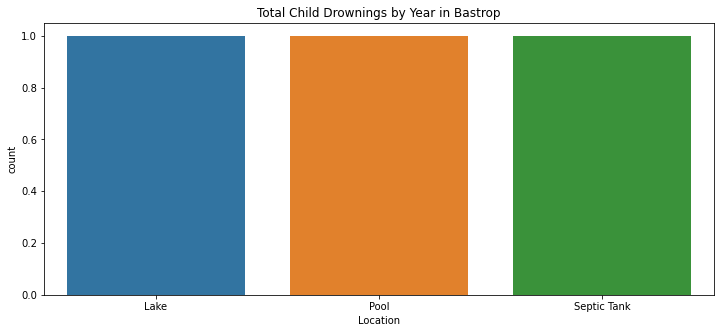

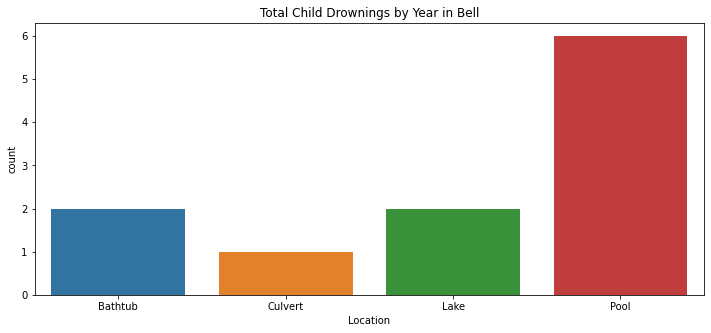

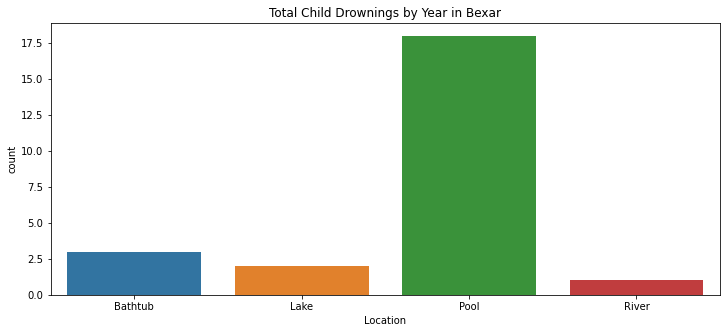

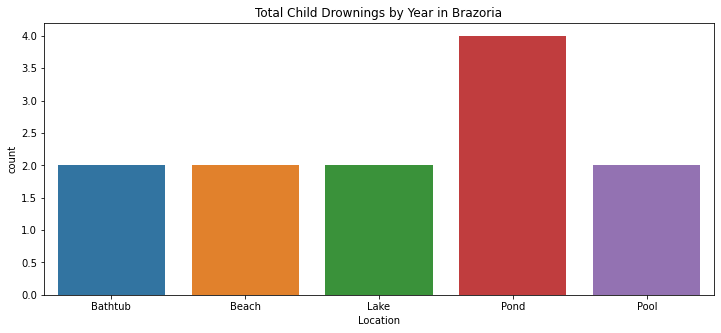

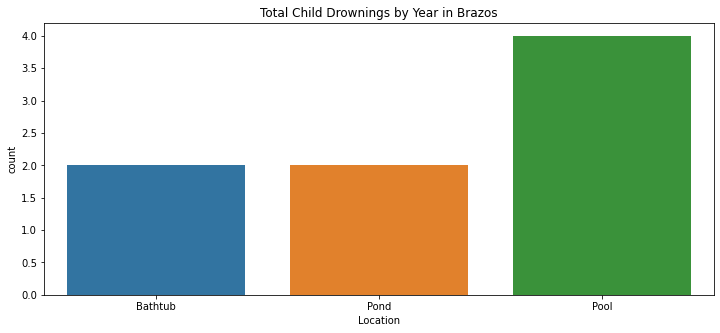

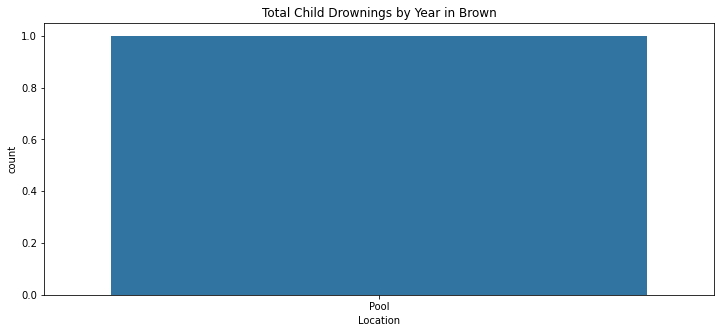

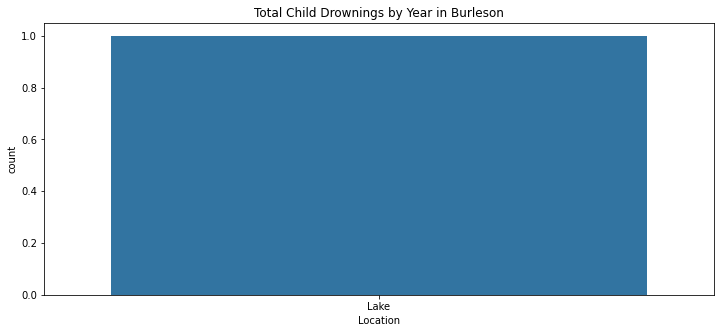

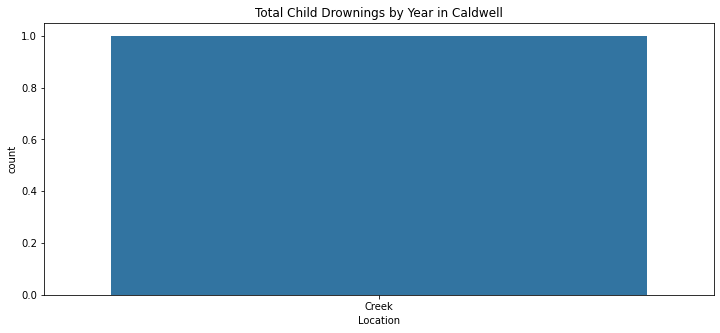

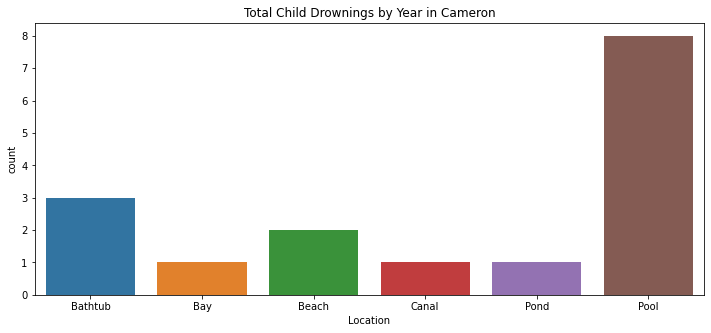

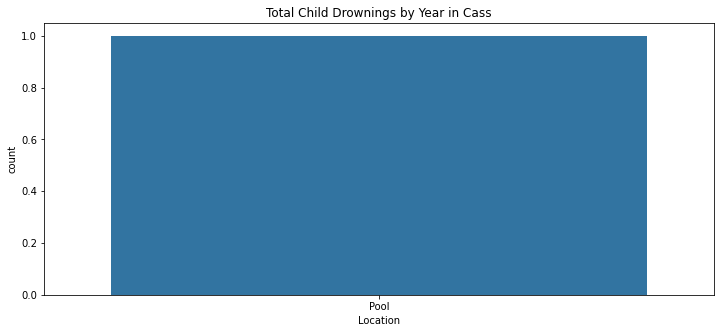

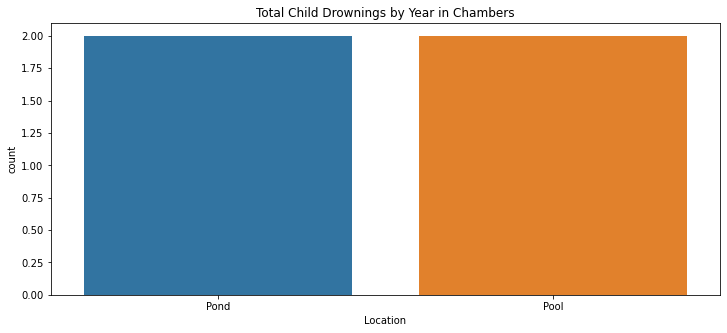

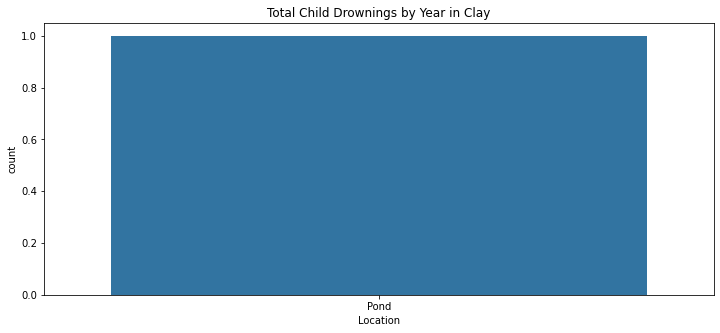

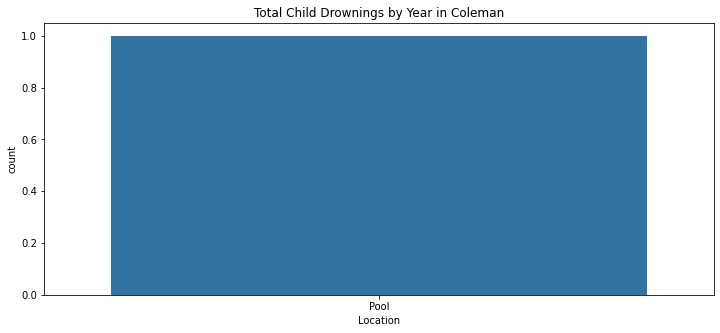

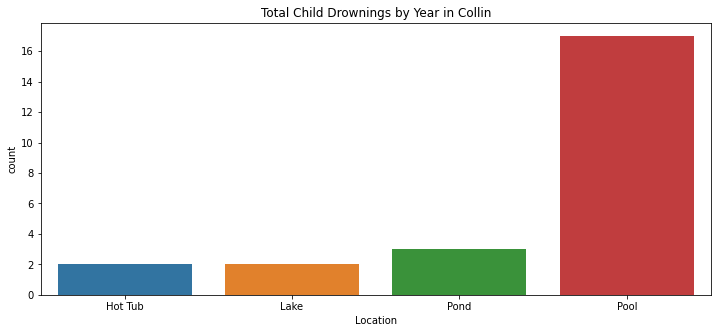

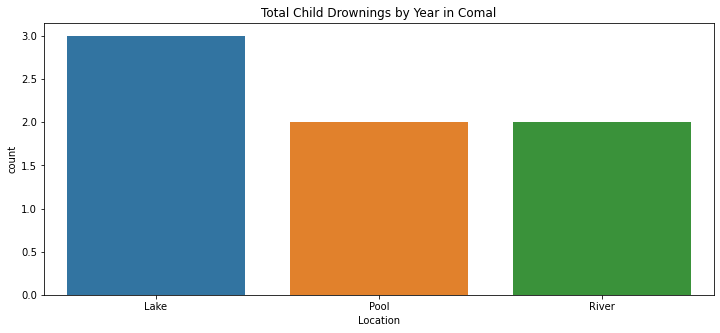

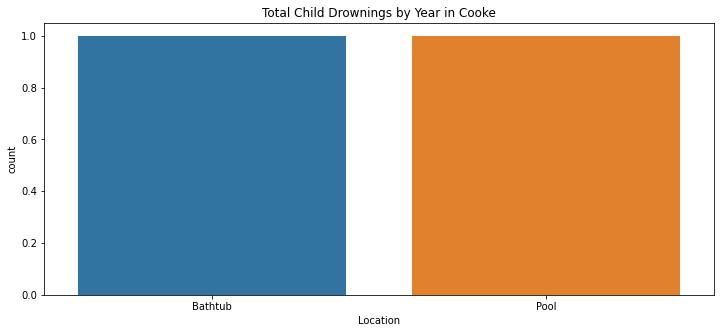

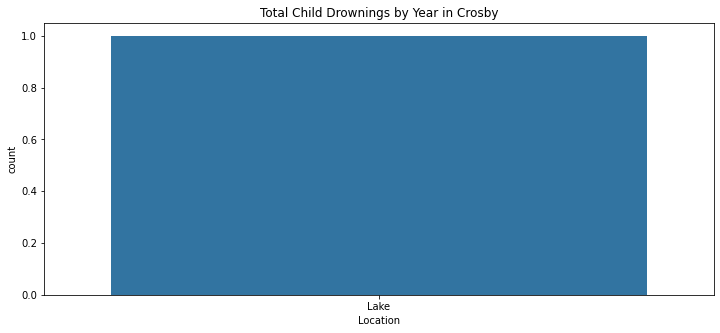

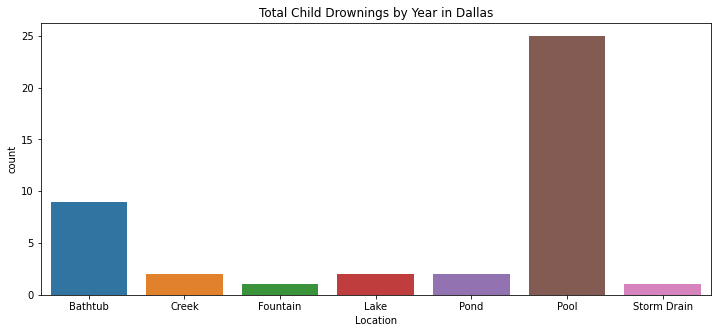

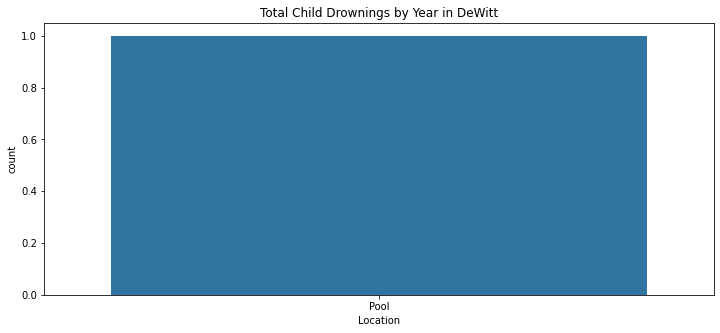

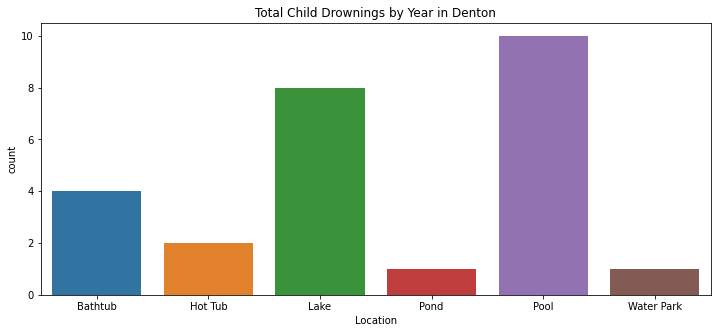

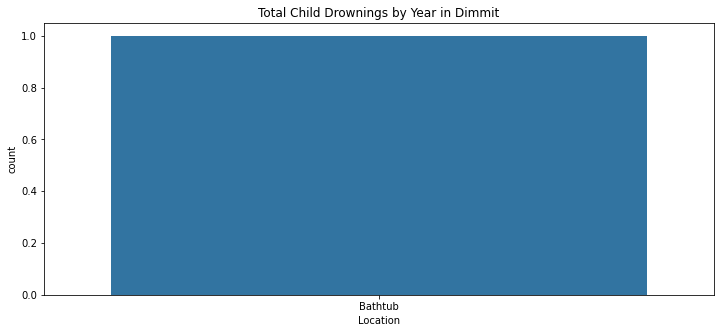

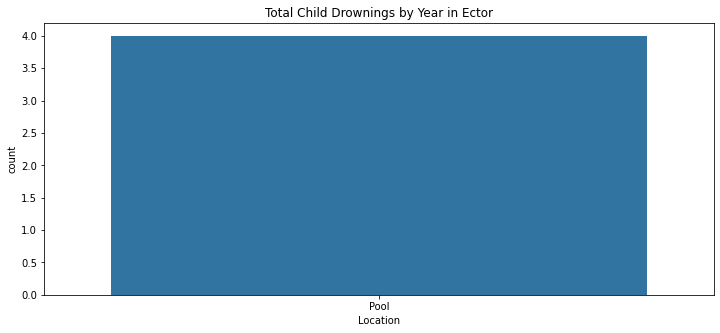

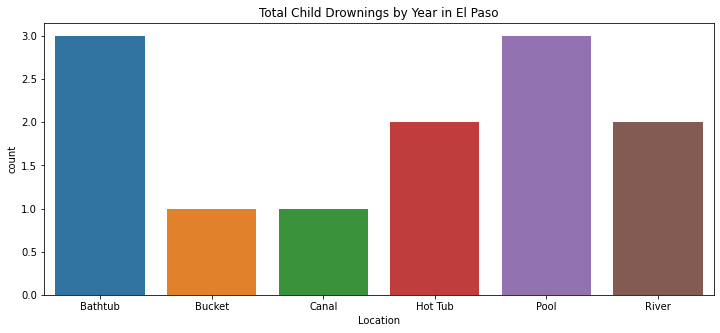

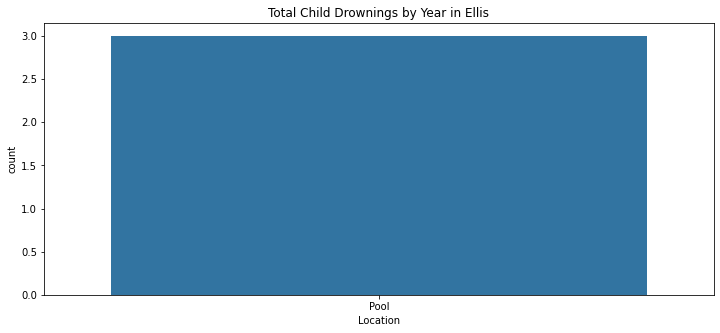

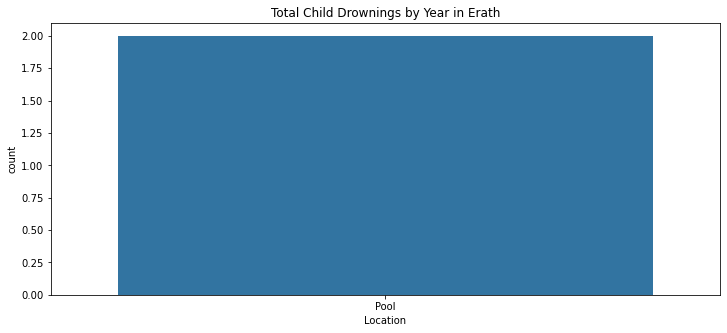

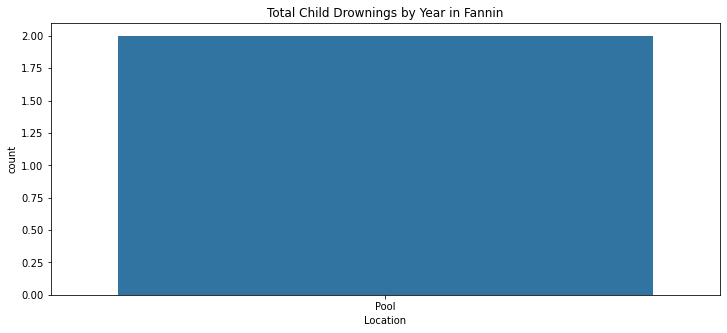

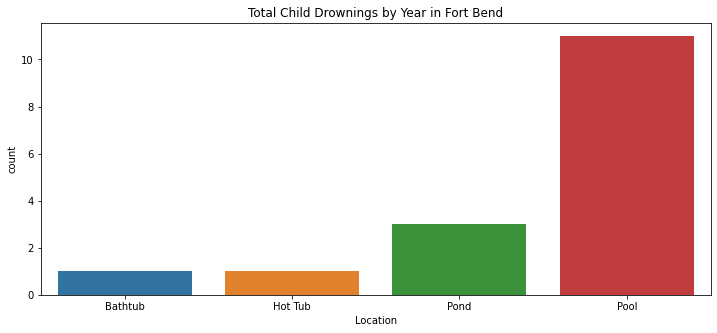

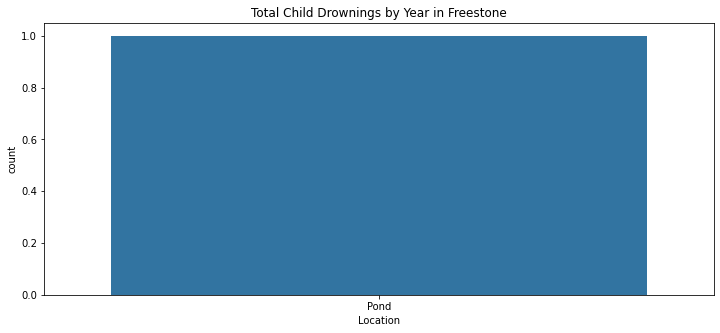

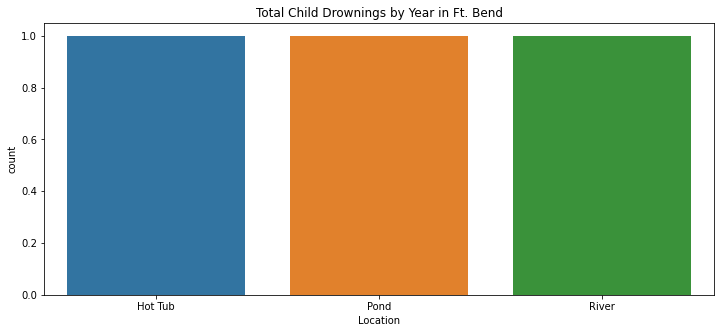

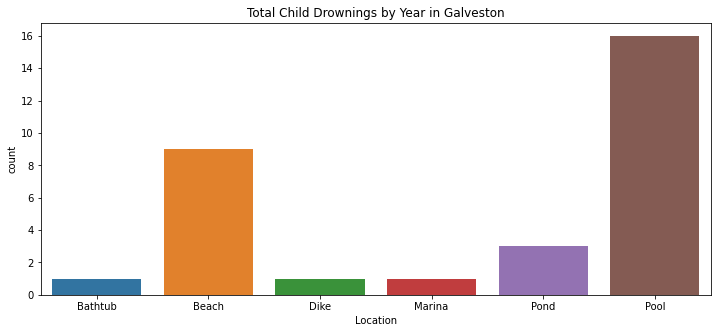

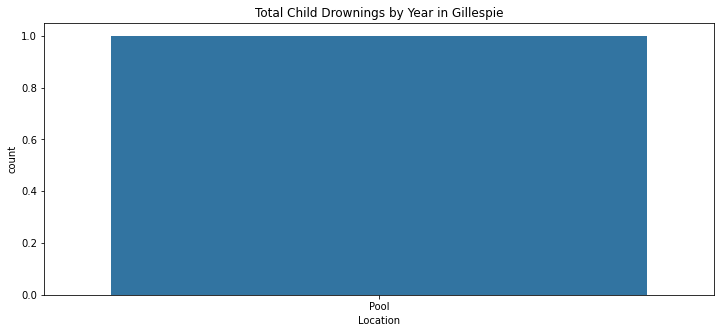

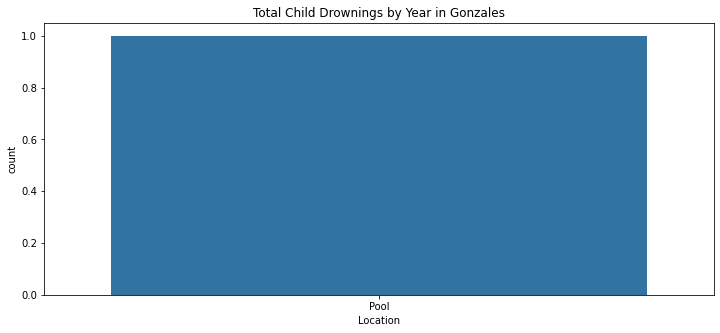

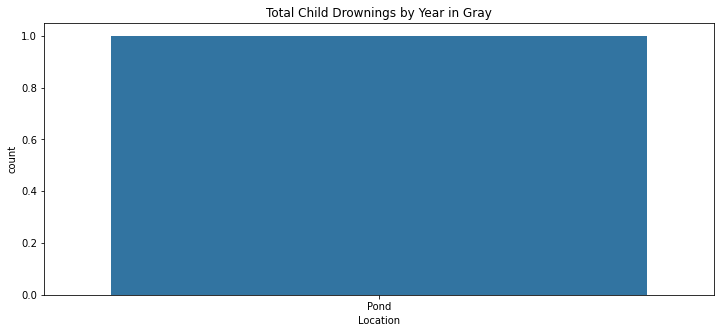

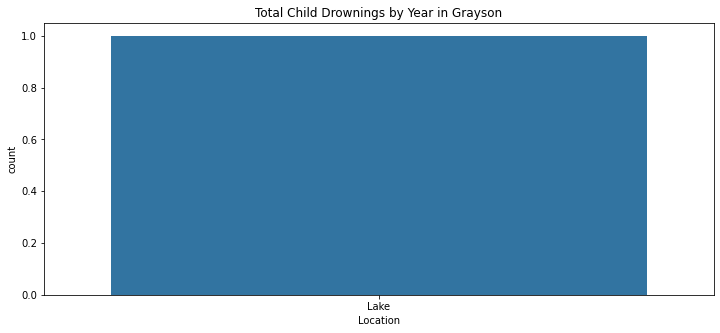

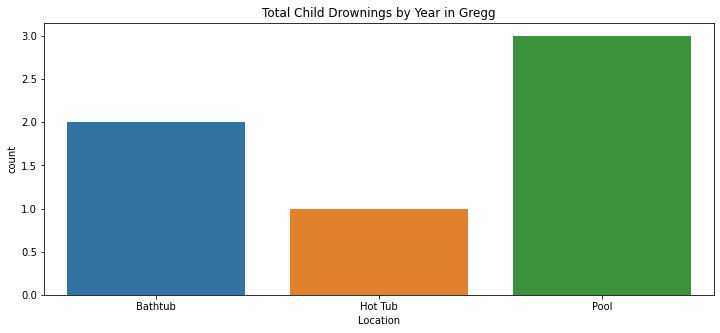

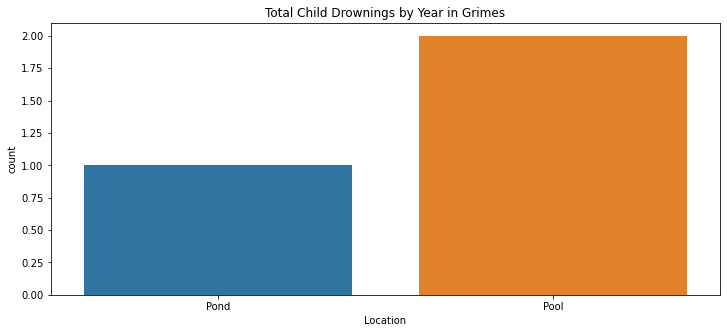

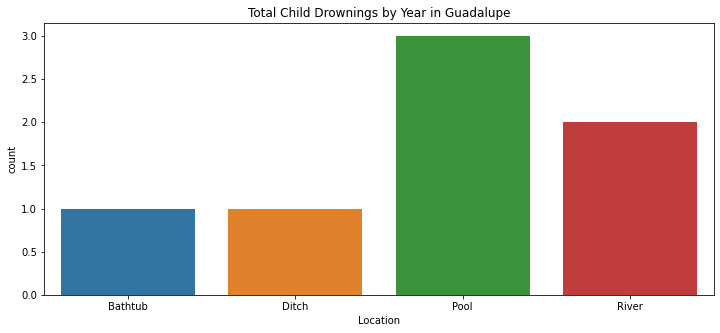

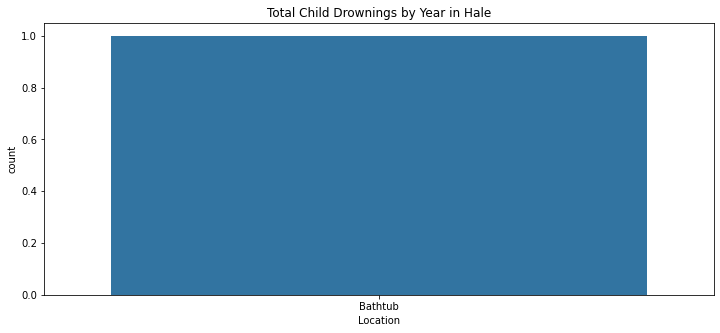

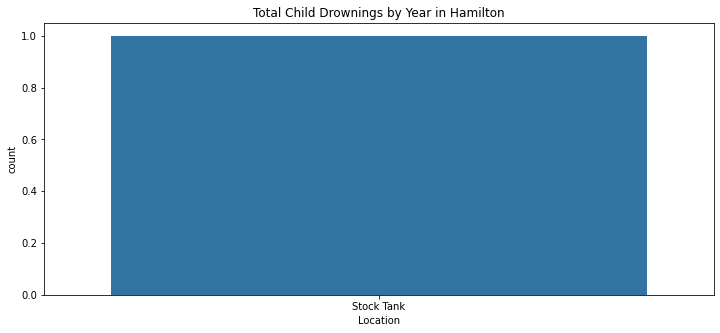

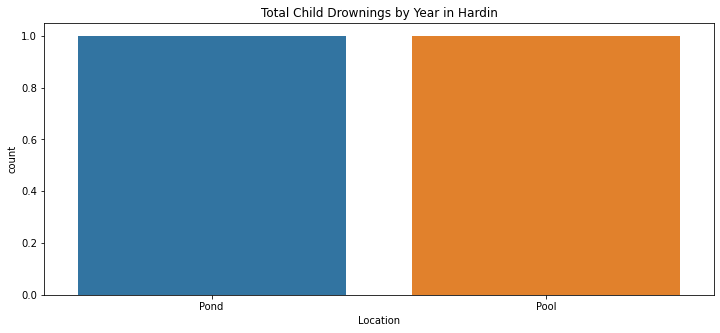

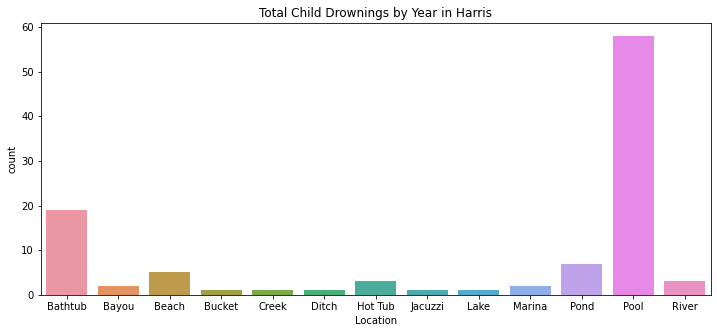

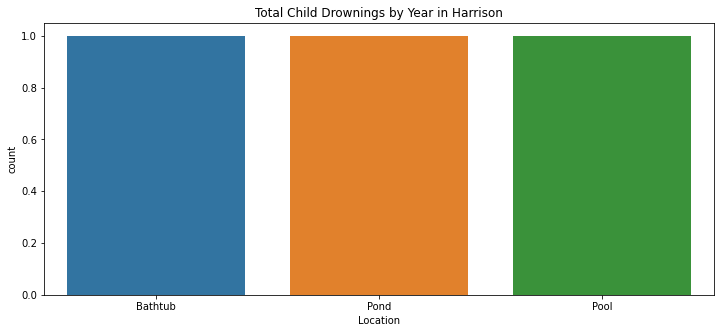

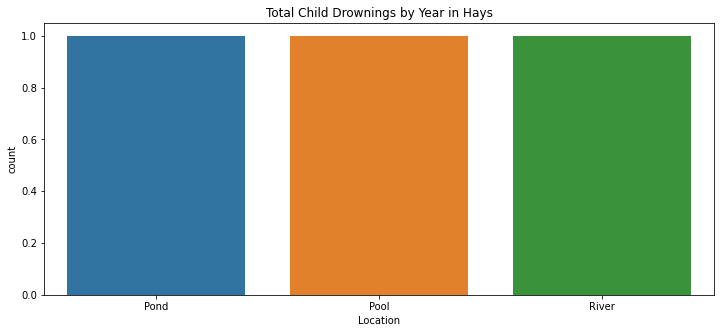

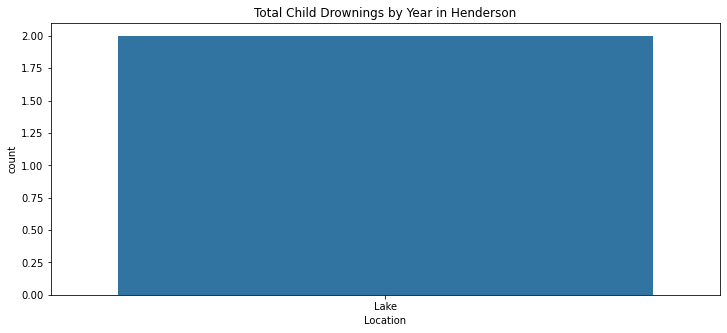

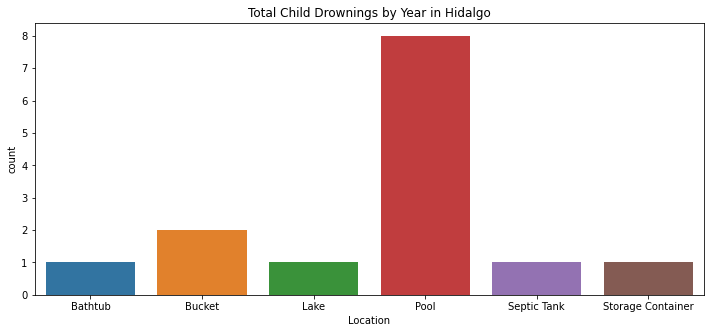

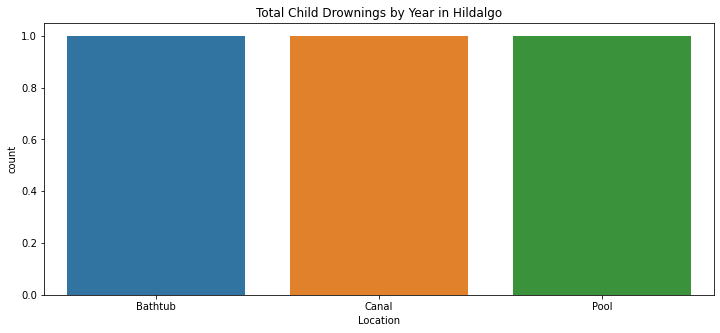

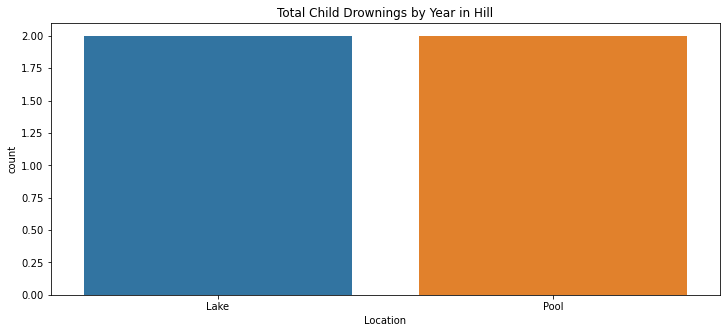

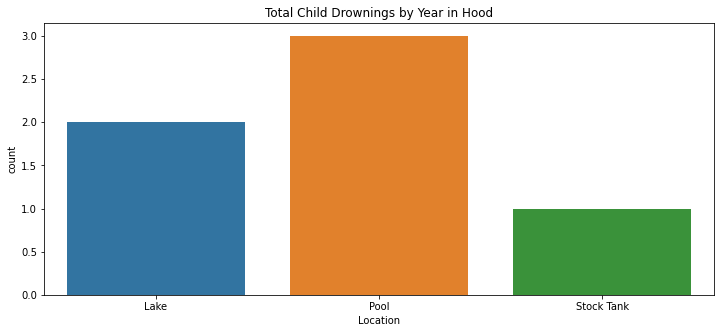

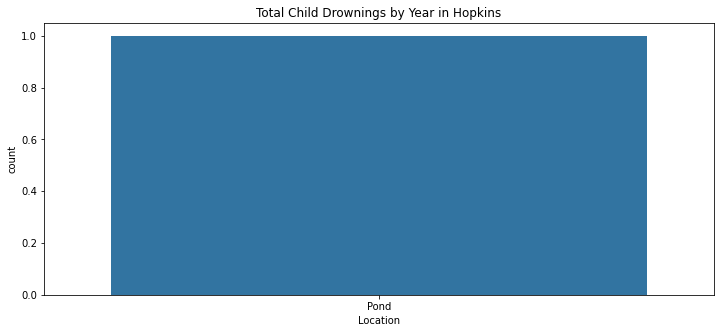

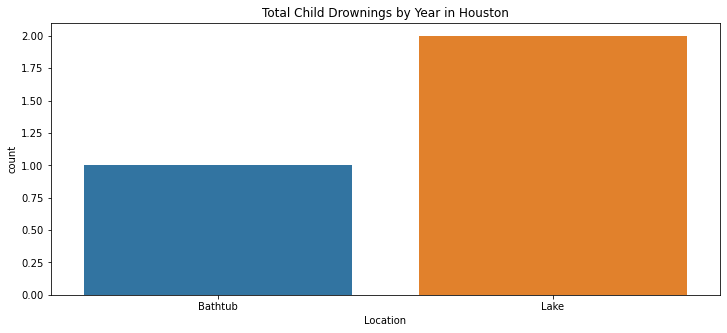

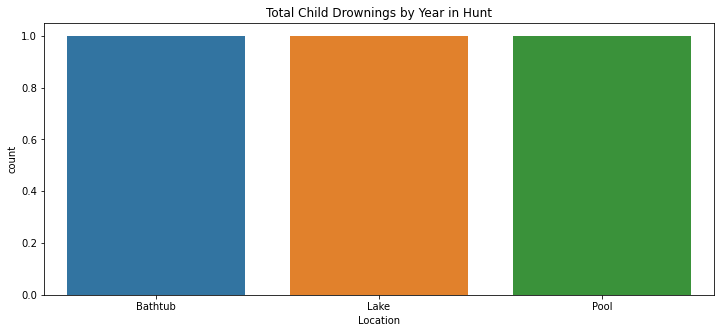

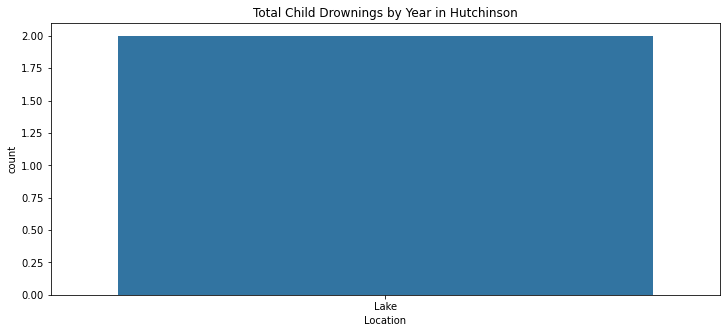

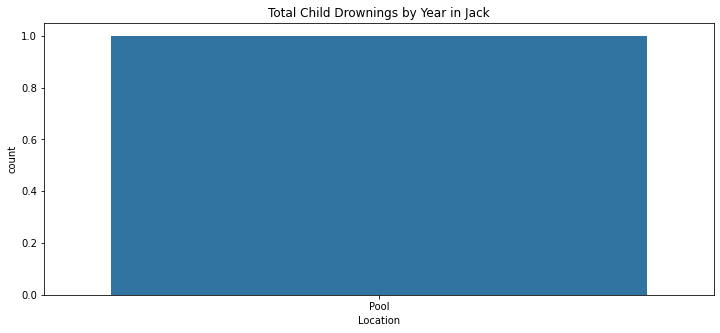

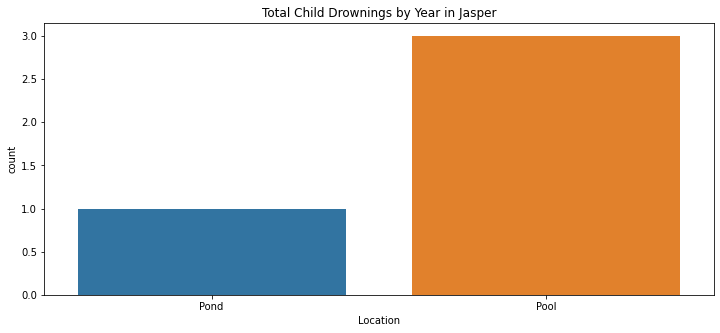

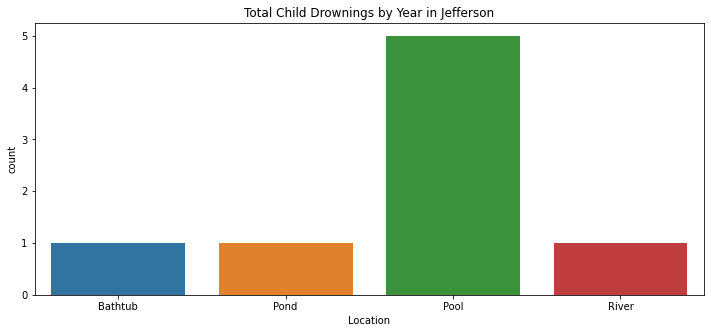

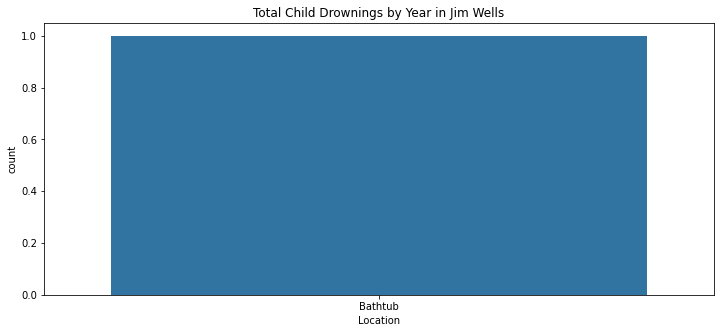

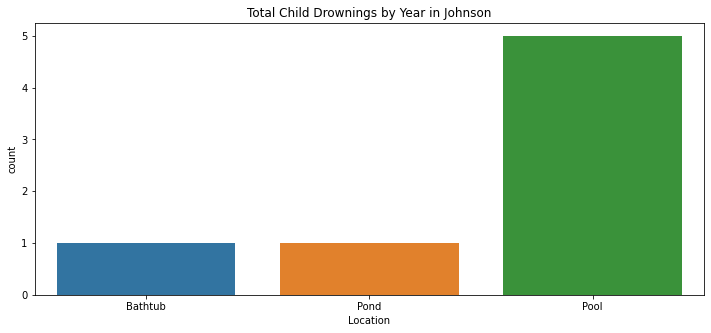

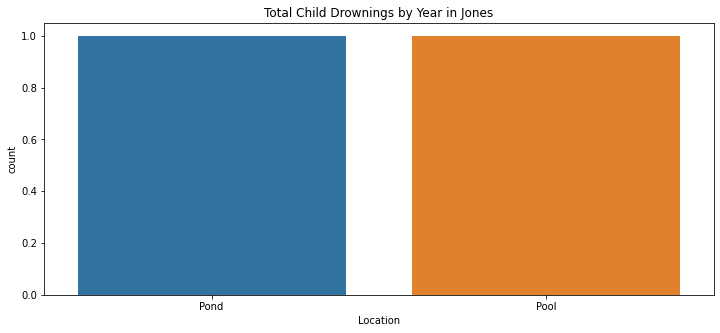

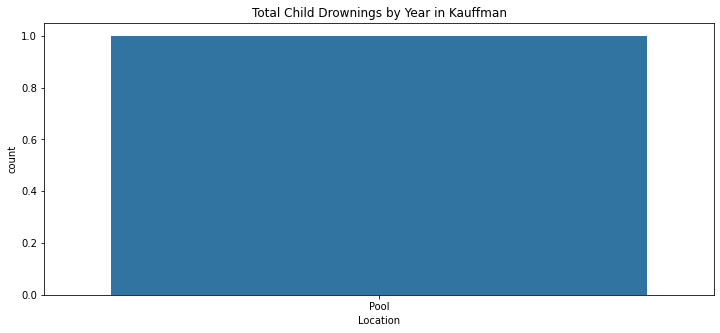

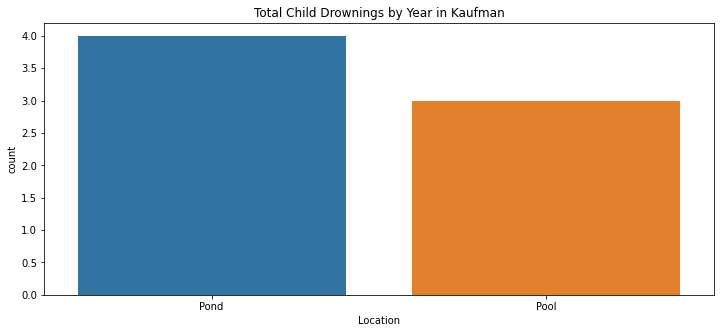

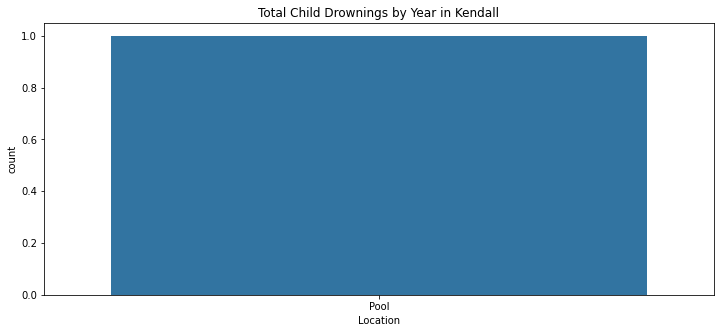

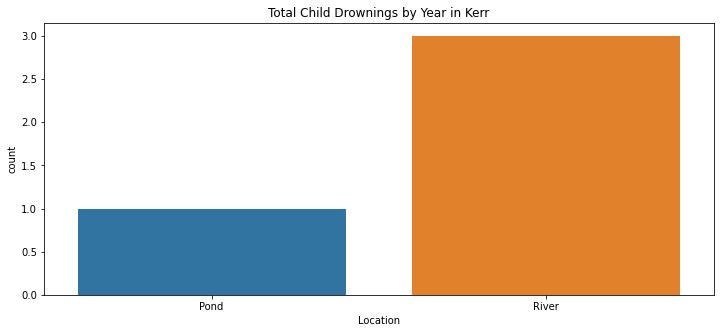

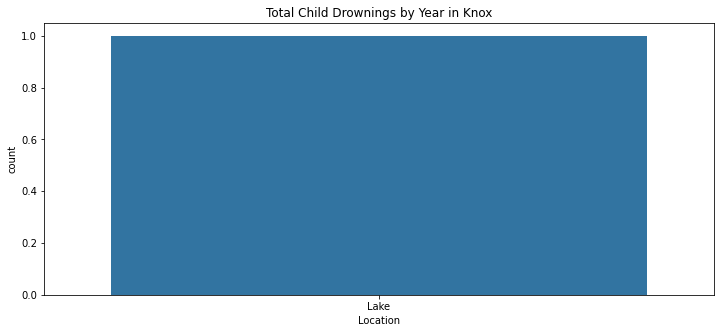

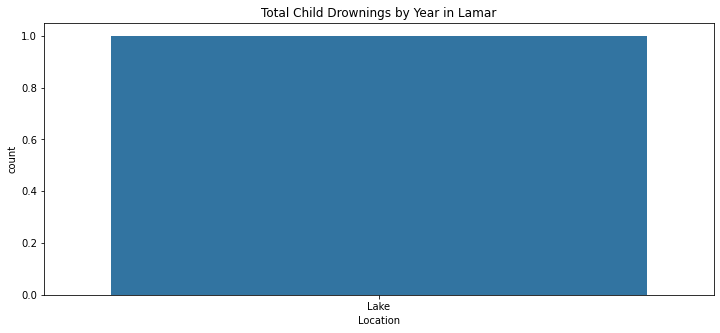

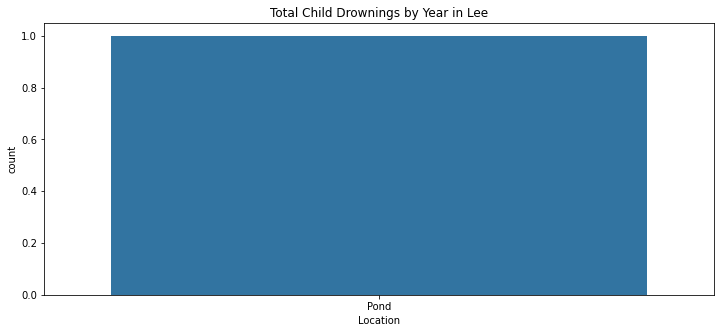

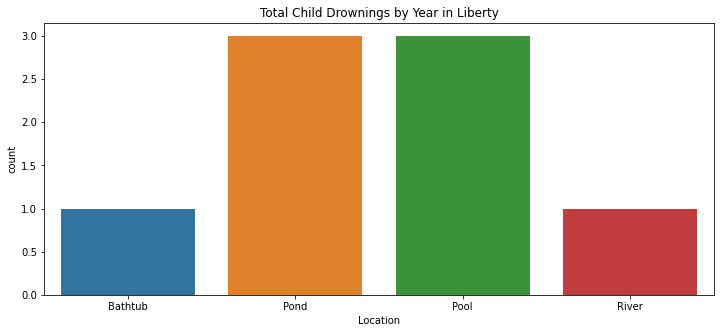

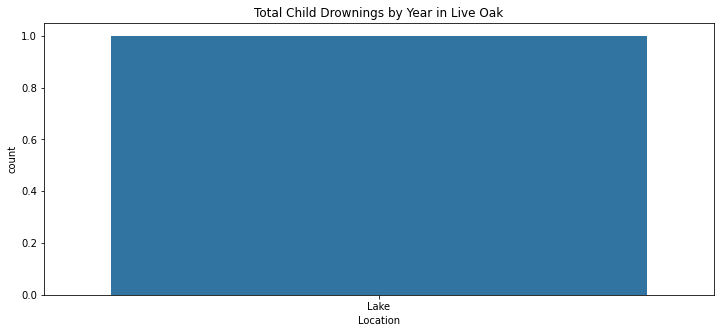

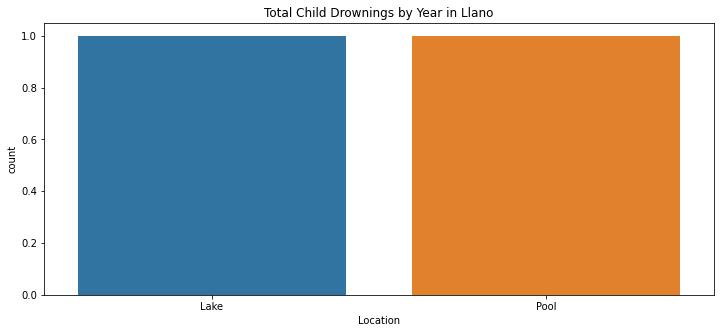

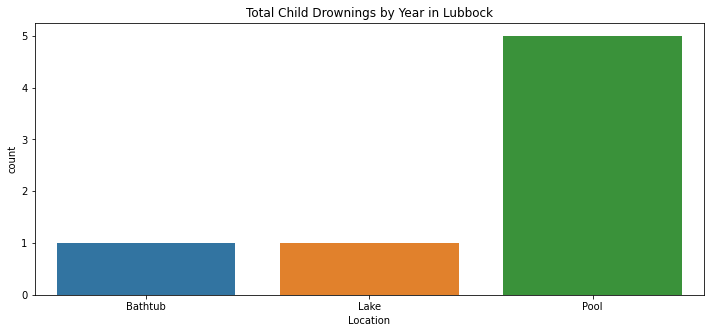

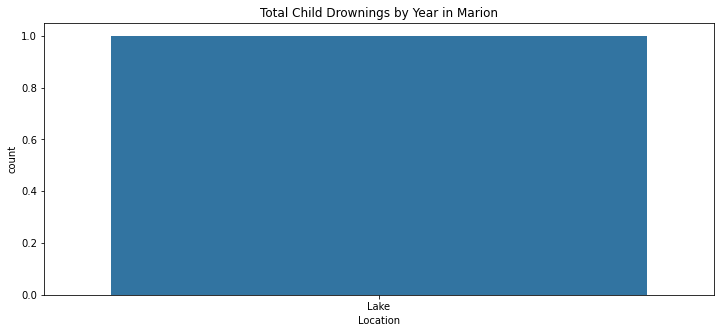

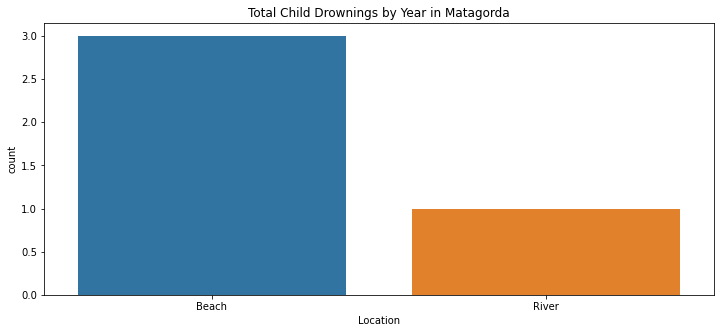

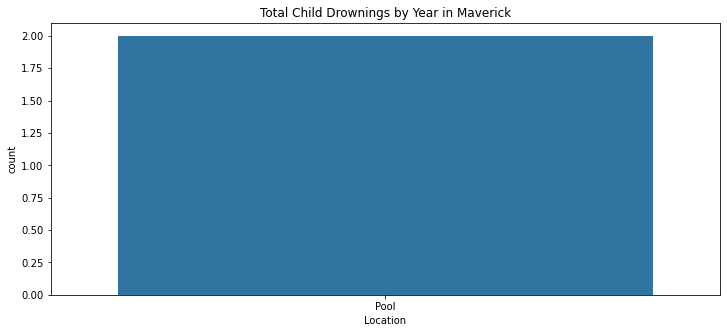

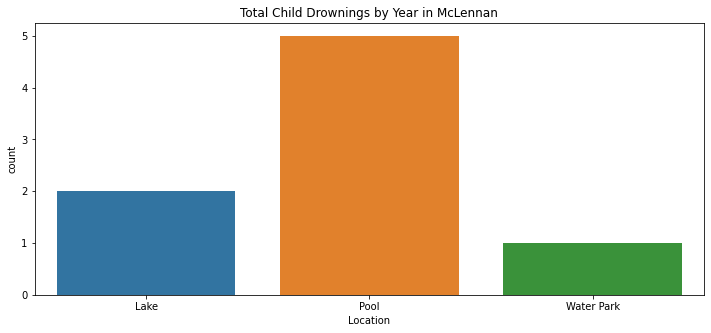

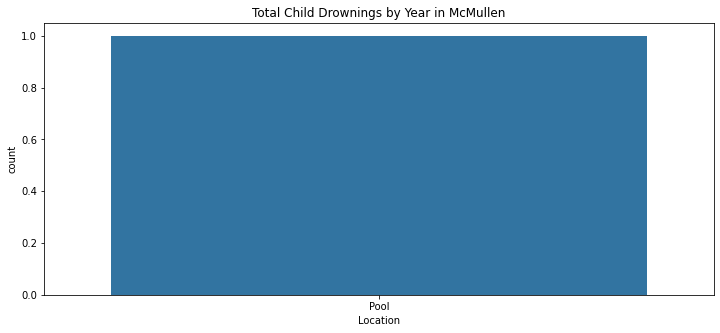

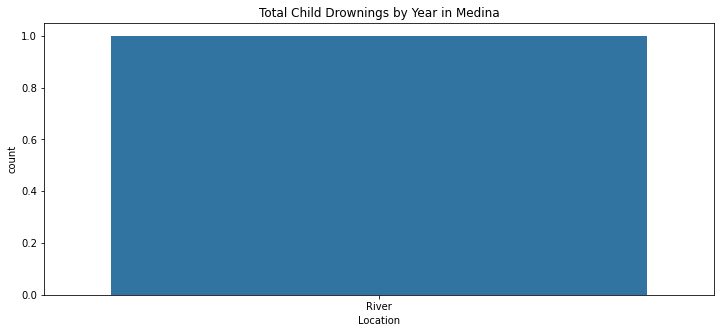

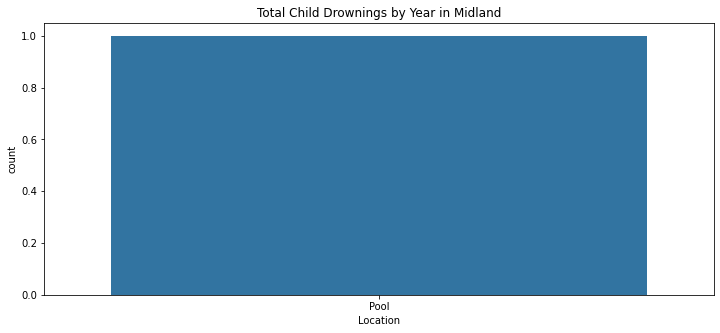

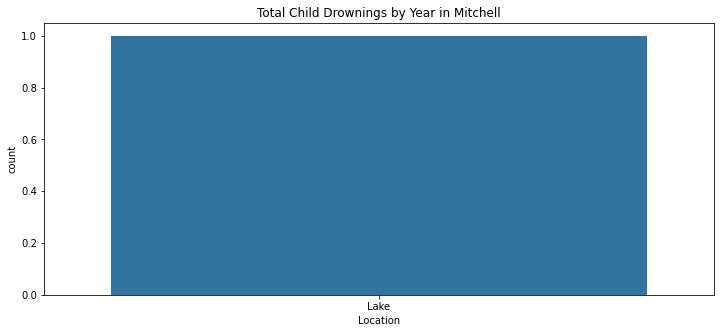

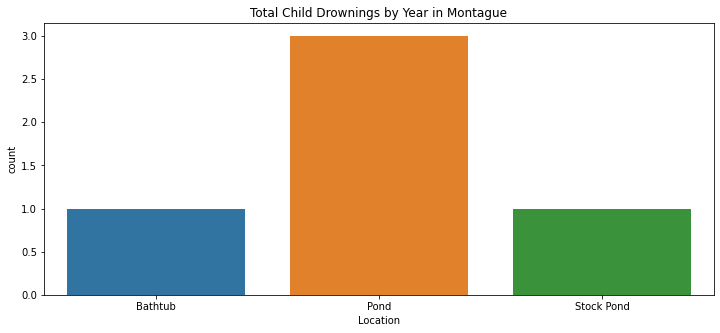

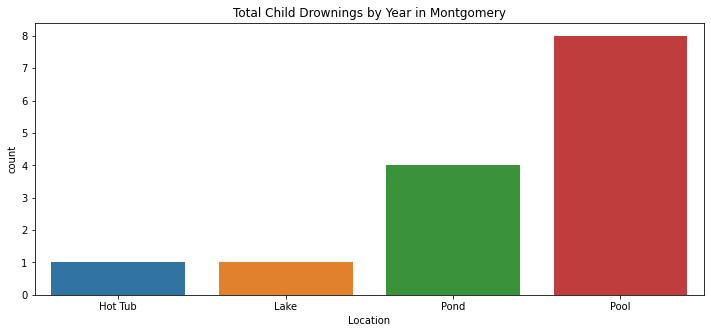

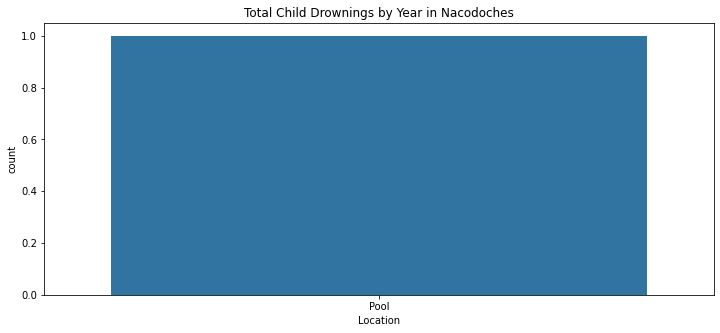

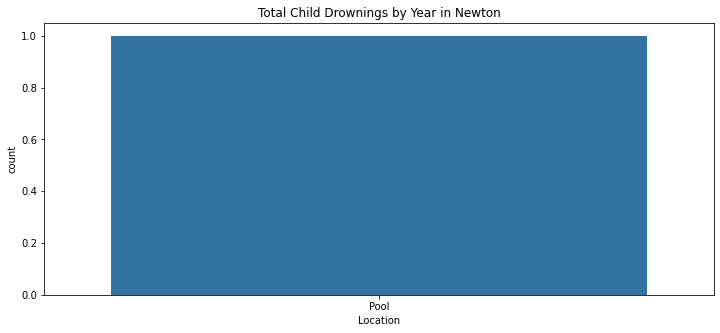

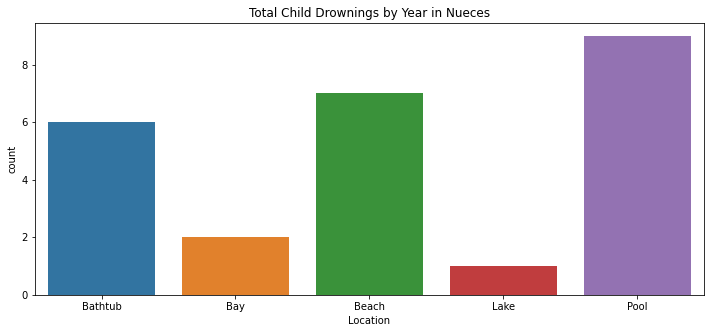

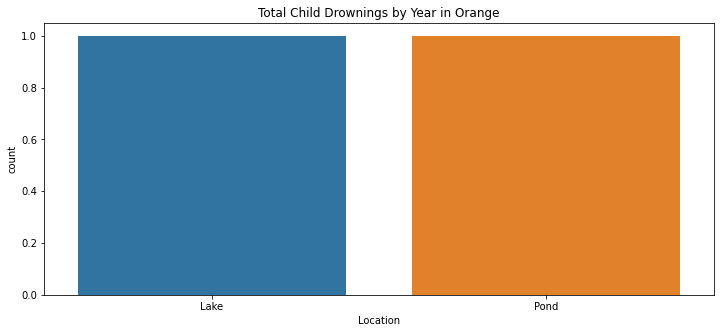

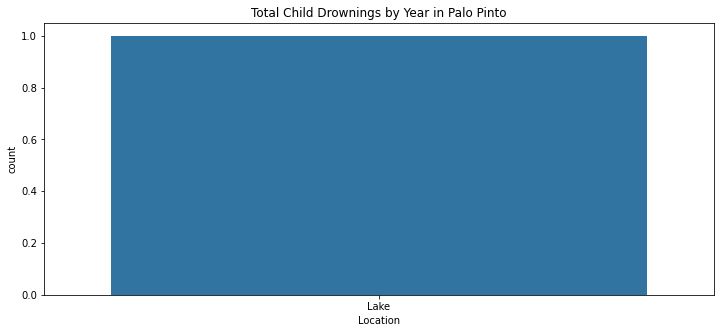

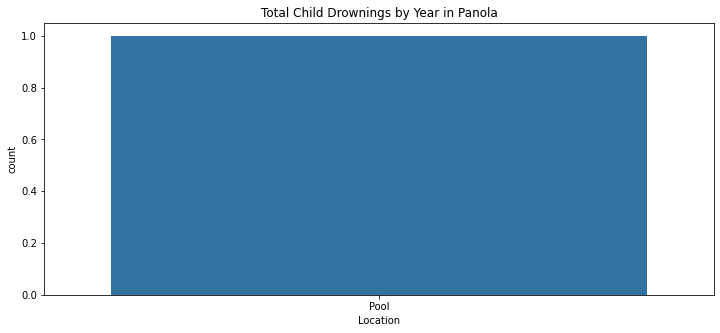

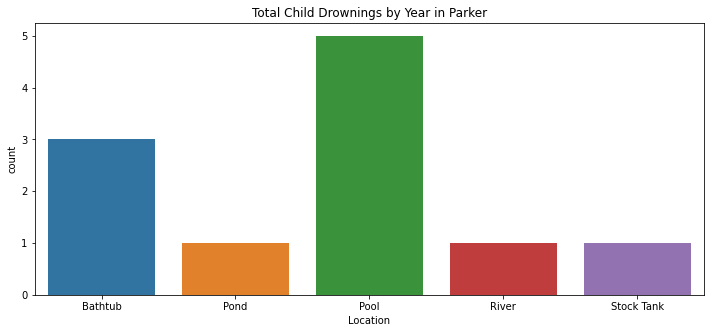

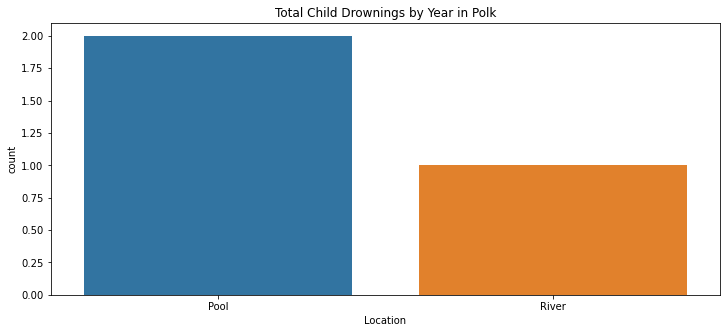

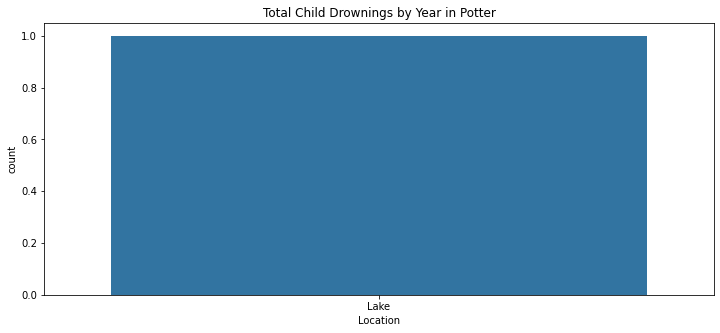

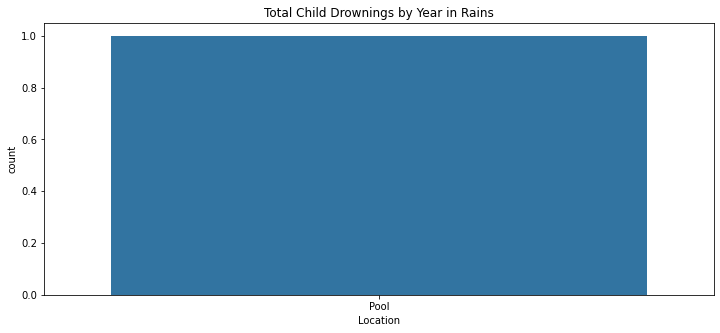

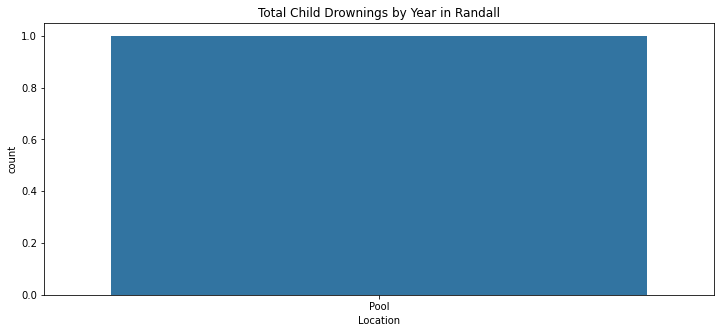

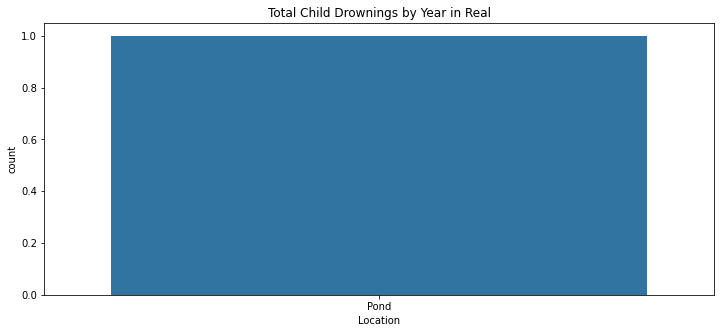

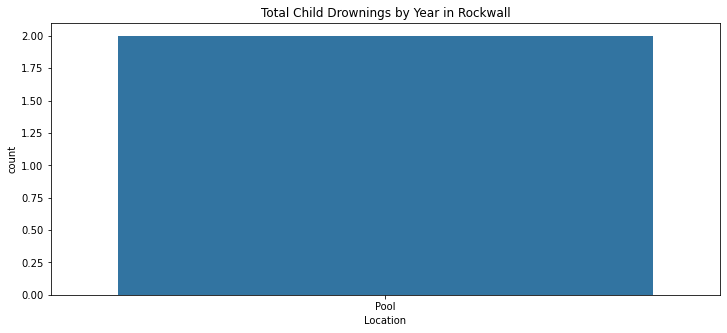

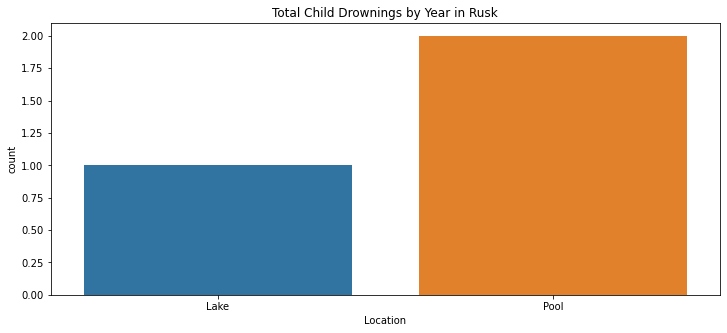

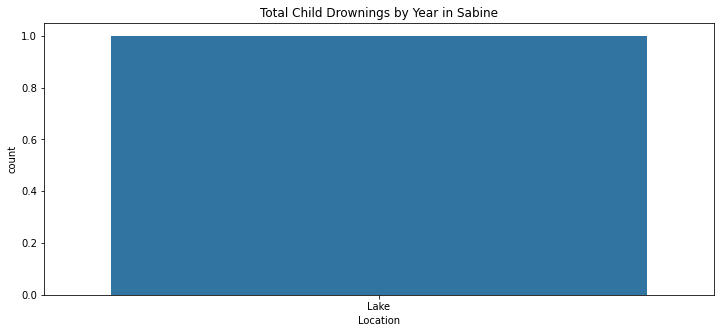

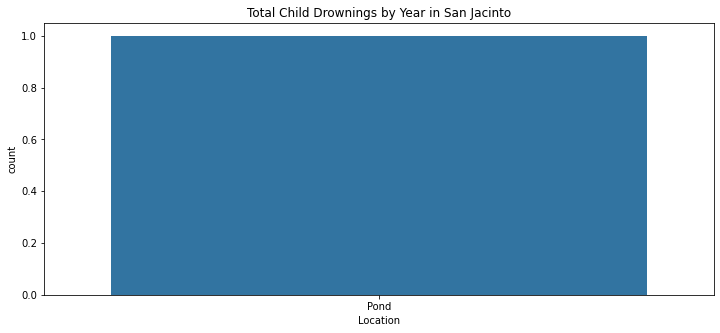

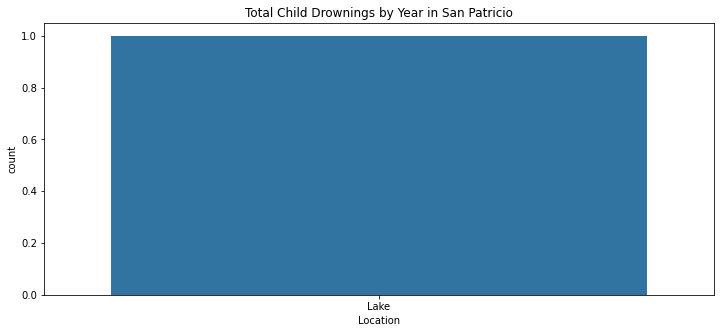

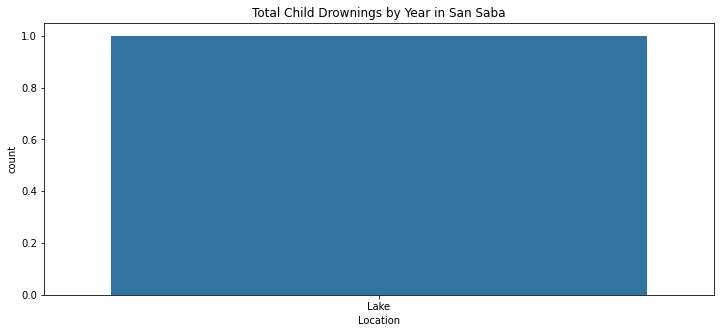

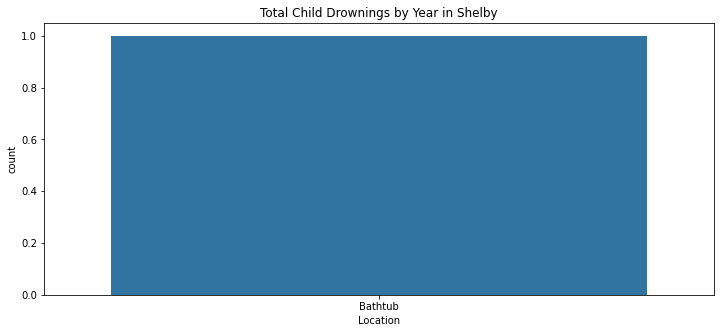

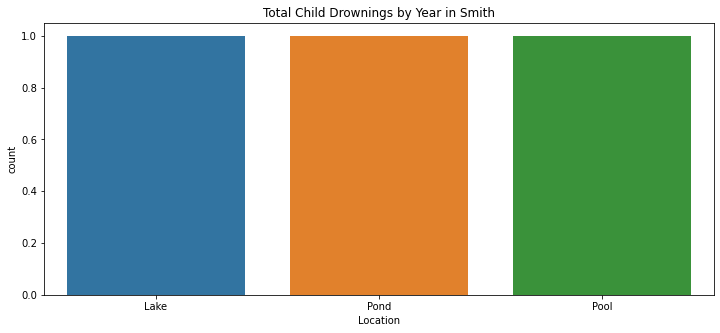

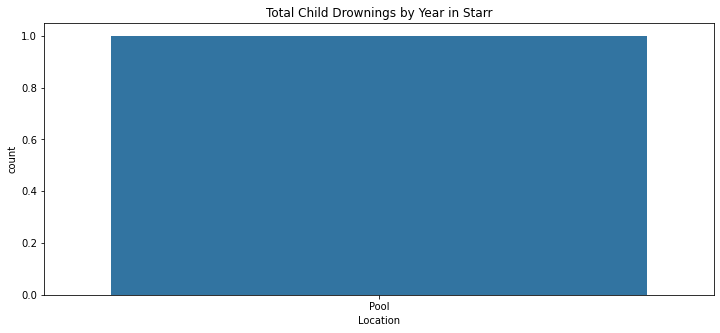

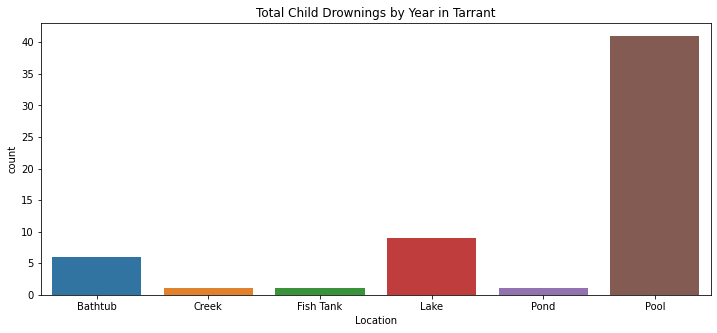

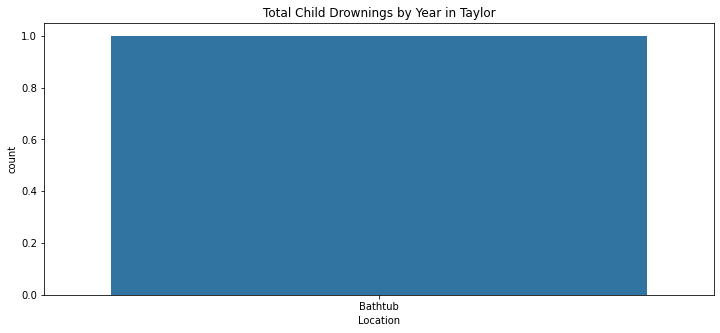

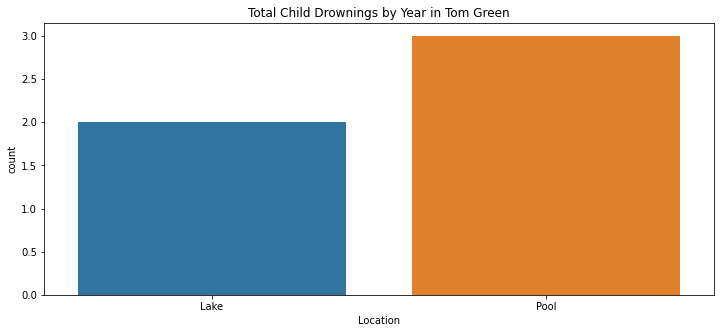

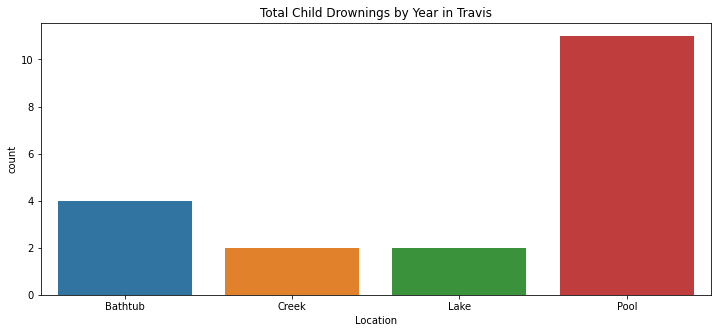

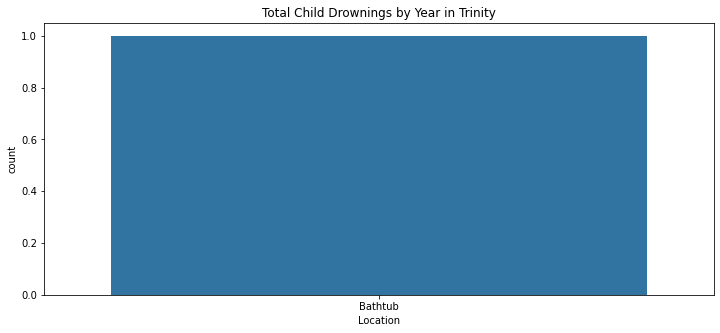

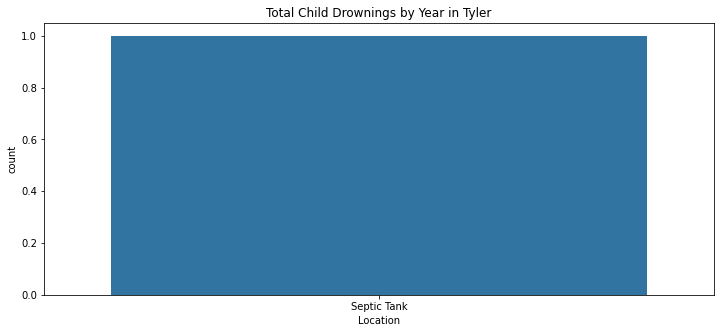

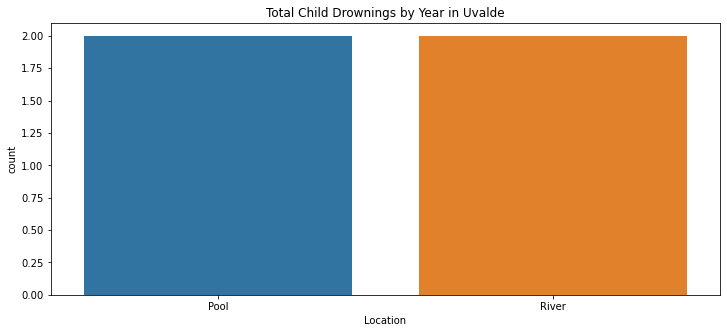

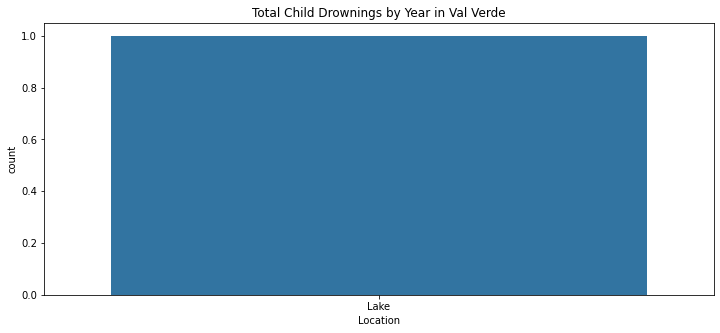

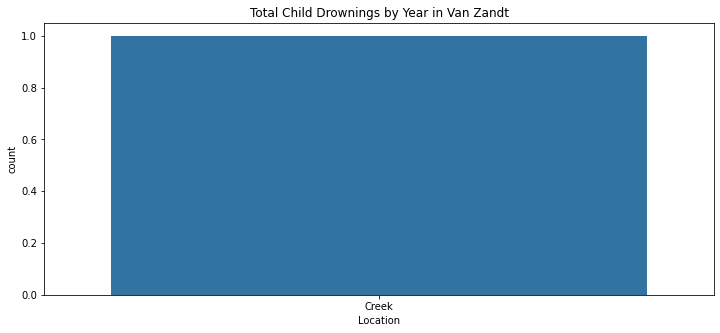

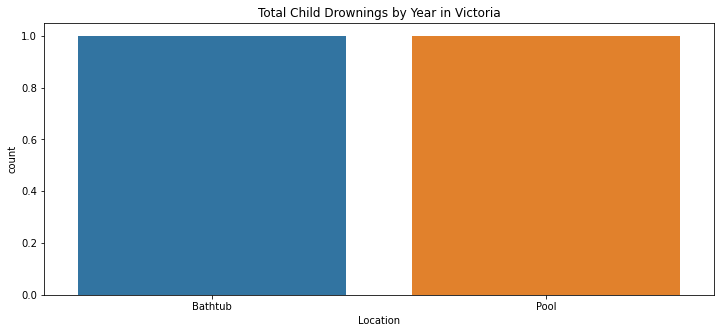

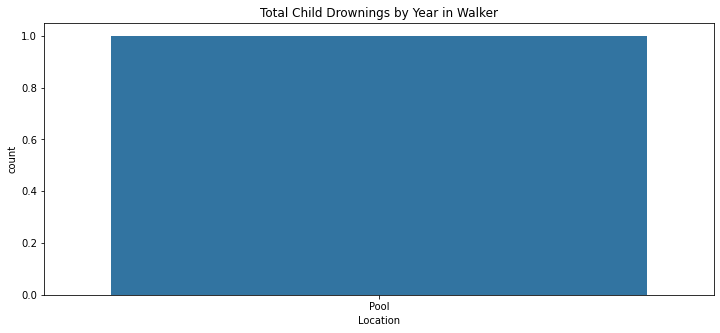

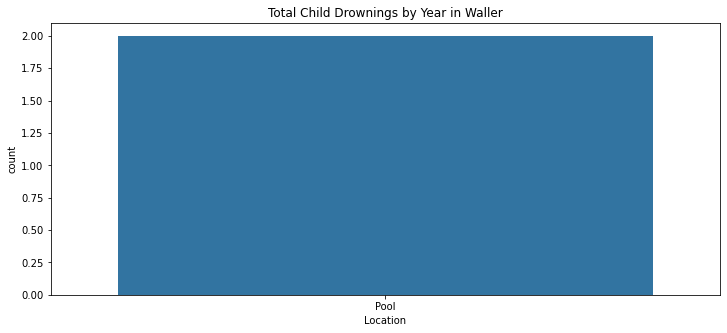

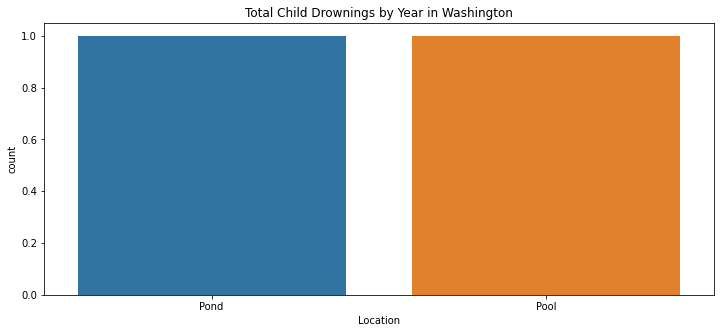

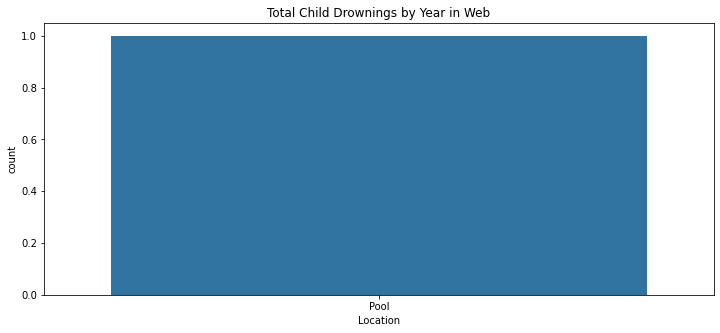

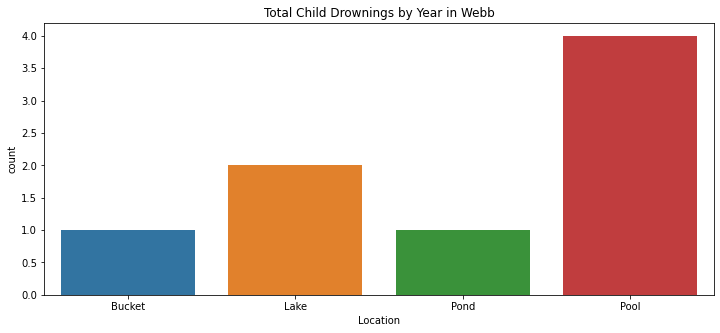

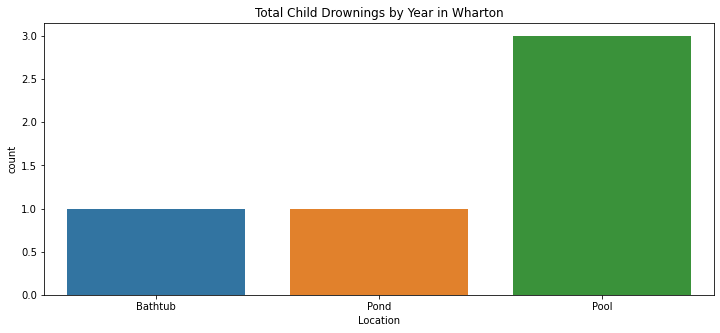

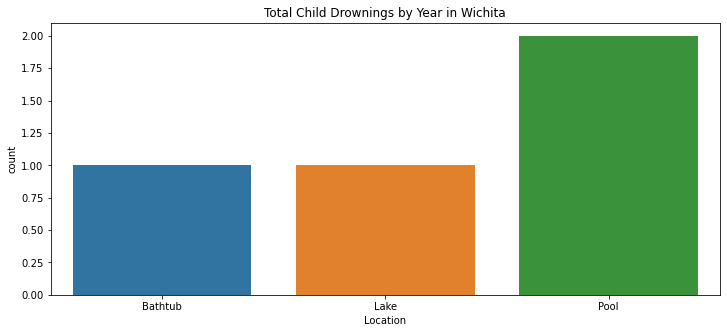

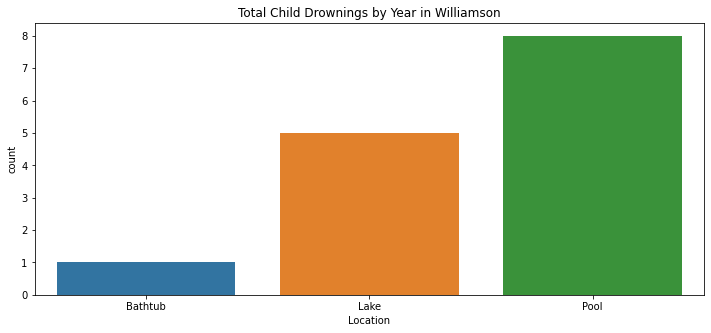

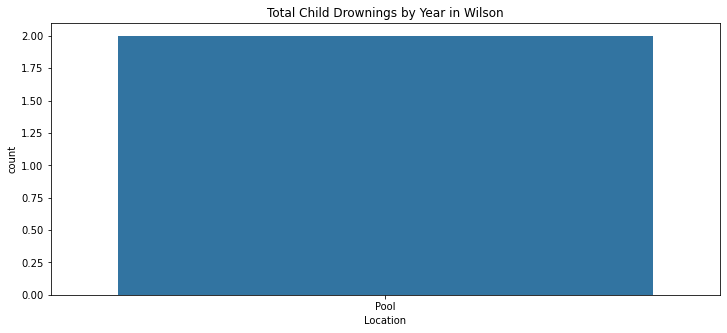

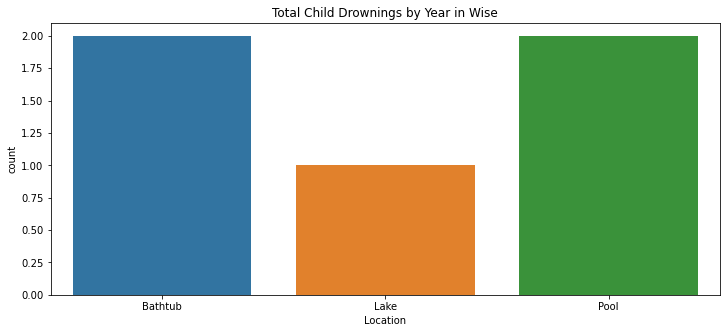

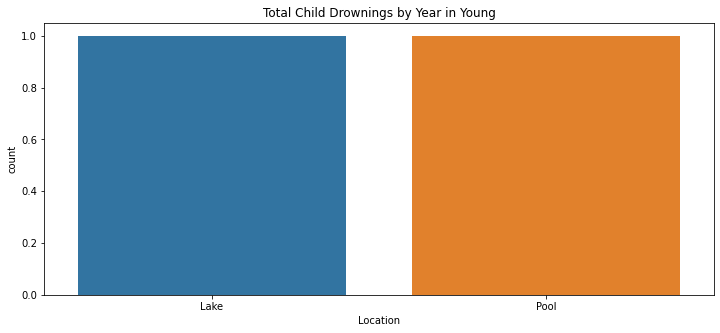

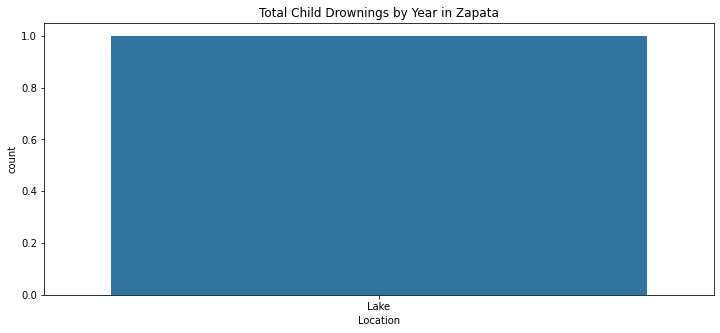

In [267]:
county_location(df)